In this project, we will dealing with the dataset- Titanic survived Project in two ways.
The first will be data manipulation in order for deeper EDA process.
The second will be data manipulation in order for prediction. 
The reason behind why i am taking two datasets is because the first is excellent for data exploration but has curse of dimensionality due to 156 columns that will lead to overfiiting when we apply the prediction model. The second has only 7 columns which is much more easier and friendlier for our models to predict.
I will be explaining whenever these types of data manipulation is utilised for each of these processes.
Let's start with importing the important databases that are required for the initial non-visual and visual data analysis.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

Now that we have imported the important packages and libraries, let's load the database and make a datafdrame out of it.

In [62]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
titanic_data = pd.read_csv(url)
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

There are total 891 rows and 12 columns in the original databases. We can get a closer look at few of the values using the head and tail commands to get the initial frame of datatypes stored in each of these 12 columns.

In [106]:
titanic_data.head(30)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26                            Emir, Mr. Farred Chehab    male   NaN      0   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
28                      O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
29                                Todoroff, Mr. Lalio    male   NaN      0   

    Parch            Ticket      Fare        Cabin Embarked  
0       0         A/5 21171    7.2500          NaN        S  
1       0          PC 17599   71.2833          C85        C  
2       0  STON/O2. 3101282    7.9250          NaN        S  
3       0            113803   53.1000         C123        S  
4       0            373450    8.0500          NaN        S  
5       0            330877    8.4583          NaN        Q  
6  

In [107]:
titanic_data.tail(30)

PassengerId  Survived  Pclass  \
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
861                        Giles, Mr. Frederick Edward    male  21.0      1   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
864                             Gill, Mr. John William    male  24.0      0   
865                           Bystrom, Mrs. (Karolina)  female  42.0      0   
866                       Duran y More, Miss. Asuncion  female  27.0      1   
867               Roebling, Mr. Washington Augustus II    male  31.0      0   
868                        van Melkebeke, Mr. Philemon    male   NaN      0   
869                    Johnson, Master. Harold Theodor    male   4.0      1   
870                                  Balkic, Mr. Cerin    male  26.0      0   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
873                        Vander Cruyssen, Mr. Victor    male  47.0      0   
874              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0      1   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
876                      Gustafsson, Mr. Alfred Ossian    male  20.0      0   
877                               Petroff, Mr. Nedelio    male  19.0      0   
878                                 Laleff, Mr. Kristo    male   NaN      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
881                                 Markun, Mr. Johann    male  33.0      0   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0      0   
883                      Banfield, Mr. Frederick James    male  28.0      0   
884                             Sutehall, Mr. Henry Jr    male  25.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare        Cabin Embarked  
861      0             28134  11.5000          NaN        S  
862      0             17466  25.9292          D17        S  
863      2          CA. 2343  69.5500          NaN        S  
864      0            233866  13.0000          NaN        S  
865      0            236852  13.0000          NaN        S  
866 

From the above process, we can see that columns sex, name, cabin, embarked and ticket have string or object datatypes and the rest have integer datatypes. None of them other than fare and age contain float values at the present moment. Let's now declare the independent variables which will exclude the column: 'Survived' and include the rest of the columns using the iloc,length,and range methods.

In [108]:
titanic_dataxvariable_data = titanic_data.iloc[:,[0] + list(range(2, len(titanic_data.columns)))]

In [109]:
titanic_dataxvariable_data

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1      0          PC 17599  71.2833   C85        C  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1      0            113803  53.1000  C123        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

Now let's select the target column while excluding all the other columns using the iloc method.

In [110]:
titanic_datayvariable_data = titanic_data.iloc[:,1:2]

In [111]:
titanic_datayvariable_data

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [ ]:
Since we now know what our target variables are, let look at the number of values each variable has in this column.

In [3]:
titanic_data_counts = titanic_data['Survived'].value_counts()
print(titanic_data_counts)

0    549
1    342
Name: Survived, dtype: int64


Noe let's use the describe function in order to get the mean, standard deviation, minimum, maximum, q1,q2,q3,and,q4 score from the dataset.

In [113]:
titanic_datatable = titanic_data.describe()
print(titanic_datatable)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Below are the key descriptions we get from the dataset-
1) Median of PassengerId is(446.000000) is equal to its mean(446.000000), which means no outliers are present.
2) Median of Survived(0.000000) is lower than its mean(0.383838), which means few outliers are present- +vely skewed
3) Median of Pclass(3.000000) is quite higher than its mean(2.308642), which means some outliers are present- -vely skewed
4) Median of Age(28.000000) is quite lower than its mean(29.699118), which means few outliers are present- +ve
5) Median of SibSp(0.000000) is quite lower than its mean(0.523008), which means some outliers are present- +ve
6) Median of Parch(0.000000) is quite lower than its mean(0.381594), which means few outliers are present- +ve
7) Median of Fare(14.454200) is pretty lower than its mean(32.204208), which means a lot of outliers are present- +ve
8) The total count of all columns is 891 values.

9) The maximum values of each column are as follows:-

1) PassengerID: 891, iqr = 445
2) Survived: 1, iqr= 1
3) Pclass:3, iqr= 1
4) Age: 80, iqr= 18.125
5) SibSp : 8,iqr= 1
6) Parch: 6,iqr= 0
7) Fare: 512.3292,iqr= 24.9104

Now let's take a look at the datatypes of each columns in the dataset

In [114]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This confirms that only age and fare columns consist of float64 values. We have to convert the rest into float64 in the future for it to be fit for EDA and modeling process.

Now let's check for sum of all null values in the dataset using isnull() and sum() commands.

In [3]:
titanic_data.isnull().sum().sum()

866

More than 866 null values exists in the dataset, let's see where these null-values exists after first converting two object type columns - 'Sex' and 'Embarked' into numeric columns. We will be using get_dummies method to encode the columns based on the most common values present in the original columns.

In [3]:
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Sex','Embarked'])
print(titanic_data_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0         A/5 21171   7.2500   NaN           0         1           0   
1          PC 17599  71.2833   C85           1         0           1   
2  STON/O2. 3101282   7.9250   NaN           1         0           0   
3            113803  53.1000  C123    

Below is the creation of dataset that we will be using for EDA and visualisations. This dataset will not be included in feature selection, engineering and predictions.

In [65]:
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Sex','Embarked','Pclass','Cabin','Survived'])
print(titanic_data_encoded.head())

   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   

   SibSp  Parch            Ticket     Fare  Sex_female  Sex_male  Embarked_C  \
0      1      0         A/5 21171   7.2500           0         1           0   
1      1      0          PC 17599  71.2833           1         0           1   
2      0      0  STON/O2. 3101282   7.9250           1         0           0   
3      1      0            113803  53.1000           1         0           0   
4      0      0            373450   8.0500           0         1           0   

   ...  Cabin_F G63  Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  Ca

Now let's again check for null-values in the dataset again.

In [5]:
titanic_data_encoded.isnull().sum().sum()

864

We can see that a couple null values have been removed after that after encoding the selected columns.

Now let's look at which columns does the maximum null values exists in the dataset.

In [6]:
titanic_data_encoded.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [66]:
titanic_data_encoded.isnull().sum()

PassengerId      0
Name             0
Age            177
SibSp            0
Parch            0
              ... 
Cabin_F4         0
Cabin_G6         0
Cabin_T          0
Survived_0       0
Survived_1       0
Length: 164, dtype: int64

We can see that maximum number of null values exists in Cabin column and few null values exists in Age column. We can correct the age column using the median fill method after we replace the null values with NaN.On the other hand, since cabin column consists of more than 70 percent null values, we will removing it for prediction purposes but keeping it for EDA to get insights about the few scraps of data we got. 

In [121]:
titanic_data_encoded["Age"] = titanic_data_encoded["Age"].replace("",np.nan)
titanic_data_encoded["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [74]:
titanic_data_encoded["Age"] = titanic_data_encoded["Age"].fillna(titanic_data_encoded["Age"].median())

In [5]:
titanic_data_encoded.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

Now that we check for null-values, only the cabin column consists with majority of its proprotion. We will be dropping it including columns such as passenegerid, name, ticket since they are insigificant when it comes to prediction purposes but signigficant for EDA purposes. Although name can be deconstructed into mr, miss, doctor, revanant and other columns, it will not significantly impact their survivability becauase the destruction of the ship was sudden and in the few steps that i will be performing in the future, it has low correlation and did not impact the survival rate from the ship.

In [6]:
titanic_data_encoded.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Now let's again check for null-values in the dataset and also interpret it using the heatmap visualisation.

In [7]:
titanic_data_encoded.isnull().sum().sum()

0

The below heatmap is from a dataset that i had previously encoded from the original dataset for EDA purposes, which is different from the dataset we will be using for prediction purposes. Both the datasets consists of 0 null-values, thus i didn't create a seperate heatmap for both of them since the more detailed heatmap has been visualised below.

<Axes: >

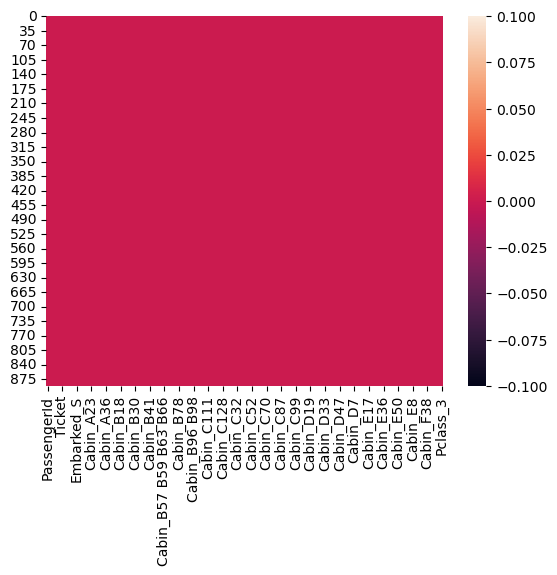

In [125]:
sns.heatmap(titanic_data_encoded.isnull())

Let's now look at the datatypes present in the dataset that will be utilised for the prediction purpose and not for EDA purpose.

In [8]:
titanic_data_encoded.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [67]:
titanic_data_encoded.dtypes

PassengerId      int64
Name            object
Age            float64
SibSp            int64
Parch            int64
                ...   
Cabin_F4         uint8
Cabin_G6         uint8
Cabin_T          uint8
Survived_0       uint8
Survived_1       uint8
Length: 164, dtype: object

In [9]:
titanic_data_encoded.shape

(891, 11)

Below are the list of all columns that we will utilise for the prediction purpose.

In [14]:
titanic_data_encoded.head(30)

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0          0       3  22.0      1      0    7.2500           0         1   
1          1       1  38.0      1      0   71.2833           1         0   
2          1       3  26.0      0      0    7.9250           1         0   
3          1       1  35.0      1      0   53.1000           1         0   
4          0       3  35.0      0      0    8.0500           0         1   
5          0       3  28.0      0      0    8.4583           0         1   
6          0       1  54.0      0      0   51.8625           0         1   
7          0       3   2.0      3      1   21.0750           0         1   
8          1       3  27.0      0      2   11.1333           1         0   
9          1       2  14.0      1      0   30.0708           1         0   
10         1       3   4.0      1      1   16.7000           1         0   
11         1       1  58.0      0      0   26.5500           1         0   
12         0       3  20.0      0      0    8.0500           0         1   
13         0       3  39.0      1      5   31.2750           0         1   
14         0       3  14.0      0      0    7.8542           1         0   
15         1       2  55.0      0      0   16.0000           1         0   
16         0       3   2.0      4      1   29.1250           0         1   
17         1       2  28.0      0      0   13.0000           0         1   
18         0       3  31.0      1      0   18.0000           1         0   
19         1       3  28.0      0      0    7.2250           1         0   
20         0       2  35.0      0      0   26.0000           0         1   
21         1       2  34.0      0      0   13.0000           0         1   
22         1       3  15.0      0      0    8.0292           1         0   
23         1       1  28.0      0      0   35.5000           0         1   
24         0       3   8.0      3      1   21.0750           1         0   
25         1       3  38.0      1      5   31.3875           1         0   
26         0       3  28.0      0      0    7.2250           0         1   
27         0       1  19.0      3      2  263.0000           0         1   
28         1       3  28.0      0      0    7.8792           1         0   
29         0       3  28.0      0      0    7.8958           0         1   

    Embarked_C  Embarked_Q  Embarked_S  
0            0           0           1  
1            1           0           0  
2            0           0           1  
3            0           0           1  
4            0           0           1  
5            0           1           0  
6            0           0           1  
7            0           0           1  
8            0           0           1  
9            1           0           0  
10           0           0           1  
11           0           0           1  
12           0           0           1  
13           0           0           1  
14           0           0           1  
15           0           0           1  
16           0           1           0  
17           0           0           1  
18           0           0           1  
19           1           0           0  
20           0           0           1  
21           0           0           1  
22           0           1           0  
23           0           0           1  
24           0           0           1  
25           0           0           1  
26           1           0           0  
27           0           0           1  
28           0           1           0  
29           0           0           1

In [ ]:
Below are the lists of all columns that are present in the dataset that will be present for the EDA purpose.

In [16]:
titanic_data_encoded.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C',
       ...
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Survived_0', 'Survived_1'],
      dtype='object', length=164)

First let's convert all the columns in the dataset we will be using for the prediction purpose into float values other than the survived column, whcih will be integer since it contains clear indicators of whether the person will survive or not. 

In [10]:
titanic_data_encoded['Sex_female'] = titanic_data_encoded['Sex_female'].astype(float)
titanic_data_encoded['Sex_male'] = titanic_data_encoded['Sex_male'].astype(float)
titanic_data_encoded['Embarked_C'] = titanic_data_encoded['Embarked_C'].astype(float)
titanic_data_encoded['Embarked_Q'] = titanic_data_encoded['Embarked_Q'].astype(float)
titanic_data_encoded['Embarked_S'] = titanic_data_encoded['Embarked_S'].astype(float)
titanic_data_encoded['SibSp'] = titanic_data_encoded['SibSp'].astype(float)
titanic_data_encoded['Parch'] = titanic_data_encoded['Parch'].astype(float)
titanic_data_encoded['Pclass'] = titanic_data_encoded['Pclass'].astype(float)

Now let's convert all the 164 columns in the dataset which we will be using for EDA purpose into float values for our visualisations.As you can see below i have encoded sex, embarked, pclass, survived and cabin for the specific purpose of eda and visualisations.

In [68]:
titanic_data_encoded['PassengerId'] = titanic_data_encoded['PassengerId'].astype(float)
titanic_data_encoded['Pclass_1'] = titanic_data_encoded['Pclass_1'].astype(float)
titanic_data_encoded['Pclass_2'] = titanic_data_encoded['Pclass_2'].astype(float)
titanic_data_encoded['Pclass_3'] = titanic_data_encoded['Pclass_3'].astype(float)
titanic_data_encoded['Sex_female'] = titanic_data_encoded['Sex_female'].astype(float)
titanic_data_encoded['Sex_male'] = titanic_data_encoded['Sex_male'].astype(float)
titanic_data_encoded['SibSp'] = titanic_data_encoded['SibSp'].astype(float)
titanic_data_encoded['Parch'] = titanic_data_encoded['Parch'].astype(float)
titanic_data_encoded['Embarked_C'] = titanic_data_encoded['Embarked_C'].astype(float)
titanic_data_encoded['Embarked_Q'] = titanic_data_encoded['Embarked_Q'].astype(float)
titanic_data_encoded['Embarked_S'] = titanic_data_encoded['Embarked_S'].astype(float)
titanic_data_encoded['Cabin_A10'] = titanic_data_encoded['Cabin_A10'].astype(float)
titanic_data_encoded['Cabin_A14'] = titanic_data_encoded['Cabin_A14'].astype(float)
titanic_data_encoded['Cabin_A16'] = titanic_data_encoded['Cabin_A16'].astype(float)
titanic_data_encoded['Cabin_A19'] = titanic_data_encoded['Cabin_A19'].astype(float)
titanic_data_encoded['Cabin_A20'] = titanic_data_encoded['Cabin_A20'].astype(float)


In [69]:
titanic_data_encoded['Embarked_C'] = titanic_data_encoded['Embarked_C'].astype(float)
titanic_data_encoded['Embarked_Q'] = titanic_data_encoded['Embarked_Q'].astype(float)
titanic_data_encoded['Embarked_S'] = titanic_data_encoded['Embarked_S'].astype(float)
titanic_data_encoded['Cabin_A10'] = titanic_data_encoded['Cabin_A10'].astype(float)
titanic_data_encoded['Cabin_A14'] = titanic_data_encoded['Cabin_A14'].astype(float)
titanic_data_encoded['Cabin_A16'] = titanic_data_encoded['Cabin_A16'].astype(float)
titanic_data_encoded['Cabin_A19'] = titanic_data_encoded['Cabin_A19'].astype(float)
titanic_data_encoded['Cabin_A20'] = titanic_data_encoded['Cabin_A20'].astype(float)
titanic_data_encoded['Cabin_A23'] = titanic_data_encoded['Cabin_A23'].astype(float)
titanic_data_encoded['Cabin_A26'] = titanic_data_encoded['Cabin_A26'].astype(float)
titanic_data_encoded['Cabin_A31'] = titanic_data_encoded['Cabin_A31'].astype(float)
titanic_data_encoded['Cabin_A32'] = titanic_data_encoded['Cabin_A32'].astype(float)
titanic_data_encoded['Cabin_A34'] = titanic_data_encoded['Cabin_A34'].astype(float)
titanic_data_encoded['Cabin_A36'] = titanic_data_encoded['Cabin_A36'].astype(float)
titanic_data_encoded['Cabin_A5'] = titanic_data_encoded['Cabin_A5'].astype(float)
titanic_data_encoded['Cabin_A6'] = titanic_data_encoded['Cabin_A6'].astype(float)
titanic_data_encoded['Cabin_A7'] = titanic_data_encoded['Cabin_A7'].astype(float)
titanic_data_encoded['Cabin_B101'] = titanic_data_encoded['Cabin_B101'].astype(float)
titanic_data_encoded['Cabin_B102'] = titanic_data_encoded['Cabin_B102'].astype(float)
titanic_data_encoded['Cabin_B18'] = titanic_data_encoded['Cabin_B18'].astype(float)
titanic_data_encoded['Cabin_B19'] = titanic_data_encoded['Cabin_B19'].astype(float)
titanic_data_encoded['Cabin_B20'] = titanic_data_encoded['Cabin_B20'].astype(float)
titanic_data_encoded['Cabin_B22'] = titanic_data_encoded['Cabin_B22'].astype(float)
titanic_data_encoded['Cabin_B28'] = titanic_data_encoded['Cabin_B28'].astype(float)
titanic_data_encoded['Cabin_B3'] = titanic_data_encoded['Cabin_B3'].astype(float)
titanic_data_encoded['Cabin_B30'] = titanic_data_encoded['Cabin_B30'].astype(float)
titanic_data_encoded['Cabin_B35'] = titanic_data_encoded['Cabin_B35'].astype(float)
titanic_data_encoded['Cabin_B37'] = titanic_data_encoded['Cabin_B37'].astype(float)
titanic_data_encoded['Cabin_B38'] = titanic_data_encoded['Cabin_B38'].astype(float)
titanic_data_encoded['Cabin_B39'] = titanic_data_encoded['Cabin_B39'].astype(float)
titanic_data_encoded['Cabin_B4'] = titanic_data_encoded['Cabin_B4'].astype(float)
titanic_data_encoded['Cabin_B41'] = titanic_data_encoded['Cabin_B41'].astype(float)
titanic_data_encoded['Cabin_B42'] = titanic_data_encoded['Cabin_B42'].astype(float)
titanic_data_encoded['Cabin_B49'] = titanic_data_encoded['Cabin_B49'].astype(float)
titanic_data_encoded['Cabin_B5'] = titanic_data_encoded['Cabin_B5'].astype(float)
titanic_data_encoded['Cabin_B50'] = titanic_data_encoded['Cabin_B50'].astype(float)
titanic_data_encoded['Cabin_B51 B53 B55'] = titanic_data_encoded['Cabin_B51 B53 B55'].astype(float)
titanic_data_encoded['Cabin_B57 B59 B63 B66'] = titanic_data_encoded['Cabin_B57 B59 B63 B66'].astype(float)
titanic_data_encoded['Cabin_B58 B60'] = titanic_data_encoded['Cabin_B58 B60'].astype(float)
titanic_data_encoded['Cabin_B71'] = titanic_data_encoded['Cabin_B71'].astype(float)
titanic_data_encoded['Cabin_B69'] = titanic_data_encoded['Cabin_B69'].astype(float)
titanic_data_encoded['Cabin_B73'] = titanic_data_encoded['Cabin_B73'].astype(float)
titanic_data_encoded['Cabin_B77'] = titanic_data_encoded['Cabin_B77'].astype(float)
titanic_data_encoded['Cabin_B78'] = titanic_data_encoded['Cabin_B78'].astype(float)
titanic_data_encoded['Cabin_B79'] = titanic_data_encoded['Cabin_B79'].astype(float)
titanic_data_encoded['Cabin_B80'] = titanic_data_encoded['Cabin_B80'].astype(float)
titanic_data_encoded['Cabin_B82 B84'] = titanic_data_encoded['Cabin_B82 B84'].astype(float)
titanic_data_encoded['Cabin_B86'] = titanic_data_encoded['Cabin_B86'].astype(float)
titanic_data_encoded['Cabin_B94'] = titanic_data_encoded['Cabin_B94'].astype(float)
titanic_data_encoded['Cabin_C101'] = titanic_data_encoded['Cabin_C101'].astype(float)
titanic_data_encoded['Cabin_C103'] = titanic_data_encoded['Cabin_C103'].astype(float)
titanic_data_encoded['Cabin_C104'] = titanic_data_encoded['Cabin_C104'].astype(float)
titanic_data_encoded['Cabin_C106'] = titanic_data_encoded['Cabin_C106'].astype(float)
titanic_data_encoded['Cabin_C110'] = titanic_data_encoded['Cabin_C110'].astype(float)
titanic_data_encoded['Cabin_C111'] = titanic_data_encoded['Cabin_C111'].astype(float)
titanic_data_encoded['Cabin_C118'] = titanic_data_encoded['Cabin_C118'].astype(float)
titanic_data_encoded['Cabin_C123'] = titanic_data_encoded['Cabin_C123'].astype(float)
titanic_data_encoded['Cabin_C124'] = titanic_data_encoded['Cabin_C124'].astype(float)
titanic_data_encoded['Cabin_C125'] = titanic_data_encoded['Cabin_C125'].astype(float)
titanic_data_encoded['Cabin_C126'] = titanic_data_encoded['Cabin_C126'].astype(float)
titanic_data_encoded['Cabin_C128'] = titanic_data_encoded['Cabin_C128'].astype(float)
titanic_data_encoded['Cabin_C148'] = titanic_data_encoded['Cabin_C148'].astype(float)
titanic_data_encoded['Cabin_C2'] = titanic_data_encoded['Cabin_C2'].astype(float)
titanic_data_encoded['Cabin_C22 C26'] = titanic_data_encoded['Cabin_C22 C26'].astype(float)
titanic_data_encoded['Cabin_C23 C25 C27'] = titanic_data_encoded['Cabin_C23 C25 C27'].astype(float)
titanic_data_encoded['Cabin_C30'] = titanic_data_encoded['Cabin_C30'].astype(float)
titanic_data_encoded['Cabin_C32'] = titanic_data_encoded['Cabin_C32'].astype(float)
titanic_data_encoded['Cabin_C45'] = titanic_data_encoded['Cabin_C45'].astype(float)
titanic_data_encoded['Cabin_C46'] = titanic_data_encoded['Cabin_C46'].astype(float)
titanic_data_encoded['Cabin_C47'] = titanic_data_encoded['Cabin_C47'].astype(float)
titanic_data_encoded['Cabin_C49'] = titanic_data_encoded['Cabin_C49'].astype(float)
titanic_data_encoded['Cabin_C50'] = titanic_data_encoded['Cabin_C50'].astype(float)
titanic_data_encoded['Cabin_C52'] = titanic_data_encoded['Cabin_C52'].astype(float)
titanic_data_encoded['Cabin_C54'] = titanic_data_encoded['Cabin_C54'].astype(float)
titanic_data_encoded['Cabin_C62 C64'] = titanic_data_encoded['Cabin_C62 C64'].astype(float)
titanic_data_encoded['Cabin_C65'] = titanic_data_encoded['Cabin_C65'].astype(float)
titanic_data_encoded['Cabin_C68'] = titanic_data_encoded['Cabin_C68'].astype(float)
titanic_data_encoded['Cabin_C7'] = titanic_data_encoded['Cabin_C7'].astype(float)
titanic_data_encoded['Cabin_C70'] = titanic_data_encoded['Cabin_C70'].astype(float)
titanic_data_encoded['Cabin_C78'] = titanic_data_encoded['Cabin_C78'].astype(float)
titanic_data_encoded['Cabin_C82'] = titanic_data_encoded['Cabin_C82'].astype(float)
titanic_data_encoded['Cabin_C83'] = titanic_data_encoded['Cabin_C83'].astype(float)
titanic_data_encoded['Cabin_C85'] = titanic_data_encoded['Cabin_C85'].astype(float)
titanic_data_encoded['Cabin_C86'] = titanic_data_encoded['Cabin_C86'].astype(float)
titanic_data_encoded['Cabin_C87'] = titanic_data_encoded['Cabin_C87'].astype(float)
titanic_data_encoded['Cabin_C90'] = titanic_data_encoded['Cabin_C90'].astype(float)
titanic_data_encoded['Cabin_C91'] = titanic_data_encoded['Cabin_C91'].astype(float)
titanic_data_encoded['Cabin_C90'] = titanic_data_encoded['Cabin_C90'].astype(float)
titanic_data_encoded['Cabin_C92'] = titanic_data_encoded['Cabin_C92'].astype(float)
titanic_data_encoded['Cabin_C93'] = titanic_data_encoded['Cabin_C93'].astype(float)
titanic_data_encoded['Cabin_C95'] = titanic_data_encoded['Cabin_C95'].astype(float)
titanic_data_encoded['Cabin_C99'] = titanic_data_encoded['Cabin_C99'].astype(float)
titanic_data_encoded['Cabin_D'] = titanic_data_encoded['Cabin_D'].astype(float)
titanic_data_encoded['Cabin_D10 D12'] = titanic_data_encoded['Cabin_D10 D12'].astype(float)
titanic_data_encoded['Cabin_D11'] = titanic_data_encoded['Cabin_D11'].astype(float)
titanic_data_encoded['Cabin_D15'] = titanic_data_encoded['Cabin_D15'].astype(float)
titanic_data_encoded['Cabin_D17'] = titanic_data_encoded['Cabin_D17'].astype(float)
titanic_data_encoded['Cabin_D19'] = titanic_data_encoded['Cabin_D19'].astype(float)
titanic_data_encoded['Cabin_D20'] = titanic_data_encoded['Cabin_D20'].astype(float)
titanic_data_encoded['Cabin_D21'] = titanic_data_encoded['Cabin_D21'].astype(float)
titanic_data_encoded['Cabin_D26'] = titanic_data_encoded['Cabin_D26'].astype(float)
titanic_data_encoded['Cabin_D28'] = titanic_data_encoded['Cabin_D28'].astype(float)
titanic_data_encoded['Cabin_D30'] = titanic_data_encoded['Cabin_D30'].astype(float)
titanic_data_encoded['Cabin_D33'] = titanic_data_encoded['Cabin_D33'].astype(float)
titanic_data_encoded['Cabin_D35'] = titanic_data_encoded['Cabin_D35'].astype(float)
titanic_data_encoded['Cabin_D36'] = titanic_data_encoded['Cabin_D36'].astype(float)
titanic_data_encoded['Cabin_D37'] = titanic_data_encoded['Cabin_D37'].astype(float)
titanic_data_encoded['Cabin_D45'] = titanic_data_encoded['Cabin_D45'].astype(float)
titanic_data_encoded['Cabin_D46'] = titanic_data_encoded['Cabin_D46'].astype(float)
titanic_data_encoded['Cabin_D47'] = titanic_data_encoded['Cabin_D47'].astype(float)
titanic_data_encoded['Cabin_D48'] = titanic_data_encoded['Cabin_D48'].astype(float)
titanic_data_encoded['Cabin_D49'] = titanic_data_encoded['Cabin_D49'].astype(float)
titanic_data_encoded['Cabin_D50'] = titanic_data_encoded['Cabin_D50'].astype(float)
titanic_data_encoded['Cabin_D56'] = titanic_data_encoded['Cabin_D56'].astype(float)
titanic_data_encoded['Cabin_D6'] = titanic_data_encoded['Cabin_D6'].astype(float)
titanic_data_encoded['Cabin_D7'] = titanic_data_encoded['Cabin_D7'].astype(float)
titanic_data_encoded['Cabin_D9'] = titanic_data_encoded['Cabin_D9'].astype(float)
titanic_data_encoded['Cabin_E10'] = titanic_data_encoded['Cabin_E10'].astype(float)
titanic_data_encoded['Cabin_E101'] = titanic_data_encoded['Cabin_E101'].astype(float)
titanic_data_encoded['Cabin_E12'] = titanic_data_encoded['Cabin_E12'].astype(float)
titanic_data_encoded['Cabin_E121'] = titanic_data_encoded['Cabin_E121'].astype(float)
titanic_data_encoded['Cabin_E17'] = titanic_data_encoded['Cabin_E17'].astype(float)
titanic_data_encoded['Cabin_E24'] = titanic_data_encoded['Cabin_E24'].astype(float)
titanic_data_encoded['Cabin_E25'] = titanic_data_encoded['Cabin_E25'].astype(float)
titanic_data_encoded['Cabin_E31'] = titanic_data_encoded['Cabin_E31'].astype(float)
titanic_data_encoded['Cabin_E33'] = titanic_data_encoded['Cabin_E33'].astype(float)
titanic_data_encoded['Cabin_E34'] = titanic_data_encoded['Cabin_E34'].astype(float)
titanic_data_encoded['Cabin_E36'] = titanic_data_encoded['Cabin_E36'].astype(float)
titanic_data_encoded['Cabin_E38'] = titanic_data_encoded['Cabin_E38'].astype(float)
titanic_data_encoded['Cabin_E40'] = titanic_data_encoded['Cabin_E40'].astype(float)
titanic_data_encoded['Cabin_E44'] = titanic_data_encoded['Cabin_E44'].astype(float)
titanic_data_encoded['Cabin_E46'] = titanic_data_encoded['Cabin_E46'].astype(float)
titanic_data_encoded['Cabin_E49'] = titanic_data_encoded['Cabin_E49'].astype(float)
titanic_data_encoded['Cabin_E50'] = titanic_data_encoded['Cabin_E50'].astype(float)
titanic_data_encoded['Cabin_E58'] = titanic_data_encoded['Cabin_E58'].astype(float)
titanic_data_encoded['Cabin_E63'] = titanic_data_encoded['Cabin_E63'].astype(float)
titanic_data_encoded['Cabin_E67'] = titanic_data_encoded['Cabin_E67'].astype(float)
titanic_data_encoded['Cabin_E68'] = titanic_data_encoded['Cabin_E68'].astype(float)
titanic_data_encoded['Cabin_E77'] = titanic_data_encoded['Cabin_E77'].astype(float)
titanic_data_encoded['Cabin_E8'] = titanic_data_encoded['Cabin_E8'].astype(float)
titanic_data_encoded['Cabin_F E69'] = titanic_data_encoded['Cabin_F E69'].astype(float)
titanic_data_encoded['Cabin_F G63'] = titanic_data_encoded['Cabin_F G63'].astype(float)
titanic_data_encoded['Cabin_F G73'] = titanic_data_encoded['Cabin_F G73'].astype(float)
titanic_data_encoded['Cabin_F2'] = titanic_data_encoded['Cabin_F2'].astype(float)
titanic_data_encoded['Cabin_F33'] = titanic_data_encoded['Cabin_F33'].astype(float)
titanic_data_encoded['Cabin_F38'] = titanic_data_encoded['Cabin_F38'].astype(float)
titanic_data_encoded['Cabin_F4'] = titanic_data_encoded['Cabin_F4'].astype(float)
titanic_data_encoded['Cabin_G6'] = titanic_data_encoded['Cabin_G6'].astype(float)
titanic_data_encoded['Cabin_T'] = titanic_data_encoded['Cabin_T'].astype(float)

In [70]:
titanic_data_encoded['Cabin_A24'] = titanic_data_encoded['Cabin_A24'].astype(float)
titanic_data_encoded['Cabin_B96 B98'] = titanic_data_encoded['Cabin_B96 B98'].astype(float)

In [71]:
titanic_data_encoded['Survived_0'] = titanic_data_encoded['Survived_0'].astype(float)
titanic_data_encoded['Survived_1'] = titanic_data_encoded['Survived_1'].astype(float)

In [ ]:
Now let's check for the datatypes of columns that we will be using for the EDA and visualisations.

In [15]:
titanic_data_encoded.dtypes

PassengerId    float64
Name            object
Age            float64
SibSp          float64
Parch          float64
                ...   
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
Survived_0     float64
Survived_1     float64
Length: 164, dtype: object

We can see that almost all columns are changed into float values other than the name column.

Now let's check for the datatypes of columns that we will be using for the predictions.

In [11]:
titanic_data_encoded.dtypes

Survived        int64
Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

We can see that all columns have changed to float values other than the survived column.

Now let's get some information from the dataset that we will be using for EDA and visualisations using the info method.

In [22]:
titanic_data_encodedinfo = titanic_data_encoded.info
print(titanic_data_encodedinfo)

<bound method DataFrame.info of      PassengerId                                               Name  \
0            1.0                            Braund, Mr. Owen Harris   
1            2.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3.0                             Heikkinen, Miss. Laina   
3            4.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5.0                           Allen, Mr. William Henry   
..           ...                                                ...   
886        887.0                              Montvila, Rev. Juozas   
887        888.0                       Graham, Miss. Margaret Edith   
888        889.0           Johnston, Miss. Catherine Helen "Carrie"   
889        890.0                              Behr, Mr. Karl Howell   
890        891.0                                Dooley, Mr. Patrick   

           Age  SibSp  Parch            Ticket     Fare  Sex_female  Sex_male  \
0    22.000000    1.0    0.0      

We can see that 891 rows and 164 columns in the dataset we will be using for EDA and visualisations

Now let's get the absolute values from the dataset that we will be using for the predictions using the absolute/abs() method.

In [16]:
absolute_df = titanic_data_encoded.abs()
print(absolute_df)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0     1.0  22.0    1.0    1.0   7.2500         0.0       1.0   
1           1     0.0  38.0    0.0    0.0  71.2833         1.0       0.0   
2           1     1.0  26.0    1.0    1.0   7.9250         1.0       0.0   
3           1     1.0  35.0    1.0    1.0  53.1000         1.0       0.0   
4           0     1.0  35.0    1.0    1.0   8.0500         0.0       1.0   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0     1.0  27.0    1.0    1.0  13.0000         0.0       1.0   
887         1     1.0  19.0    1.0    1.0  30.0000         1.0       0.0   
888         0     1.0  28.0    1.0    1.0  23.4500         1.0       0.0   
889         1     0.0  26.0    0.0    0.0  30.0000         0.0       1.0   
890         0     0.0  32.0    0.0    0.0   7.7500         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
0           0.0         0.0         1.0  
1  

Let's get the unique values of the survived columns in the dataset that we will be using for EDA and visualisations

In [24]:
titanic_data_encoded['Survived_1'].unique()

array([0., 1.])

In [27]:
titanic_data_encoded['Survived_0'].unique()

array([1., 0.])

In [25]:
titanic_data_encoded['Survived_0'].nunique()

2

In [26]:
titanic_data_encoded['Survived_1'].nunique()

2

In [ ]:
We can see that both the columns consist of two unique values 0 and 1 in columns survived_1 and survived_0 respectively.

Below are the value counts for the dataset we will be using for the predictions. This is what certain abbrevations in the following dataset will mean - 

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [75]:
for i in titanic_data_encoded.columns:
    print(titanic_data_encoded[i].value_counts())
    print("/n")

1.0      1
599.0    1
588.0    1
589.0    1
590.0    1
        ..
301.0    1
302.0    1
303.0    1
304.0    1
891.0    1
Name: PassengerId, Length: 891, dtype: int64
/n
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
/n
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64
/n
0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

We can see the following details from this value count set extracted from the eda and visualisations dataset-
1) 549 didn't survive and 342 survived from all the people in the dataset
2) Most of the people who were onboard and probably didn't survive belong to the age group - 24, but after setting the median - the age group turned to - 28~29
3) Most of the passengers didn't have siblings aboard -608
4) Most of the passengers didn't have parents or children on board- 678
5) Most of the tickets had the following numbers on their ticket - 347082,CA. 2343,1601
6) Most of the passengers were males - 577
7) Most of the passengers took a ticket worth the following rate - 8.0500 British Pound
8) Most of the pasengers embarked from Southampton, and least from Queenstown
9) Most of the passengers are from pclass_3 and least from pclass_2
10) Most of the passengers were from the cabin - Cabin_C22 C26

In [ ]:
Now let's turn to the dataset we will be using for predictions and modeling. Below are the list of columns that will be used for selecting a classification model at the the end of this project.

In [20]:
titanicsurvivor_col=[]
for i in titanic_data_encoded.dtypes.index:
    if titanic_data_encoded.dtypes[i] == 'float64':
        titanicsurvivor_col.append(i)
print("titanic x variable columns:", titanicsurvivor_col)
print("/n")

titanic x variable columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
/n


In [21]:
titanicobjectsurvivor_col=[]
for i in titanic_data_encoded.dtypes.index:
    if titanic_data_encoded.dtypes[i] == 'object':
        titanicobjectsurvivor_col.append(i)
print("titanic object columns:", titanicobjectsurvivor_col)
print("/n")

titanic object columns: []
/n


In [22]:
titanicintsurvivor_col=[]
for i in titanic_data_encoded.dtypes.index:
    if titanic_data_encoded.dtypes[i] == 'int64':
        titanicintsurvivor_col.append(i)
print("titanic int columns:", titanicintsurvivor_col)
print("/n")

titanic int columns: ['Survived']
/n


We can see that almost all columns contain float64 values other than the survived column.

lET'S CHECK FOR THE LAST TIME IF OUR ONDEPENDENT VARIABLES CONSIST OF NULL VALUES OR NOT

In [23]:
titanic_data_encoded.loc[titanic_data_encoded["Survived"]==""]

Empty DataFrame
Columns: [Survived, Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S]
Index: []

Let's check the mean values of the independent column - survived and see if it matches with our previous finding.

In [24]:
print(titanic_data_encoded["Survived"].mean())

0.3838383838383838


We can see from the table below that most of the columns consists of two unique values whereas age consist of 88 unique values and fare had 248 unique values

In [25]:
titanic_data_encoded.nunique().to_frame("No. of Unique values")

No. of Unique values
Survived                       2
Pclass                         2
Age                           88
SibSp                          2
Parch                          2
Fare                         248
Sex_female                     2
Sex_male                       2
Embarked_C                     2
Embarked_Q                     2
Embarked_S                     2

Let's check for duplicated columns in both the dataset that will be used for eda, visualisations and predictions

In [73]:
print("Total duplicated rows:", titanic_data_encoded.duplicated().sum())

Total duplicated rows: 0


We can se that there are 0 duplicated rows so we can proceed to the visualisations part from the next step

Dataset used for visualisation consists of these columns- PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A10', 'Cabin_A14', 'Cabin_A16', 'Cabin_A19', 'Cabin_A20', 'Cabin_A23', 'Cabin_A26', 'Cabin_A31', 'Cabin_A32', 'Cabin_A34', 'Cabin_A36', 'Cabin_A5', 'Cabin_A6', 'Cabin_A7', 'Cabin_B101', 'Cabin_B102', 'Cabin_B18', 'Cabin_B19', 'Cabin_B20', 'Cabin_B22', 'Cabin_B28', 'Cabin_B3', 'Cabin_B30', 'Cabin_B35', 'Cabin_B37', 'Cabin_B38', 'Cabin_B39', 'Cabin_B4', 'Cabin_B41', 'Cabin_B42', 'Cabin_B49', 'Cabin_B5', 'Cabin_B50', 'Cabin_B51 B53 B55', 'Cabin_B57 B59 B63 B66', 'Cabin_B58 B60', 'Cabin_B69', 'Cabin_B71', 'Cabin_B73', 'Cabin_B77', 'Cabin_B78', 'Cabin_B79', 'Cabin_B80', 'Cabin_B82 B84', 'Cabin_B86', 'Cabin_B94', 'Cabin_C101', 'Cabin_C103', 'Cabin_C104', 'Cabin_C106', 'Cabin_C110', 'Cabin_C111', 'Cabin_C118', 'Cabin_C123', 'Cabin_C124', 'Cabin_C125', 'Cabin_C126', 'Cabin_C128', 'Cabin_C148', 'Cabin_C2', 'Cabin_C22 C26', 'Cabin_C23 C25 C27', 'Cabin_C30', 'Cabin_C32', 'Cabin_C45', 'Cabin_C46', 'Cabin_C47', 'Cabin_C49', 'Cabin_C50', 'Cabin_C52', 'Cabin_C54', 'Cabin_C62 C64', 'Cabin_C65', 'Cabin_C68', 'Cabin_C7', 'Cabin_C70', 'Cabin_C78', 'Cabin_C82', 'Cabin_C83', 'Cabin_C85', 'Cabin_C86', 'Cabin_C87', 'Cabin_C90', 'Cabin_C91', 'Cabin_C92', 'Cabin_C93', 'Cabin_C95', 'Cabin_C99', 'Cabin_D', 'Cabin_D10 D12', 'Cabin_D11', 'Cabin_D15', 'Cabin_D17', 'Cabin_D19', 'Cabin_D20', 'Cabin_D21', 'Cabin_D26', 'Cabin_D28', 'Cabin_D30', 'Cabin_D33', 'Cabin_D35', 'Cabin_D36', 'Cabin_D37', 'Cabin_D45', 'Cabin_D46', 'Cabin_D47', 'Cabin_D48', 'Cabin_D49', 'Cabin_D50', 'Cabin_D56', 'Cabin_D6', 'Cabin_D7', 'Cabin_D9', 'Cabin_E10', 'Cabin_E101', 'Cabin_E12', 'Cabin_E121', 'Cabin_E17', 'Cabin_E24', 'Cabin_E25', 'Cabin_E31', 'Cabin_E33', 'Cabin_E34', 'Cabin_E36', 'Cabin_E38', 'Cabin_E40', 'Cabin_E44', 'Cabin_E46', 'Cabin_E49', 'Cabin_E50', 'Cabin_E58', 'Cabin_E63', 'Cabin_E67', 'Cabin_E68', 'Cabin_E77', 'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Pclass_1', 'Pclass_2', 'Pclass_3'

Lets start with univariate analysis by using count plots

1.0    549
0.0    342
Name: Survived_0, dtype: int64


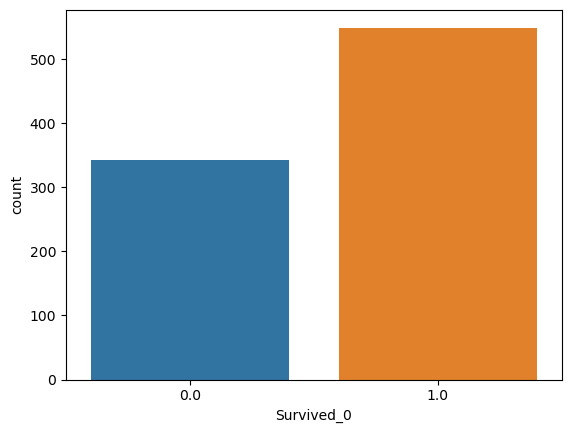

In [33]:
ts=sns.countplot(x='Survived_0',data=titanic_data_encoded)
print(titanic_data_encoded['Survived_0'].value_counts())

0.0    549
1.0    342
Name: Survived_1, dtype: int64


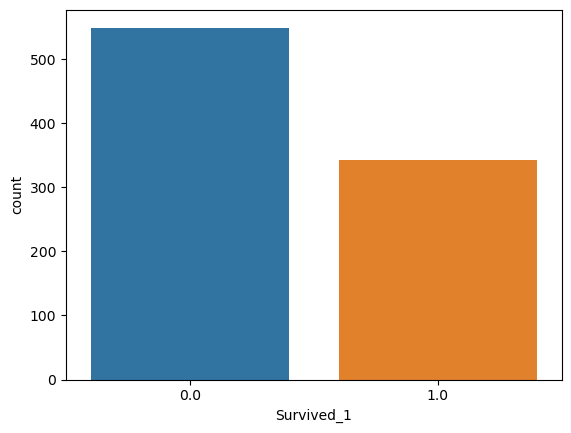

In [34]:
tss=sns.countplot(x='Survived_1',data=titanic_data_encoded)
print(titanic_data_encoded['Survived_1'].value_counts())

From the above two plots we confirm that there were 549 Non-survivors and 342 survivors

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


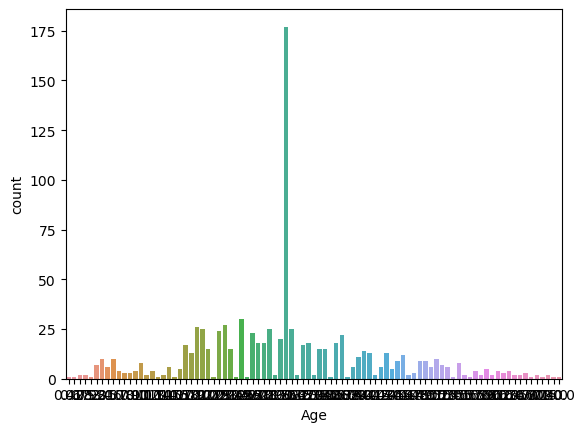

In [152]:
print(titanic_data_encoded['Age'].value_counts())
ts1=sns.countplot(x='Age',data=titanic_data_encoded)
plt.show()

Most of the passengers were 28~29 years old

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64


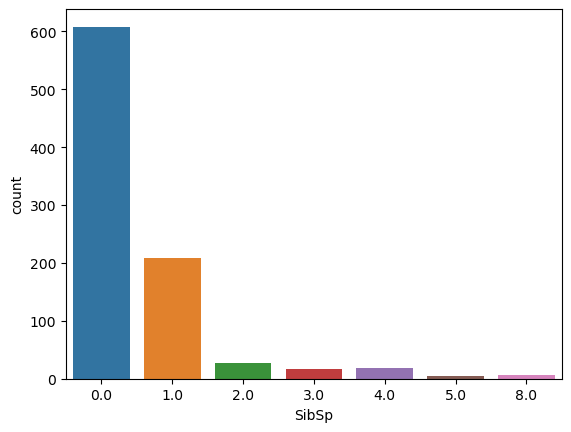

In [153]:
print(titanic_data_encoded['SibSp'].value_counts())
ts2=sns.countplot(x='SibSp',data=titanic_data_encoded)
plt.show()

Most of the passengers didn't have any siblings or spouses on board.

0.0    678
1.0    118
2.0     80
5.0      5
3.0      5
4.0      4
6.0      1
Name: Parch, dtype: int64


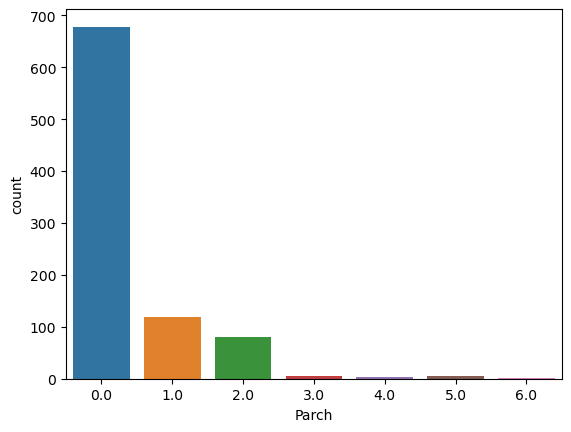

In [154]:
print(titanic_data_encoded['Parch'].value_counts())
ts3=sns.countplot(x='Parch',data=titanic_data_encoded)
plt.show()

Most of the passengers didn't have parents or children on board

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


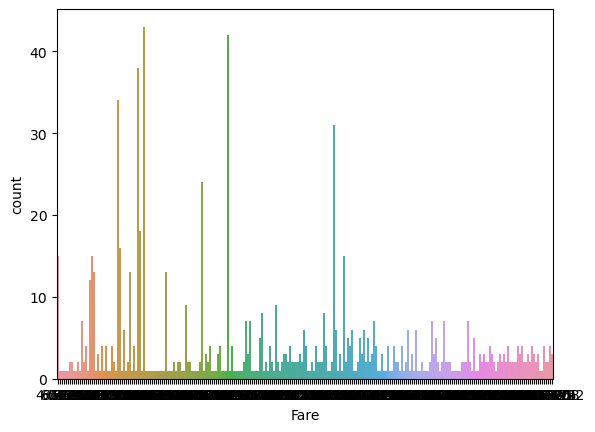

In [155]:
print(titanic_data_encoded['Fare'].value_counts())
ts3=sns.countplot(x='Fare',data=titanic_data_encoded)
plt.show()

Most of the passengers took a ticket worth 8.0500 british pounds

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


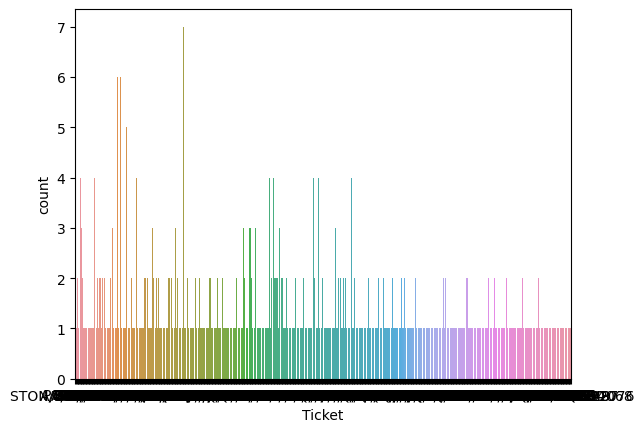

In [233]:
print(titanic_data_encoded['Ticket'].value_counts())
ts3=sns.countplot(x='Ticket',data=titanic_data_encoded)
plt.show()

Most of the tickets had the following numbers on their ticket - 347082,CA. 2343,1601

0.0    577
1.0    314
Name: Sex_female, dtype: int64


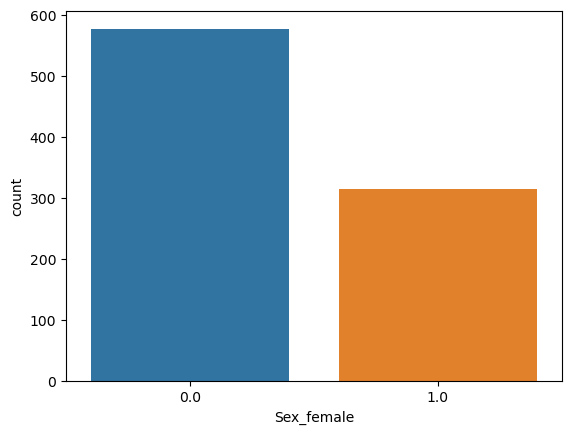

In [157]:
print(titanic_data_encoded['Sex_female'].value_counts())
ts4=sns.countplot(x='Sex_female',data=titanic_data_encoded)
plt.show()

1.0    577
0.0    314
Name: Sex_male, dtype: int64


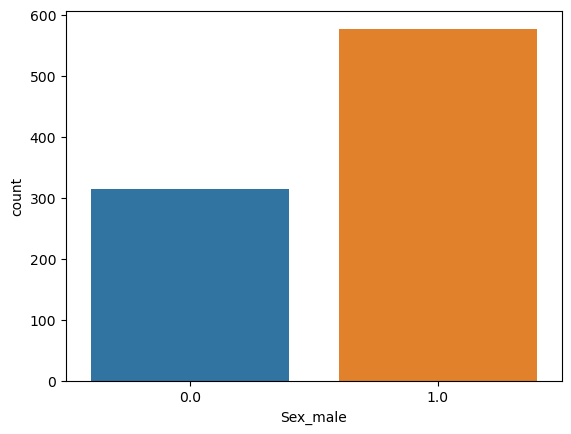

In [158]:
print(titanic_data_encoded['Sex_male'].value_counts())
ts5=sns.countplot(x='Sex_male',data=titanic_data_encoded)
plt.show()

In [ ]:
Most of the passengers were males - 577, and the least were females - 314

0.0    723
1.0    168
Name: Embarked_C, dtype: int64


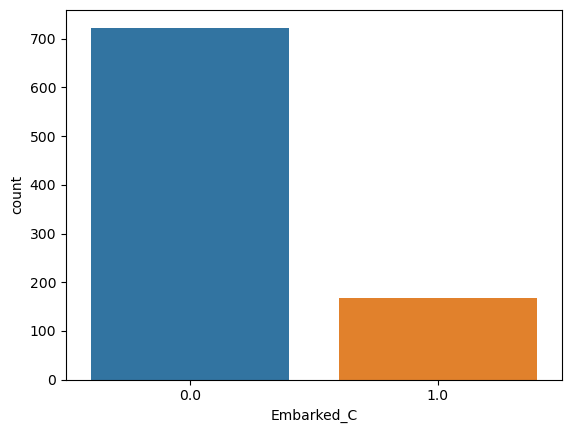

In [159]:
print(titanic_data_encoded['Embarked_C'].value_counts())
ts6=sns.countplot(x='Embarked_C',data=titanic_data_encoded)
plt.show()

0.0    814
1.0     77
Name: Embarked_Q, dtype: int64


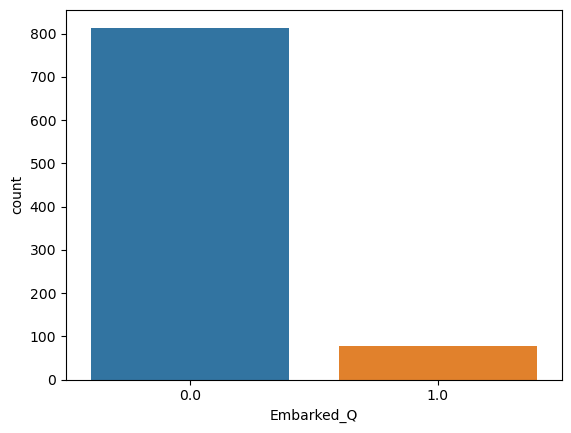

In [160]:
print(titanic_data_encoded['Embarked_Q'].value_counts())
ts7=sns.countplot(x='Embarked_Q',data=titanic_data_encoded)
plt.show()

1.0    644
0.0    247
Name: Embarked_S, dtype: int64


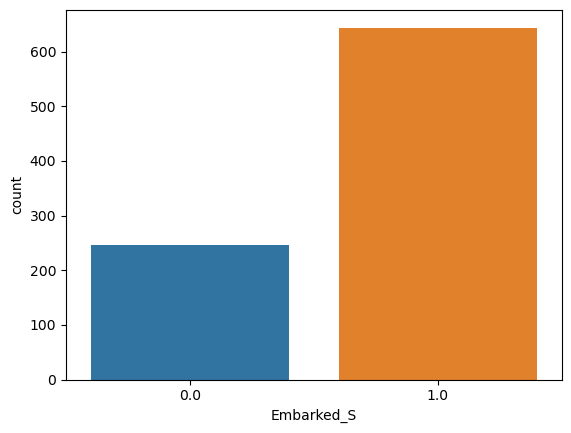

In [161]:
print(titanic_data_encoded['Embarked_S'].value_counts())
ts232=sns.countplot(x='Embarked_S',data=titanic_data_encoded)
plt.show()

 Most of the pasengers embarked from Southampton, and least from Queenstown

0.0    675
1.0    216
Name: Pclass_1, dtype: int64


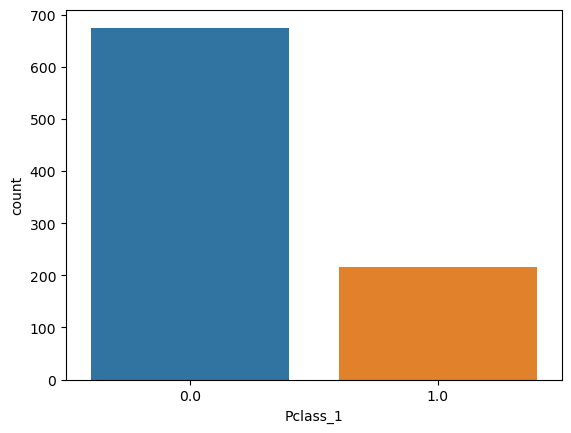

In [76]:
print(titanic_data_encoded['Pclass_1'].value_counts())
ts2=sns.countplot(x='Pclass_1',data=titanic_data_encoded)
plt.show()

0.0    707
1.0    184
Name: Pclass_2, dtype: int64


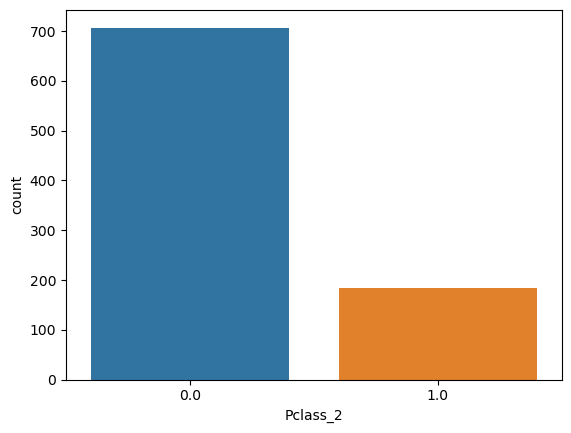

In [77]:
print(titanic_data_encoded['Pclass_2'].value_counts())
ts234=sns.countplot(x='Pclass_2',data=titanic_data_encoded)
plt.show()

1.0    491
0.0    400
Name: Pclass_3, dtype: int64


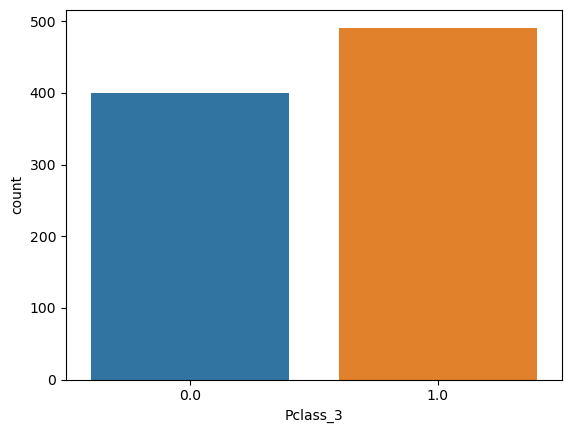

In [78]:
print(titanic_data_encoded['Pclass_3'].value_counts())
ts34=sns.countplot(x='Pclass_3',data=titanic_data_encoded)
plt.show()

Most of the passengers are from pclass_3 and least from pclass_2

0.0    890
1.0      1
Name: Cabin_C106, dtype: int64


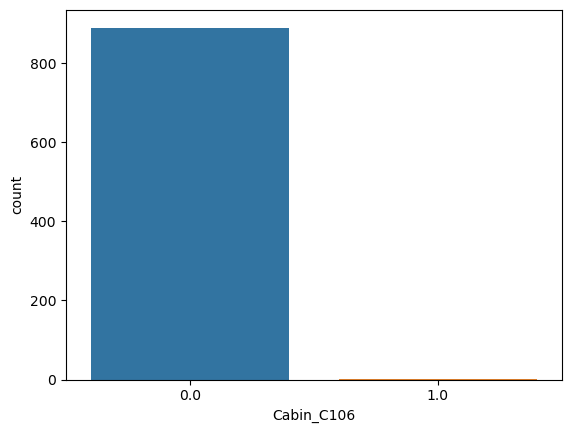

In [168]:
print(titanic_data_encoded['Cabin_C106'].value_counts())
ts344=sns.countplot(x='Cabin_C106',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_C104, dtype: int64


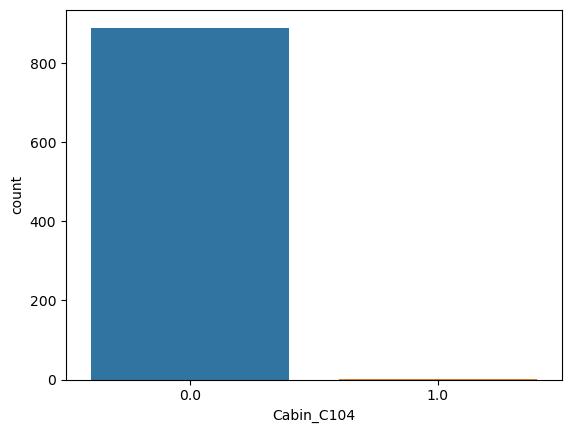

In [79]:
print(titanic_data_encoded['Cabin_C104'].value_counts())
ts3444=sns.countplot(x='Cabin_C104',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_C103, dtype: int64


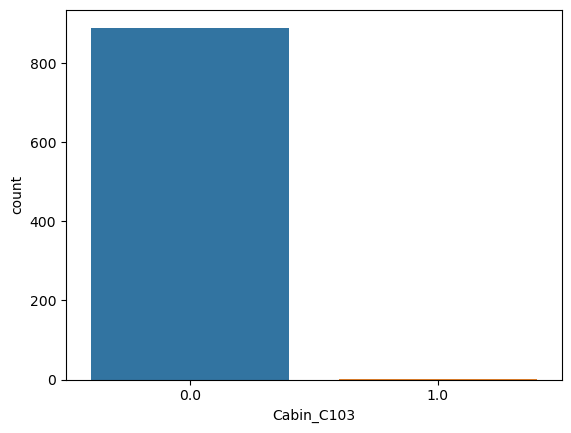

In [80]:
print(titanic_data_encoded['Cabin_C103'].value_counts())
ts3344=sns.countplot(x='Cabin_C103',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_C101, dtype: int64


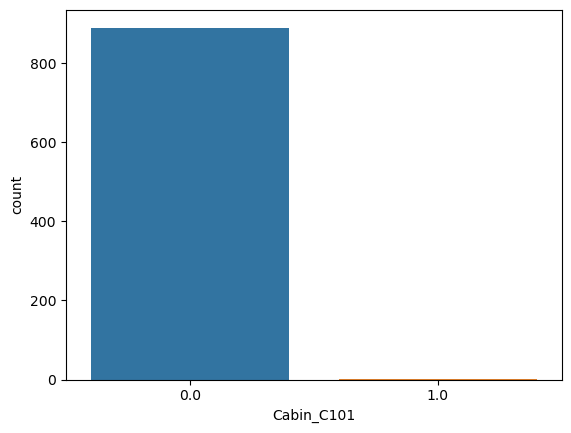

In [171]:
print(titanic_data_encoded['Cabin_C101'].value_counts())
ts34=sns.countplot(x='Cabin_C101',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B94, dtype: int64


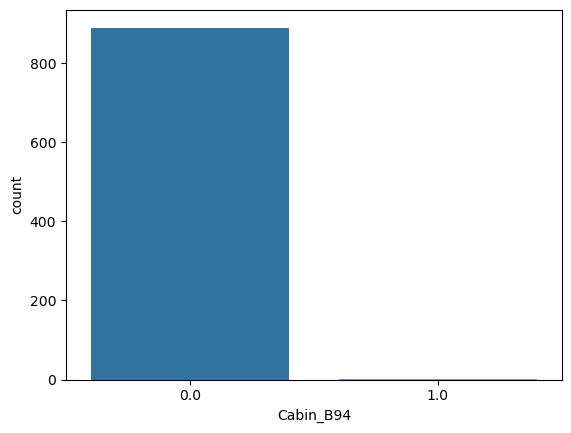

In [81]:
print(titanic_data_encoded['Cabin_B94'].value_counts())
ts34=sns.countplot(x='Cabin_B94',data=titanic_data_encoded)
plt.show()

0.0    882
1.0      9
Name: Cabin_B86, dtype: int64


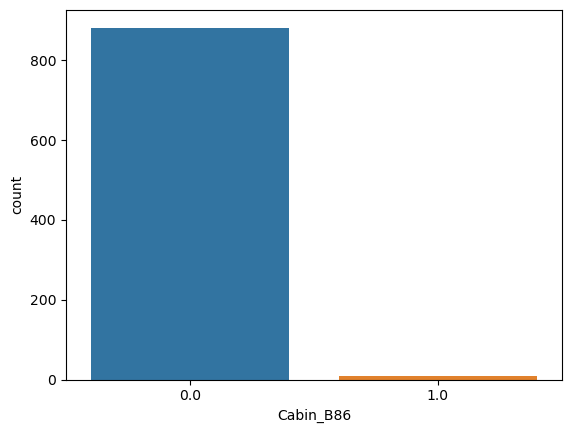

In [173]:
print(titanic_data_encoded['Cabin_B86'].value_counts())
ts34=sns.countplot(x='Cabin_B86',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B94, dtype: int64


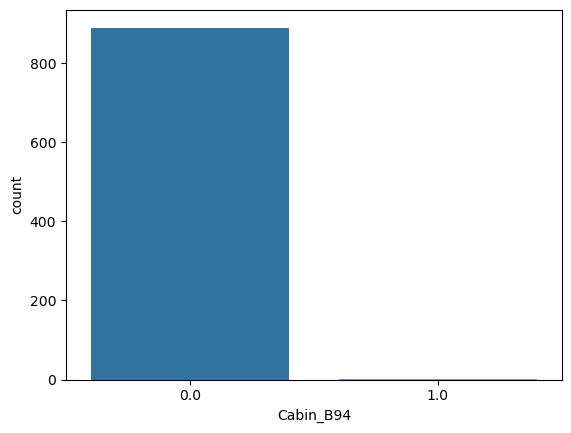

In [82]:
print(titanic_data_encoded['Cabin_B94'].value_counts())
ts34=sns.countplot(x='Cabin_B94',data=titanic_data_encoded)
plt.show()

0.0    881
1.0     10
Name: Cabin_B80, dtype: int64


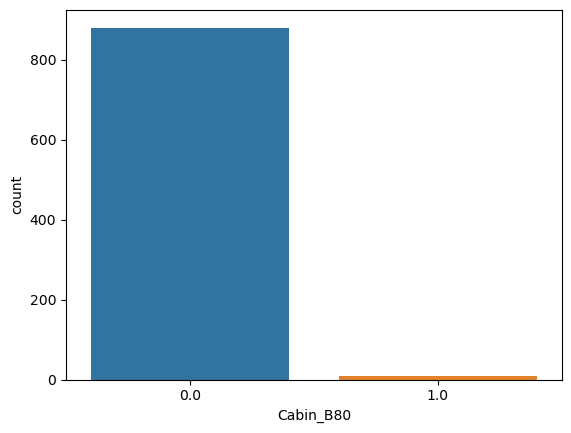

In [176]:
print(titanic_data_encoded['Cabin_B80'].value_counts())
ts34=sns.countplot(x='Cabin_B80',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B79, dtype: int64


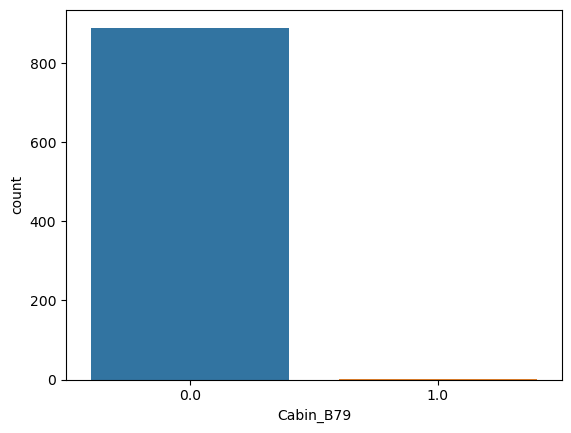

In [177]:
print(titanic_data_encoded['Cabin_B79'].value_counts())
ts34=sns.countplot(x='Cabin_B79',data=titanic_data_encoded)
plt.show()

0.0    870
1.0     21
Name: Cabin_B78, dtype: int64


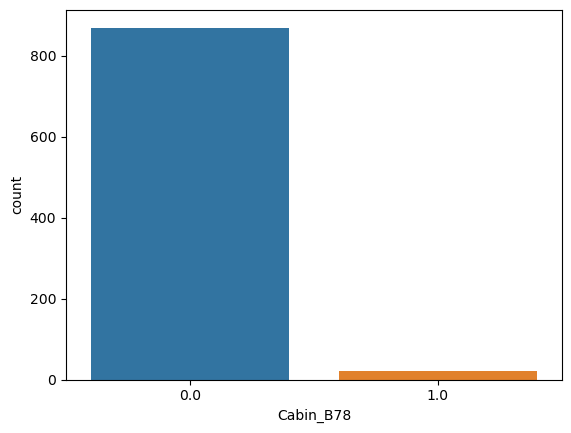

In [178]:
print(titanic_data_encoded['Cabin_B78'].value_counts())
ts34=sns.countplot(x='Cabin_B78',data=titanic_data_encoded)
plt.show()

0.0    882
1.0      9
Name: Cabin_B77, dtype: int64


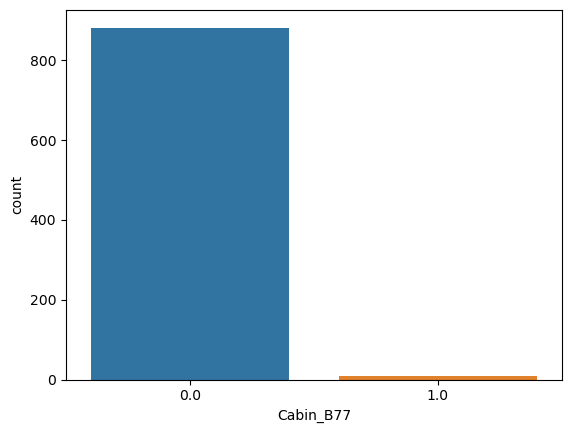

In [179]:
print(titanic_data_encoded['Cabin_B77'].value_counts())
ts34=sns.countplot(x='Cabin_B77',data=titanic_data_encoded)
plt.show()

0.0    888
1.0      3
Name: Cabin_B73, dtype: int64


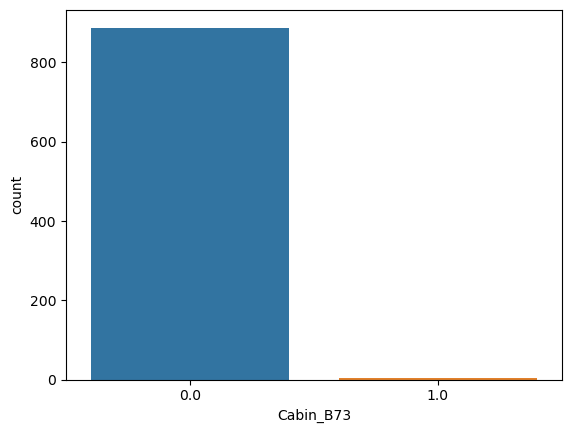

In [180]:
print(titanic_data_encoded['Cabin_B73'].value_counts())
ts34=sns.countplot(x='Cabin_B73',data=titanic_data_encoded)
plt.show()

0.0    883
1.0      8
Name: Cabin_B71, dtype: int64


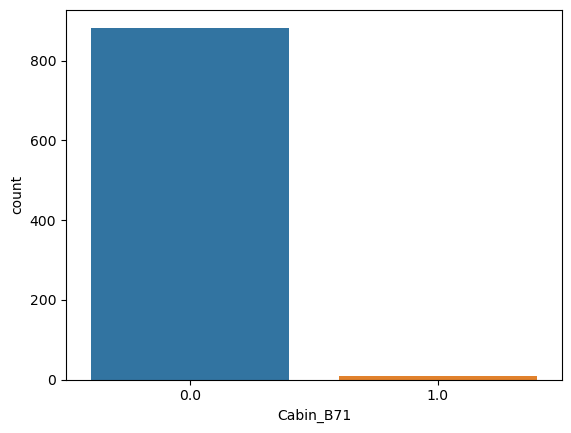

In [181]:
print(titanic_data_encoded['Cabin_B71'].value_counts())
ts34=sns.countplot(x='Cabin_B71',data=titanic_data_encoded)
plt.show()

0.0    888
1.0      3
Name: Cabin_B69, dtype: int64


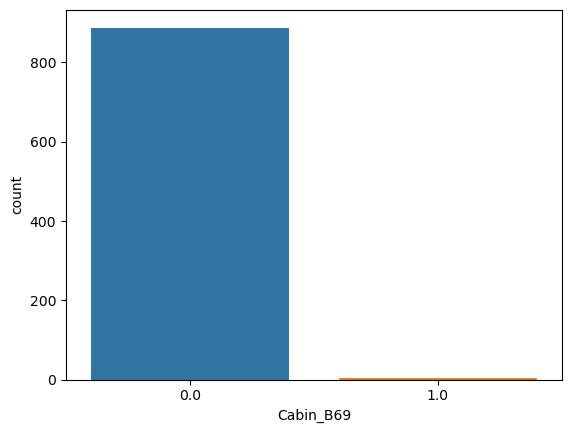

In [182]:
print(titanic_data_encoded['Cabin_B69'].value_counts())
ts34=sns.countplot(x='Cabin_B69',data=titanic_data_encoded)
plt.show()

0.0    882
1.0      9
Name: Cabin_B58 B60, dtype: int64


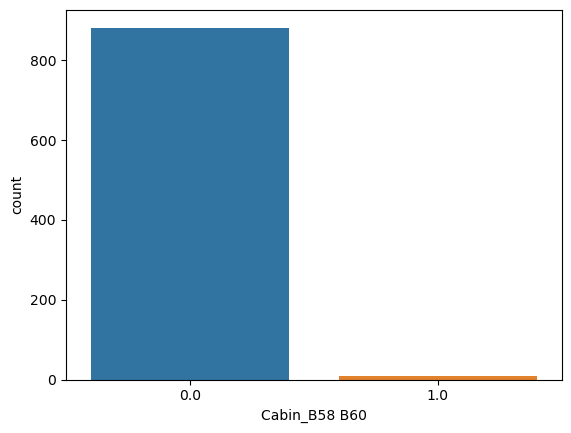

In [183]:
print(titanic_data_encoded['Cabin_B58 B60'].value_counts())
ts34=sns.countplot(x='Cabin_B58 B60',data=titanic_data_encoded)
plt.show()

0.0    881
1.0     10
Name: Cabin_B57 B59 B63 B66, dtype: int64


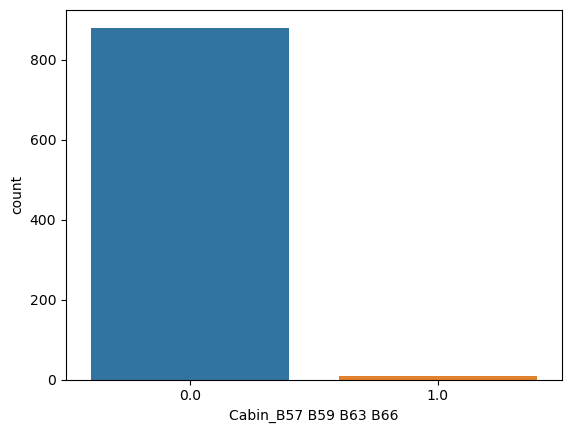

In [184]:
print(titanic_data_encoded['Cabin_B57 B59 B63 B66'].value_counts())
ts34=sns.countplot(x='Cabin_B57 B59 B63 B66',data=titanic_data_encoded)
plt.show()

0.0    882
1.0      9
Name: Cabin_B51 B53 B55, dtype: int64


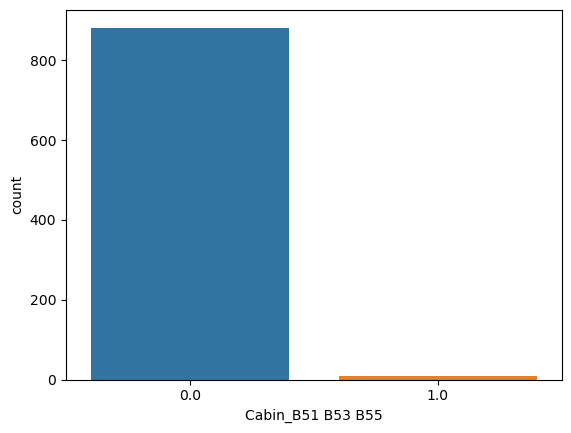

In [185]:
print(titanic_data_encoded['Cabin_B51 B53 B55'].value_counts())
ts34=sns.countplot(x='Cabin_B51 B53 B55',data=titanic_data_encoded)
plt.show()

0.0    882
1.0      9
Name: Cabin_B50, dtype: int64


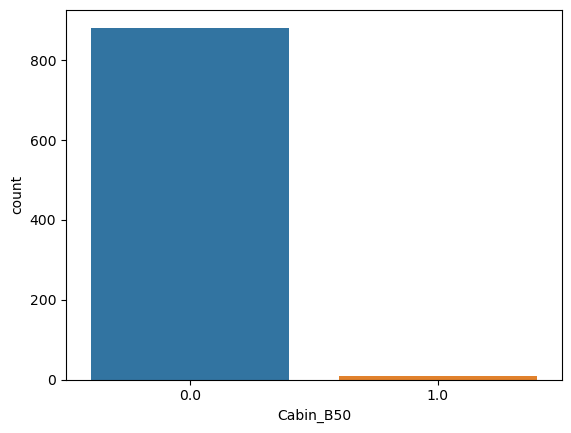

In [186]:
print(titanic_data_encoded['Cabin_B50'].value_counts())
ts34=sns.countplot(x='Cabin_B50',data=titanic_data_encoded)
plt.show()

0.0    883
1.0      8
Name: Cabin_B5, dtype: int64


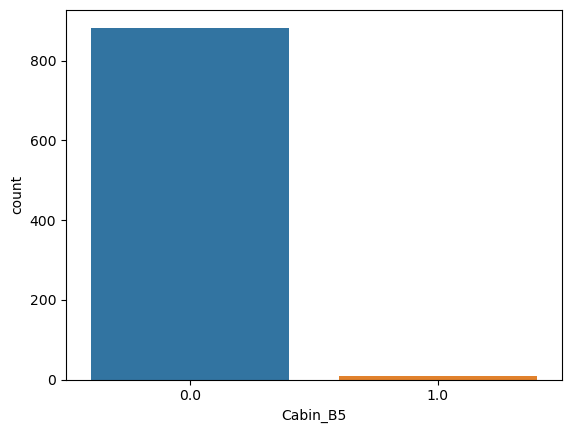

In [187]:
print(titanic_data_encoded['Cabin_B5'].value_counts())
ts34=sns.countplot(x='Cabin_B5',data=titanic_data_encoded)
plt.show()

0.0    888
1.0      3
Name: Cabin_B49, dtype: int64


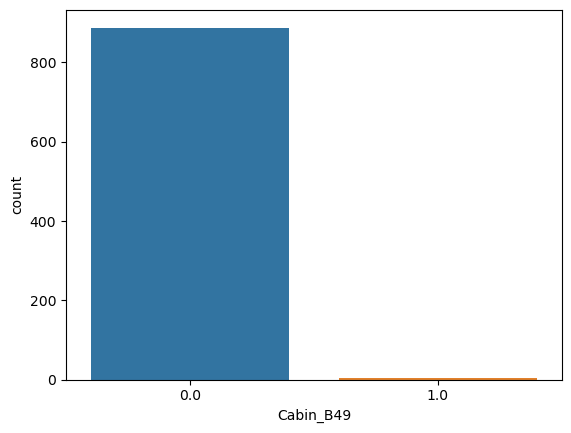

In [188]:
print(titanic_data_encoded['Cabin_B49'].value_counts())
ts34=sns.countplot(x='Cabin_B49',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_B42, dtype: int64


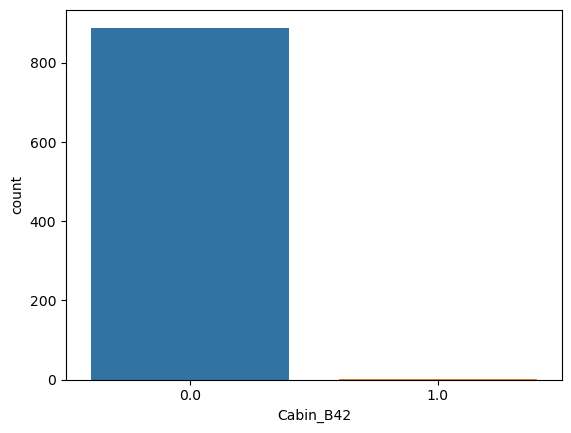

In [189]:
print(titanic_data_encoded['Cabin_B42'].value_counts())
ts34=sns.countplot(x='Cabin_B42',data=titanic_data_encoded)
plt.show()

0.0    887
1.0      4
Name: Cabin_B41, dtype: int64


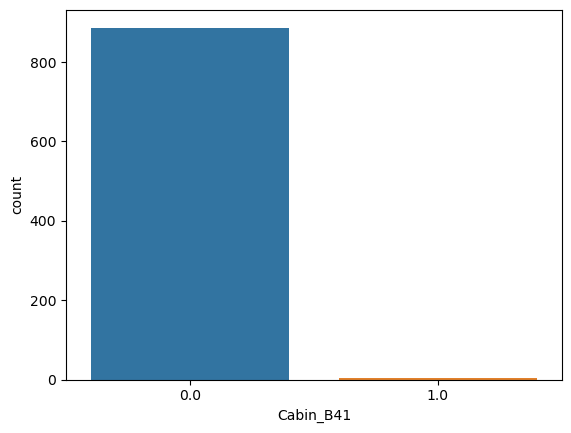

In [190]:
print(titanic_data_encoded['Cabin_B41'].value_counts())
ts34=sns.countplot(x='Cabin_B41',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B4, dtype: int64


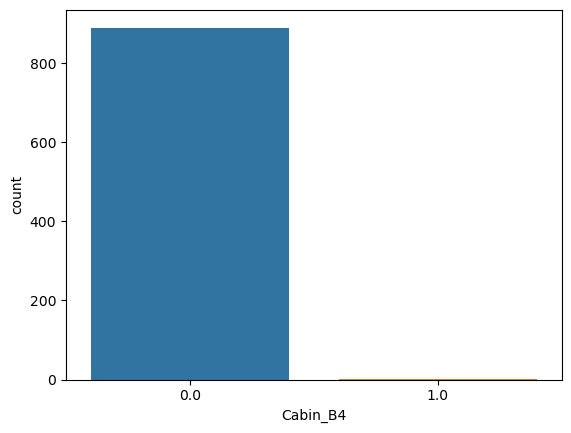

In [191]:
print(titanic_data_encoded['Cabin_B4'].value_counts())
ts34=sns.countplot(x='Cabin_B4',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B39, dtype: int64


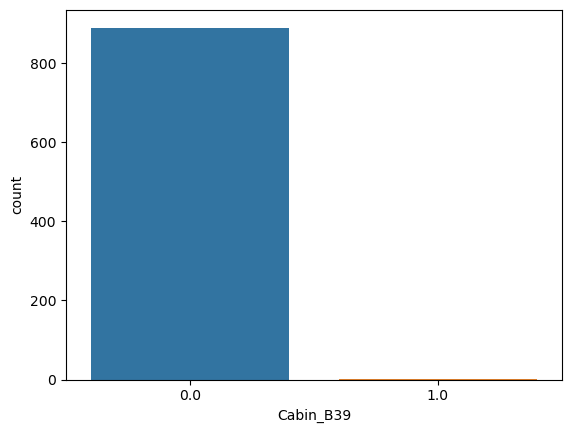

In [192]:
print(titanic_data_encoded['Cabin_B39'].value_counts())
ts34=sns.countplot(x='Cabin_B39',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B38, dtype: int64


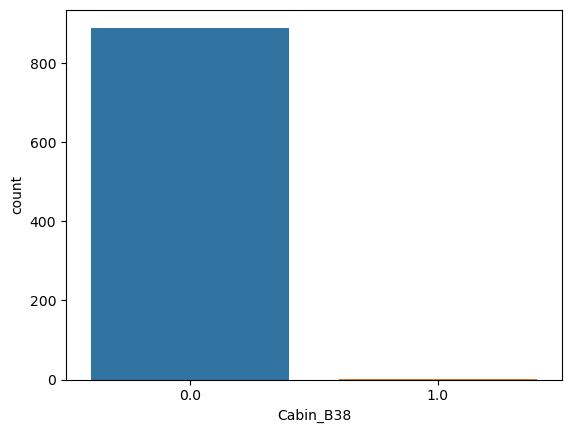

In [84]:
print(titanic_data_encoded['Cabin_B38'].value_counts())
ts34=sns.countplot(x='Cabin_B38',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B37, dtype: int64


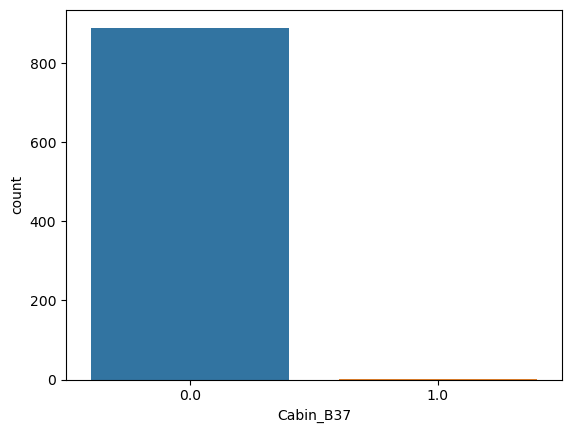

In [83]:
print(titanic_data_encoded['Cabin_B37'].value_counts())
ts34=sns.countplot(x='Cabin_B37',data=titanic_data_encoded)
plt.show()

0.0    886
1.0      5
Name: Cabin_B35, dtype: int64


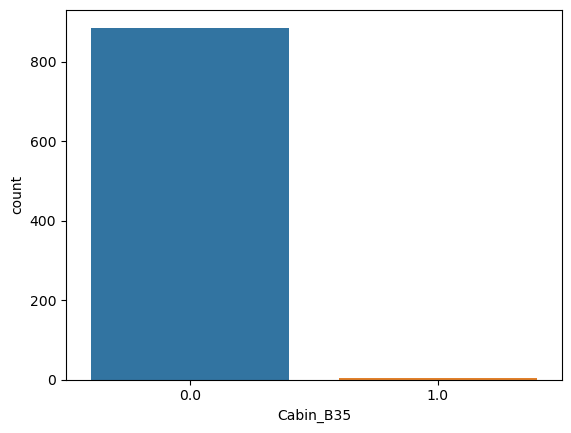

In [195]:
print(titanic_data_encoded['Cabin_B35'].value_counts())
ts34=sns.countplot(x='Cabin_B35',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B30, dtype: int64


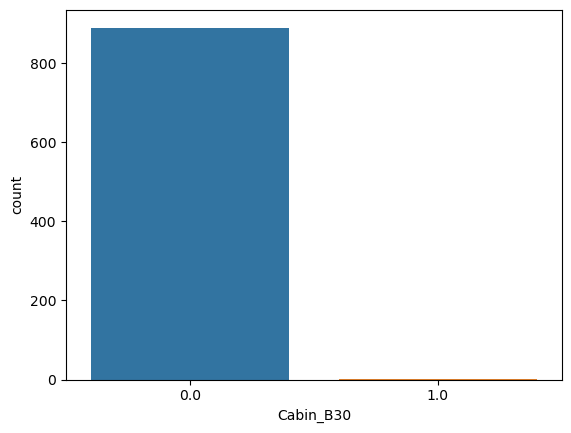

In [196]:
print(titanic_data_encoded['Cabin_B30'].value_counts())
ts34=sns.countplot(x='Cabin_B30',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B3, dtype: int64


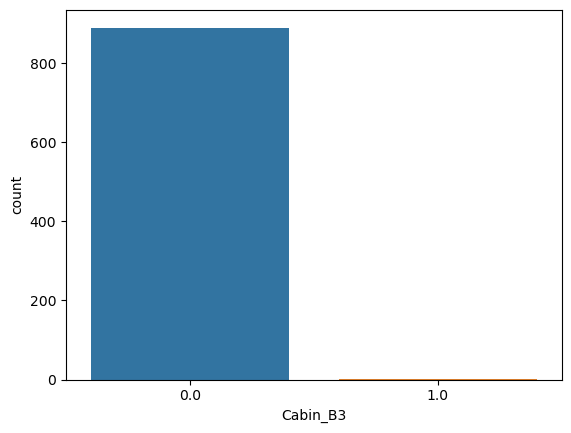

In [85]:
print(titanic_data_encoded['Cabin_B3'].value_counts())
ts34=sns.countplot(x='Cabin_B3',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_B28, dtype: int64


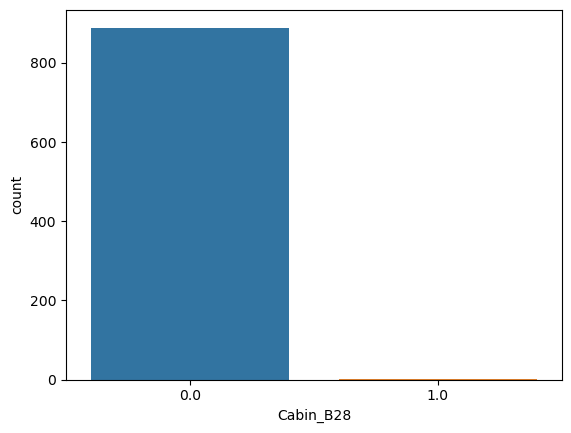

In [86]:
print(titanic_data_encoded['Cabin_B28'].value_counts())
ts34=sns.countplot(x='Cabin_B28',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_B22, dtype: int64


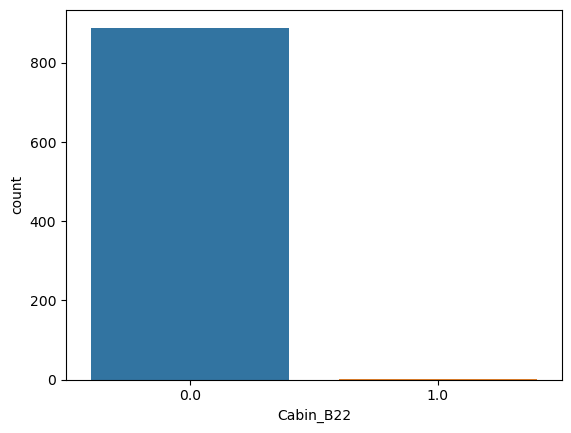

In [87]:
print(titanic_data_encoded['Cabin_B22'].value_counts())
ts34=sns.countplot(x='Cabin_B22',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_B20, dtype: int64


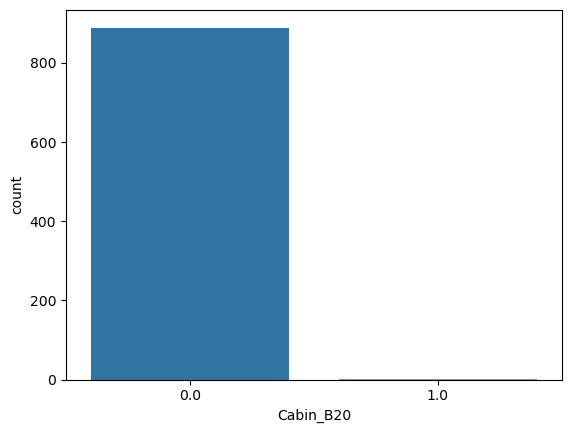

In [88]:
print(titanic_data_encoded['Cabin_B20'].value_counts())
ts34=sns.countplot(x='Cabin_B20',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B19, dtype: int64


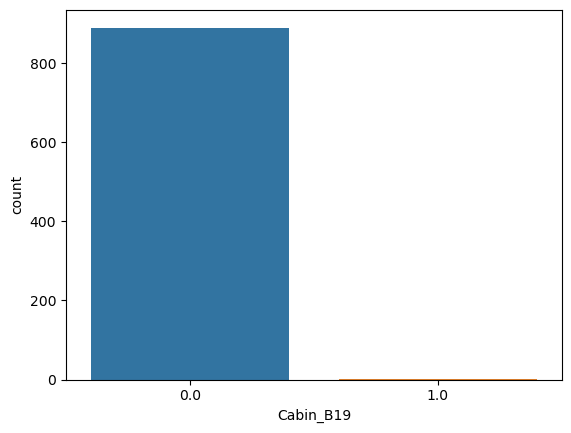

In [89]:
print(titanic_data_encoded['Cabin_B19'].value_counts())
ts34=sns.countplot(x='Cabin_B19',data=titanic_data_encoded)
plt.show()

0.0    885
1.0      6
Name: Cabin_B18, dtype: int64


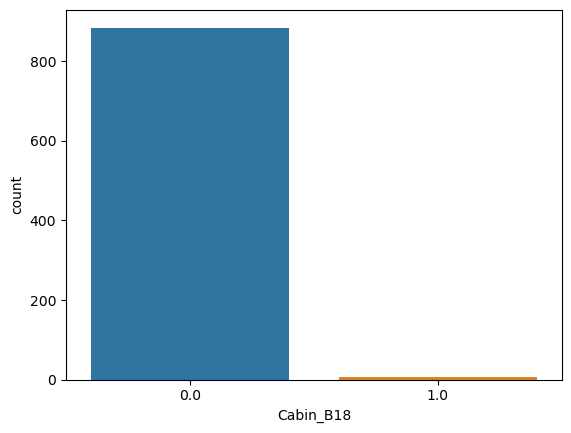

In [202]:
print(titanic_data_encoded['Cabin_B18'].value_counts())
ts34=sns.countplot(x='Cabin_B18',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B102, dtype: int64


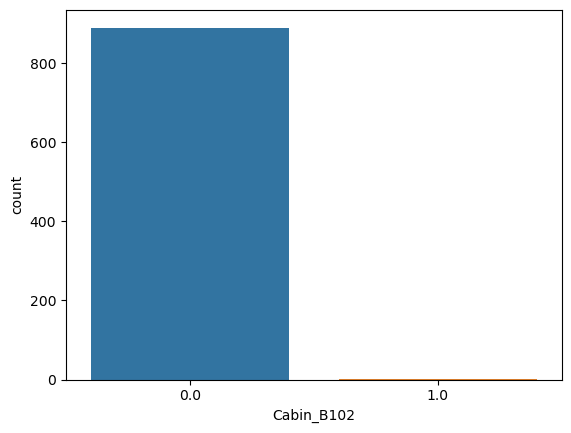

In [90]:
print(titanic_data_encoded['Cabin_B102'].value_counts())
ts34=sns.countplot(x='Cabin_B102',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_B101, dtype: int64


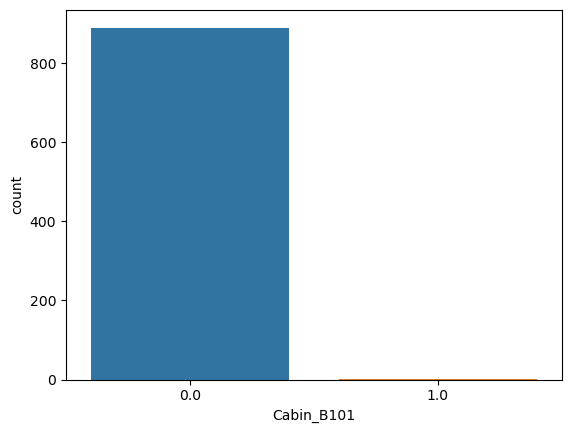

In [91]:
print(titanic_data_encoded['Cabin_B101'].value_counts())
ts34=sns.countplot(x='Cabin_B101',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_A7, dtype: int64


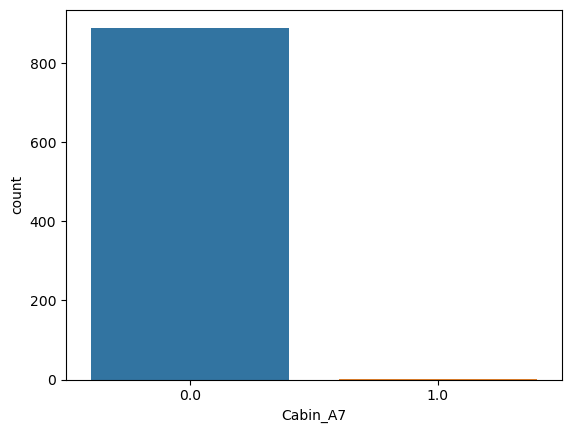

In [92]:
print(titanic_data_encoded['Cabin_A7'].value_counts())
ts34=sns.countplot(x='Cabin_A7',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_A6, dtype: int64


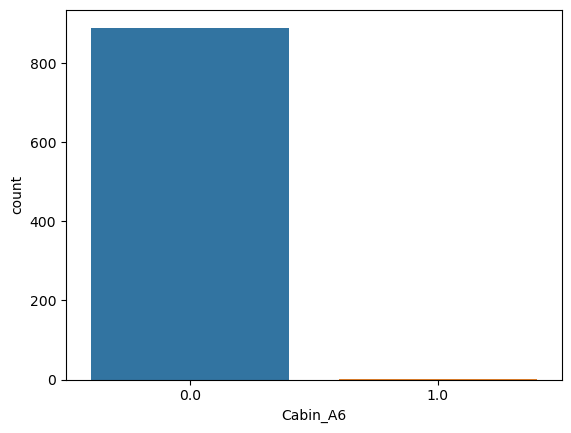

In [93]:
print(titanic_data_encoded['Cabin_A6'].value_counts())
ts34=sns.countplot(x='Cabin_A6',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_A5, dtype: int64


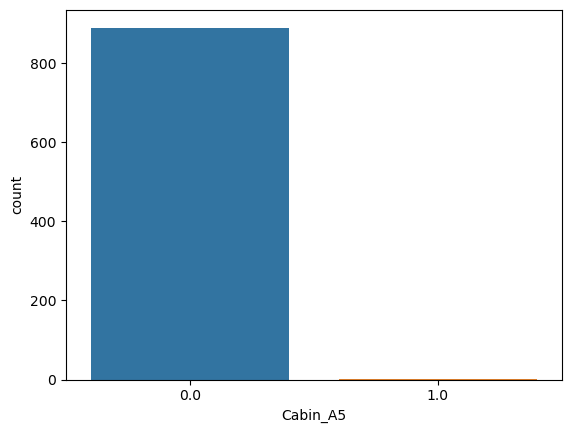

In [216]:
print(titanic_data_encoded['Cabin_A5'].value_counts())
ts34=sns.countplot(x='Cabin_A5',data=titanic_data_encoded)
plt.show()

0.0    888
1.0      3
Name: Cabin_A36, dtype: int64


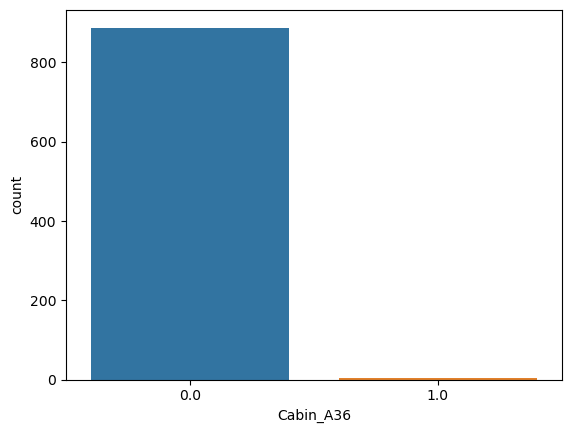

In [215]:
print(titanic_data_encoded['Cabin_A36'].value_counts())
ts34=sns.countplot(x='Cabin_A36',data=titanic_data_encoded)
plt.show()

0.0    887
1.0      4
Name: Cabin_A34, dtype: int64


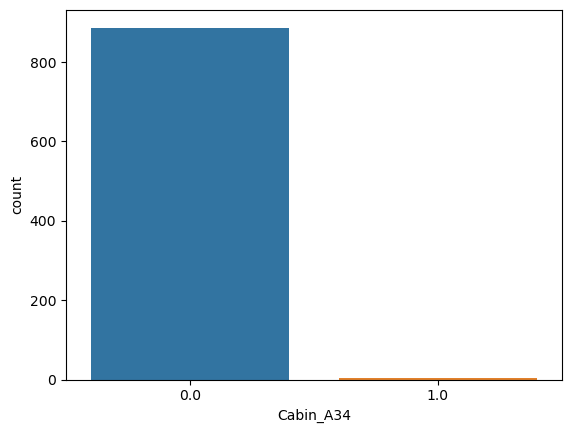

In [214]:
print(titanic_data_encoded['Cabin_A34'].value_counts())
ts34=sns.countplot(x='Cabin_A34',data=titanic_data_encoded)
plt.show()

0.0    883
1.0      8
Name: Cabin_A32, dtype: int64


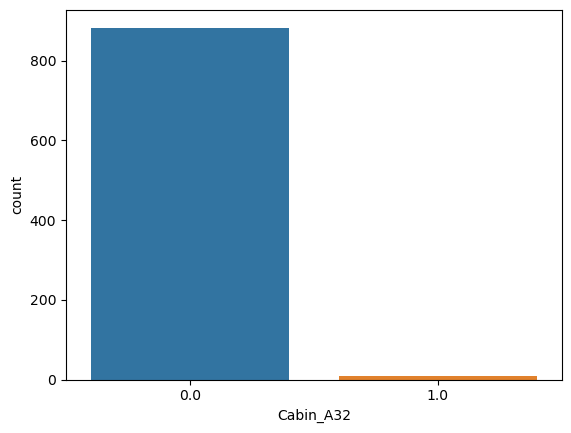

In [213]:
print(titanic_data_encoded['Cabin_A32'].value_counts())
ts34=sns.countplot(x='Cabin_A32',data=titanic_data_encoded)
plt.show()

0.0    885
1.0      6
Name: Cabin_A31, dtype: int64


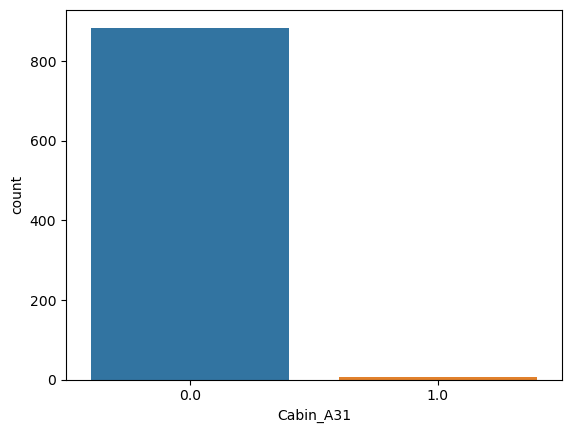

In [212]:
print(titanic_data_encoded['Cabin_A31'].value_counts())
ts34=sns.countplot(x='Cabin_A31',data=titanic_data_encoded)
plt.show()

0.0    879
1.0     12
Name: Cabin_A26, dtype: int64


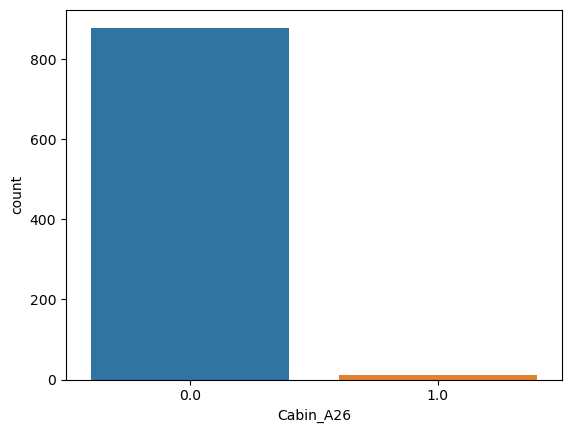

In [211]:
print(titanic_data_encoded['Cabin_A26'].value_counts())
ts34=sns.countplot(x='Cabin_A26',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_A23, dtype: int64


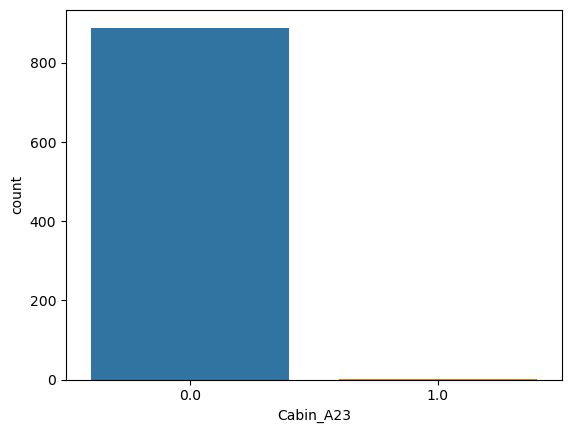

In [210]:
print(titanic_data_encoded['Cabin_A23'].value_counts())
ts34=sns.countplot(x='Cabin_A23',data=titanic_data_encoded)
plt.show()

0.0    881
1.0     10
Name: Cabin_A20, dtype: int64


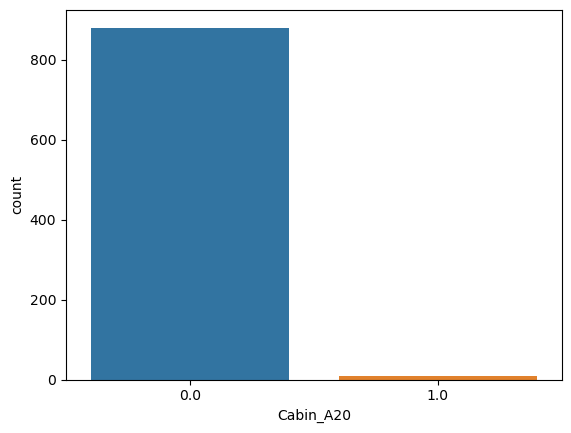

In [209]:
print(titanic_data_encoded['Cabin_A20'].value_counts())
ts34=sns.countplot(x='Cabin_A20',data=titanic_data_encoded)
plt.show()

0.0    884
1.0      7
Name: Cabin_A19, dtype: int64


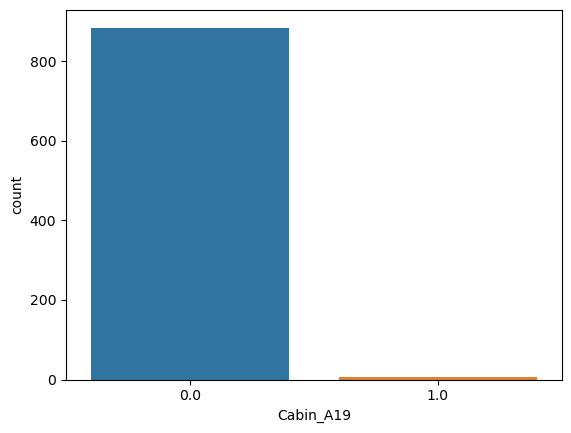

In [208]:
print(titanic_data_encoded['Cabin_A19'].value_counts())
ts34=sns.countplot(x='Cabin_A19',data=titanic_data_encoded)
plt.show()

0.0    889
1.0      2
Name: Cabin_A16, dtype: int64


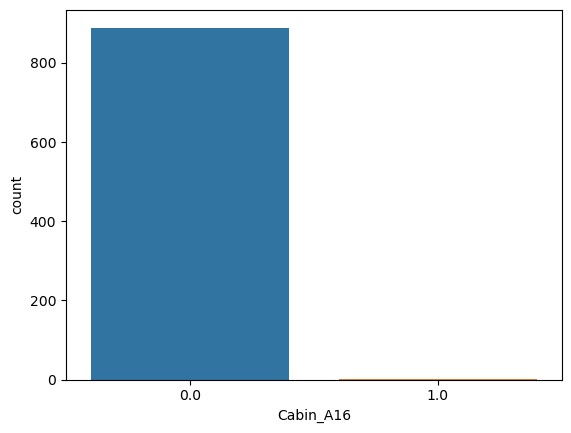

In [207]:
print(titanic_data_encoded['Cabin_A16'].value_counts())
ts34=sns.countplot(x='Cabin_A16',data=titanic_data_encoded)
plt.show()

0.0    890
1.0      1
Name: Cabin_A14, dtype: int64


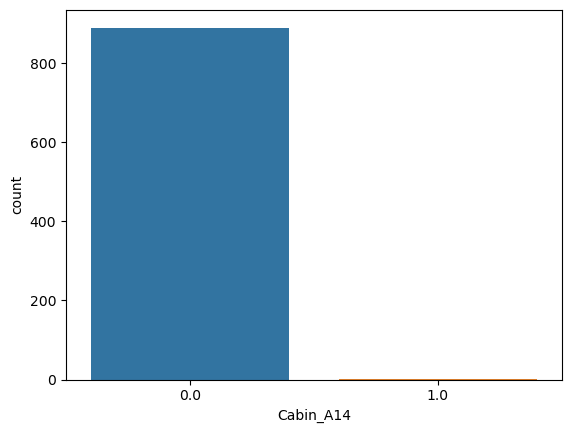

In [94]:
print(titanic_data_encoded['Cabin_A14'].value_counts())
ts34=sns.countplot(x='Cabin_A14',data=titanic_data_encoded)
plt.show()

0.0    888
1.0      3
Name: Cabin_C22 C26, dtype: int64


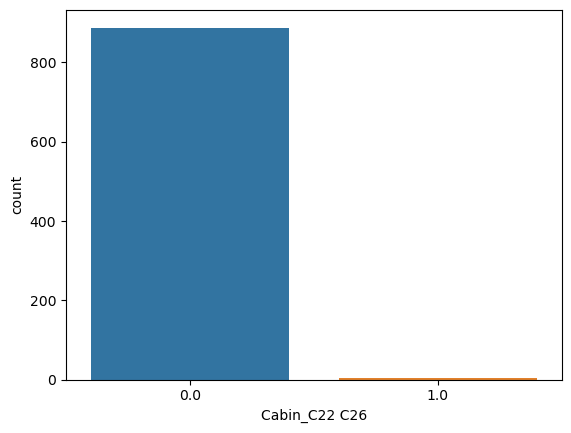

In [95]:
print(titanic_data_encoded['Cabin_C22 C26'].value_counts())
ts34=sns.countplot(x='Cabin_C22 C26',data=titanic_data_encoded)
plt.show()

Most of the passengers were in the Cabin_C22 C26.

Now let's continue univariate analysis using distplot for all the 164 columns. Since there are so many columns, we have to scale the figure size to large graph and fix the rotation of the x variables. 

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_9192\2028808313.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data_encoded[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_9192\2028808313.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data_encoded[

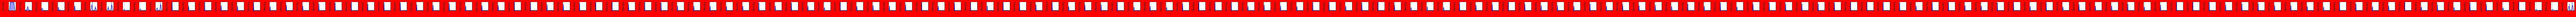

In [220]:
plt.figure(figsize=(145,145),facecolor = "red")
plotnumber=1
for col in titanicsurvivor_col:
    if plotnumber<=164:
        wc=plt.subplot(163,163,plotnumber)
        sns.distplot(titanic_data_encoded[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 2)
        plt.xticks(rotation=90, fontsize=2)
        plt.yticks(rotation = 0, fontsize =2)
    plotnumber+=1
plt.tight_layout()

We can see that the density of skewness in most of the plots except the passengerid column. Cabin columns are mostly skewed to the left. P-class1 and p_class2 are skewed to the left, and pclass3 is skewed to the right.Embarked S is skewed to the right, but c and s is skewed to the left. Sex_male is skewed to the right and sex_female is skewed to the left. Rest all graphs of columns are skewed to the left.

Now let's do b ivariate analysis to understand the relationship between the variables in the dataset.

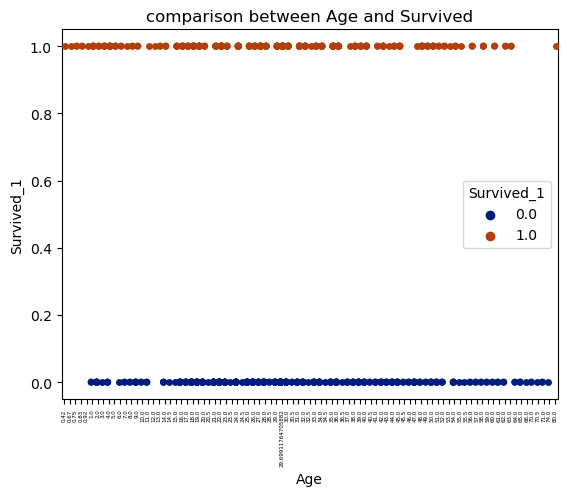

<Figure size 2800x200 with 0 Axes>

In [35]:
plt.title("comparison between Age and Survived")
sns.stripplot(x= "Age", y= "Survived_1", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

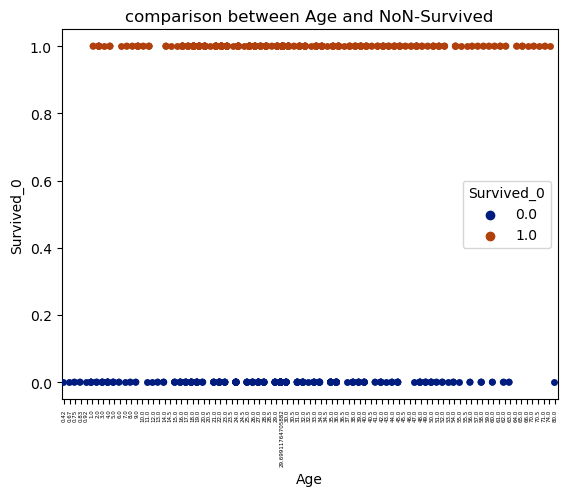

<Figure size 2800x200 with 0 Axes>

In [36]:
plt.title("comparison between Age and NoN-Survived")
sns.stripplot(x= "Age", y= "Survived_0", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

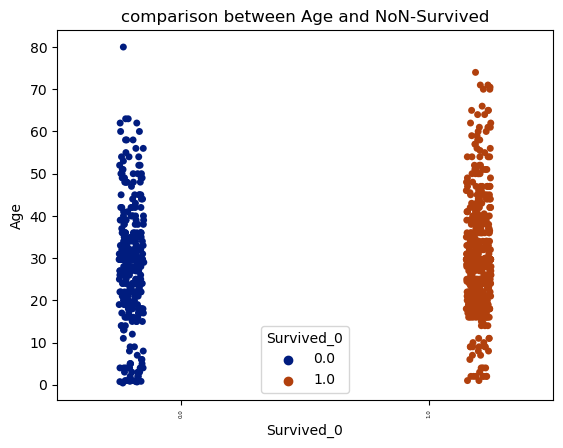

<Figure size 2800x200 with 0 Axes>

In [39]:
plt.title("comparison between Age and NoN-Survived")
sns.stripplot(x= "Survived_0", y= "Age", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

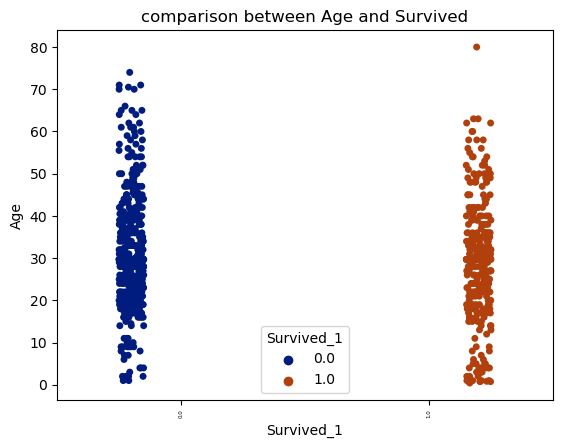

<Figure size 2800x200 with 0 Axes>

In [41]:
plt.title("comparison between Age and Survived")
sns.stripplot(x= "Survived_1", y= "Age", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the survivors consisted of younger people from the age group - 0 to 40

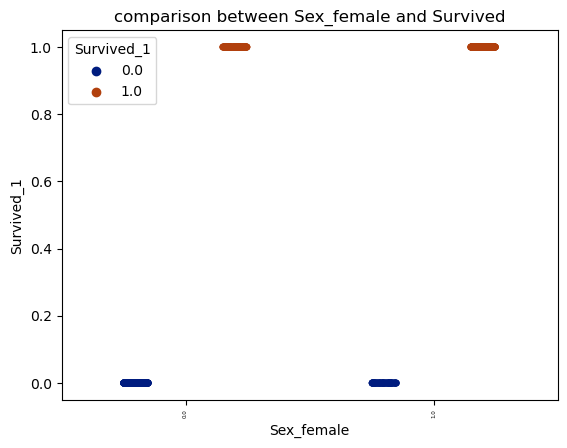

<Figure size 2800x200 with 0 Axes>

In [38]:
plt.title("comparison between Sex_female and Survived")
sns.stripplot(x= "Sex_female", y= "Survived_1", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

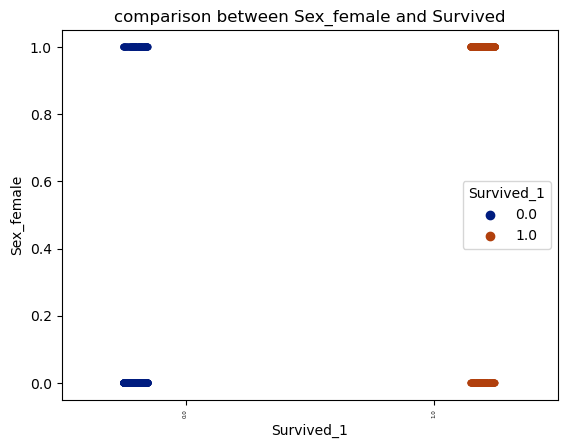

<Figure size 2800x200 with 0 Axes>

In [42]:
plt.title("comparison between Sex_female and Survived")
sns.stripplot(x= "Survived_1", y= "Sex_female", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

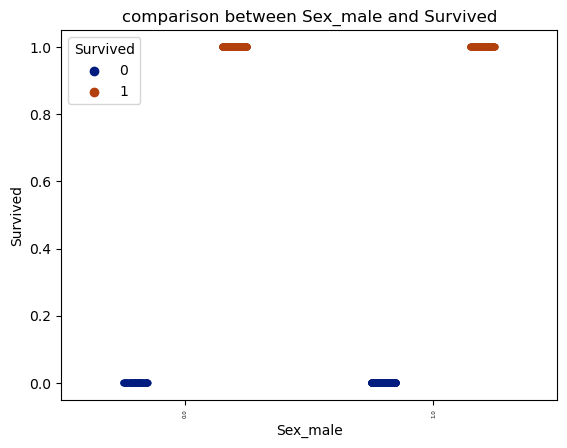

<Figure size 2800x200 with 0 Axes>

In [223]:
plt.title("comparison between Sex_male and Survived")
sns.stripplot(x= "Sex_male", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

We can see that mix of survivors and non-survivors are somewhat mixed.

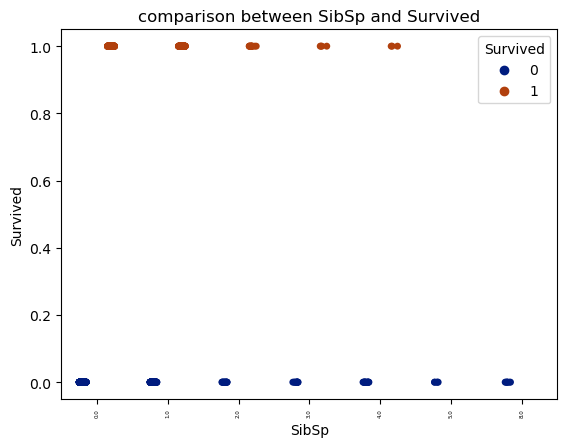

<Figure size 2800x200 with 0 Axes>

In [227]:
plt.title("comparison between SibSp and Survived")
sns.stripplot(x= "SibSp", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

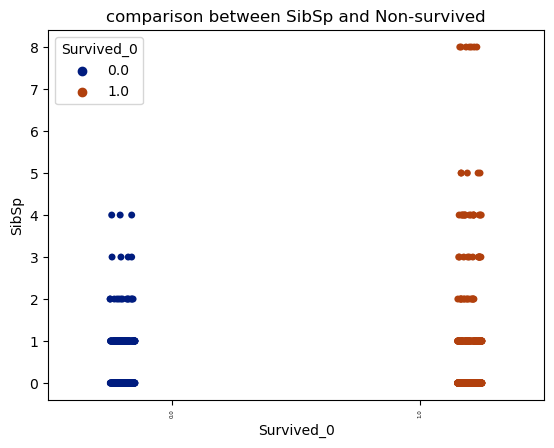

<Figure size 2800x200 with 0 Axes>

In [43]:
plt.title("comparison between SibSp and Non-survived")
sns.stripplot(x= "Survived_0", y= "SibSp", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

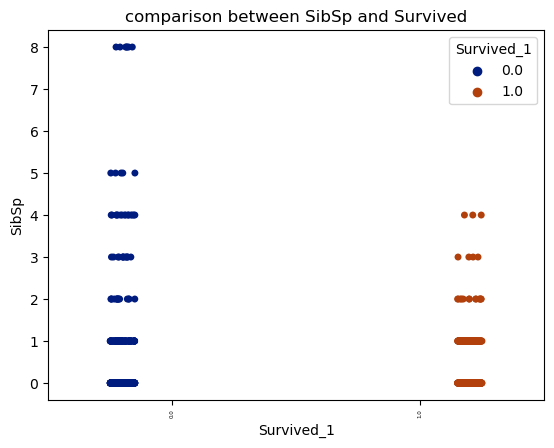

<Figure size 2800x200 with 0 Axes>

In [44]:
plt.title("comparison between SibSp and Survived")
sns.stripplot(x= "Survived_1", y= "SibSp", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

A lot of sibilings of passengers did not survive and some even lost upto 8 siblings

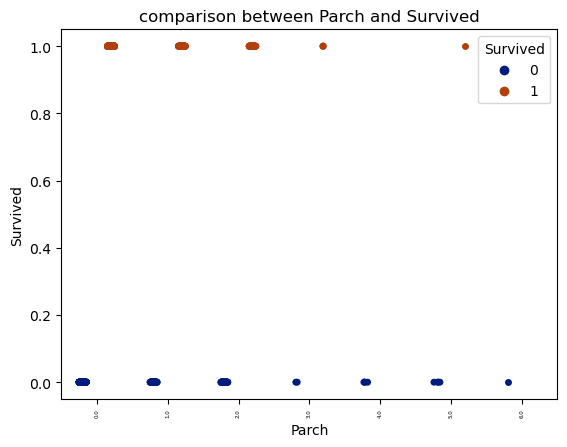

<Figure size 2800x200 with 0 Axes>

In [226]:
plt.title("comparison between Parch and Survived")
sns.stripplot(x= "Parch", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

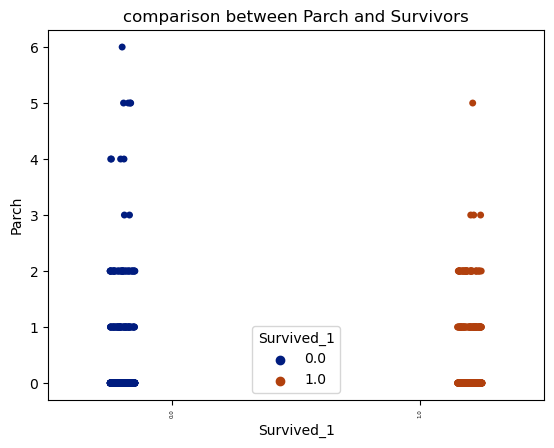

<Figure size 2800x200 with 0 Axes>

In [45]:
plt.title("comparison between Parch and Survivors")
sns.stripplot(x= "Survived_1", y= "Parch", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

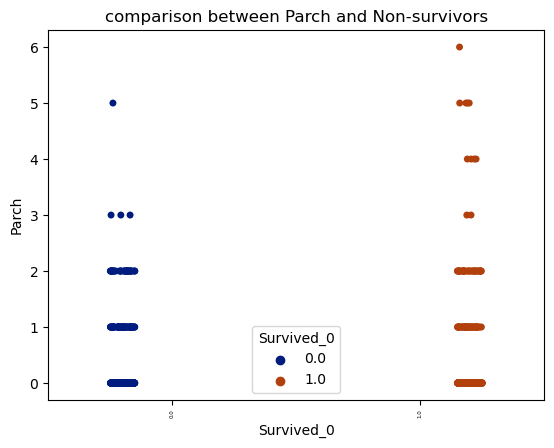

<Figure size 2800x200 with 0 Axes>

In [46]:
plt.title("comparison between Parch and Non-survivors")
sns.stripplot(x= "Survived_0", y= "Parch", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
Most of the survivors had less than 3 parents or children aboard

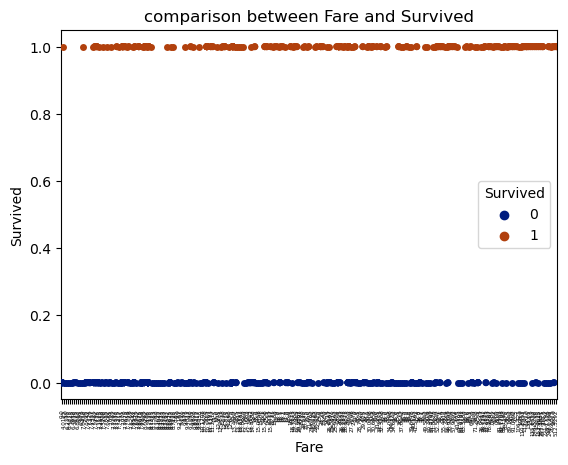

<Figure size 2800x200 with 0 Axes>

In [236]:
plt.title("comparison between Fare and Survived")
sns.stripplot(x= "Fare", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

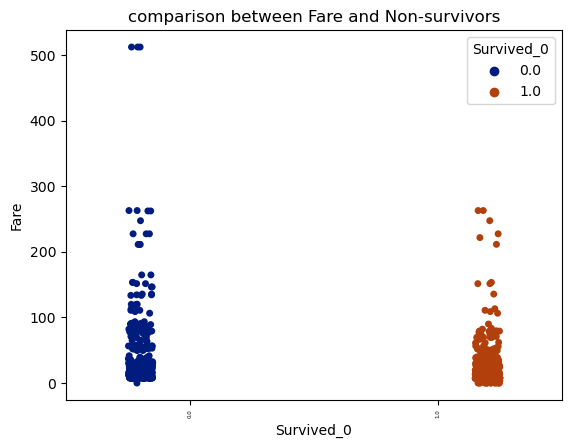

<Figure size 2800x200 with 0 Axes>

In [48]:
plt.title("comparison between Fare and Non-survivors")
sns.stripplot(x= "Survived_0", y= "Fare", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

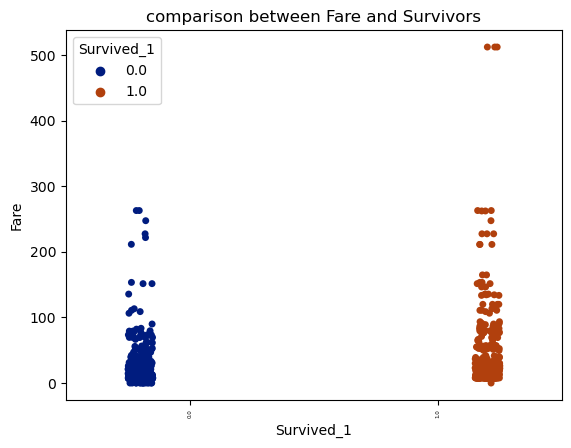

<Figure size 2800x200 with 0 Axes>

In [49]:
plt.title("comparison between Fare and Survivors")
sns.stripplot(x= "Survived_1", y= "Fare", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

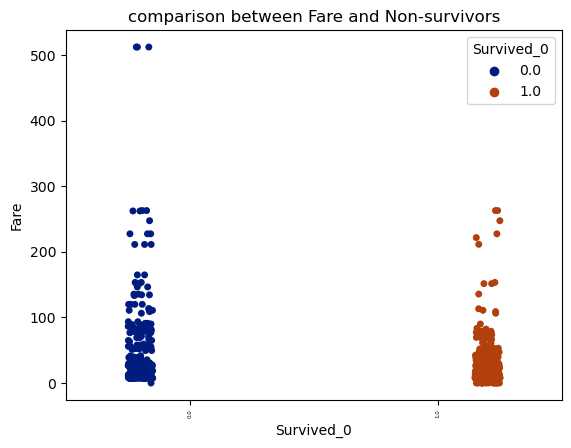

<Figure size 2800x200 with 0 Axes>

In [50]:
plt.title("comparison between Fare and Non-survivors")
sns.stripplot(x= "Survived_0", y= "Fare", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Very few people paid a higher amount that exceeded 250 british pounds

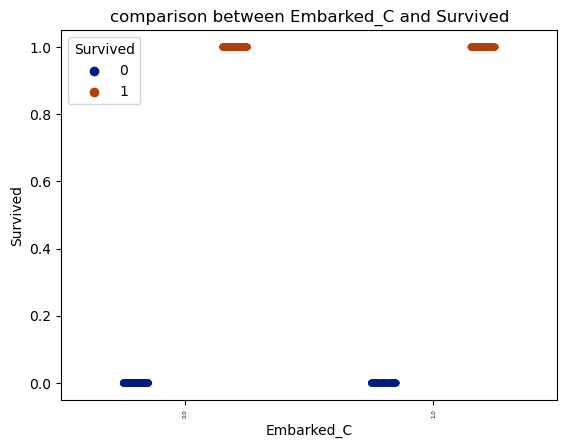

<Figure size 2800x200 with 0 Axes>

In [228]:
plt.title("comparison between Embarked_C and Survived")
sns.stripplot(x= "Embarked_C", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

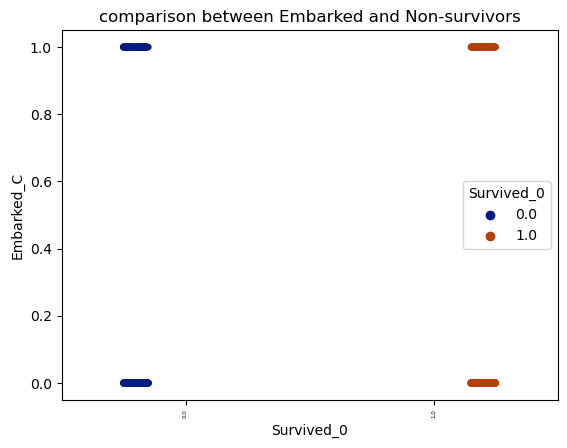

<Figure size 2800x200 with 0 Axes>

In [51]:
plt.title("comparison between Embarked and Non-survivors")
sns.stripplot(x= "Survived_0", y= "Embarked_C", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

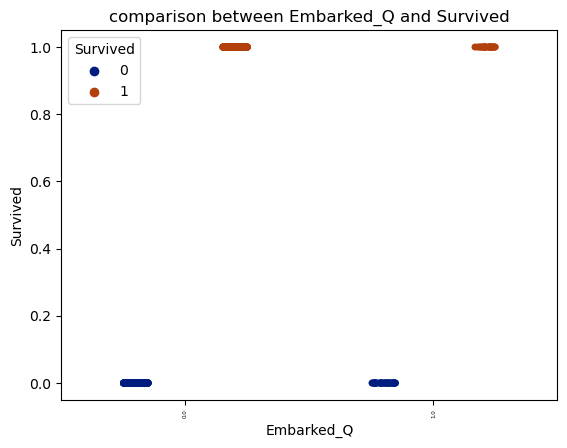

<Figure size 2800x200 with 0 Axes>

In [229]:
plt.title("comparison between Embarked_Q and Survived")
sns.stripplot(x= "Embarked_Q", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

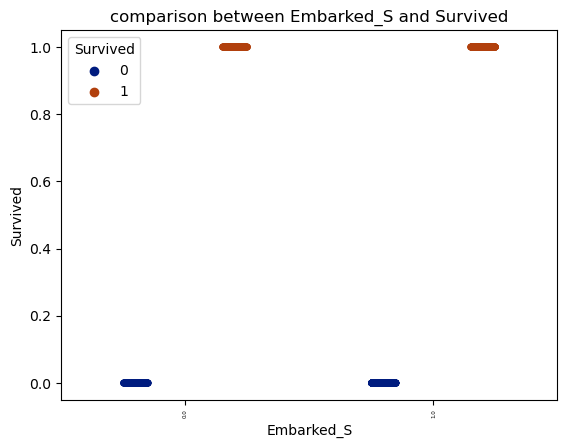

<Figure size 2800x200 with 0 Axes>

In [230]:
plt.title("comparison between Embarked_S and Survived")
sns.stripplot(x= "Embarked_S", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

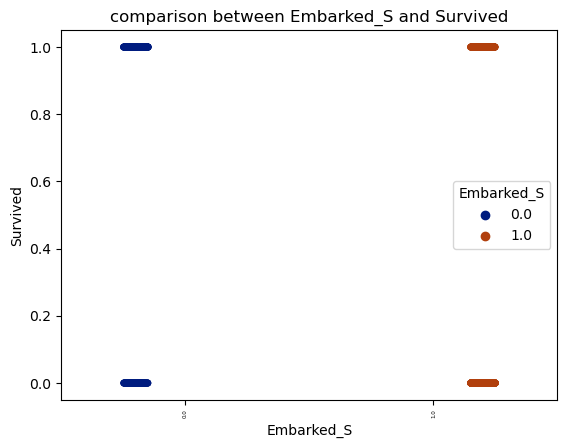

<Figure size 2800x200 with 0 Axes>

In [248]:
plt.title("comparison between Embarked_S and Survived")
sns.stripplot(x= "Embarked_S", y= "Survived", data = titanic_data_encoded,hue='Embarked_S', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

We can't make much out of the graphs created from embarked encoded columns

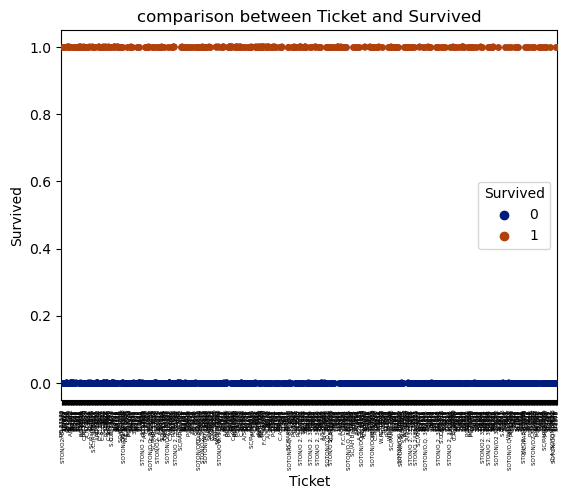

<Figure size 2800x200 with 0 Axes>

In [231]:
plt.title("comparison between Ticket and Survived")
sns.stripplot(x= "Ticket", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

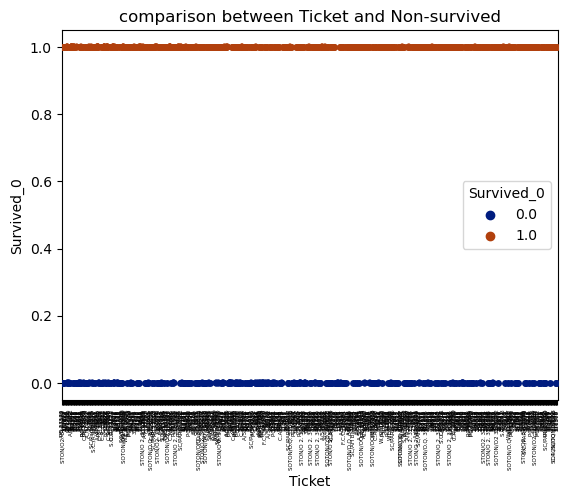

<Figure size 2800x200 with 0 Axes>

In [52]:
plt.title("comparison between Ticket and Non-survived")
sns.stripplot(x= "Ticket", y= "Survived_0", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

We can't make much out of the ticket numbers of survivors using strip plots

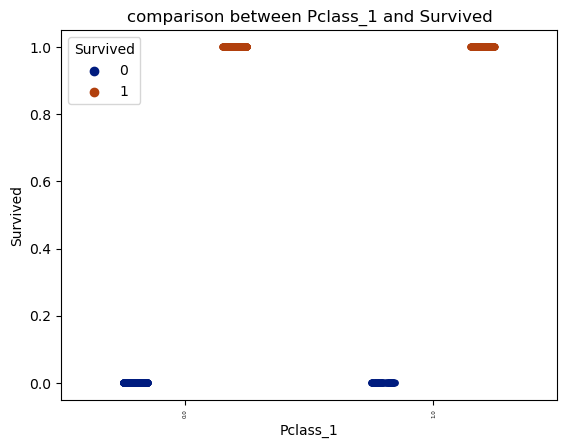

<Figure size 2800x200 with 0 Axes>

In [232]:
plt.title("comparison between Pclass_1 and Survived")
sns.stripplot(x= "Pclass_1", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

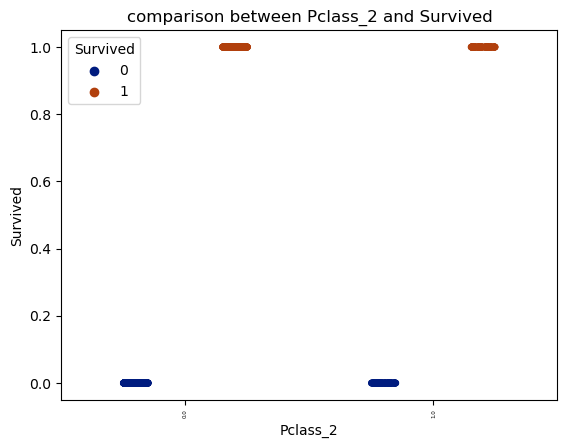

<Figure size 2800x200 with 0 Axes>

In [234]:
plt.title("comparison between Pclass_2 and Survived")
sns.stripplot(x= "Pclass_2", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

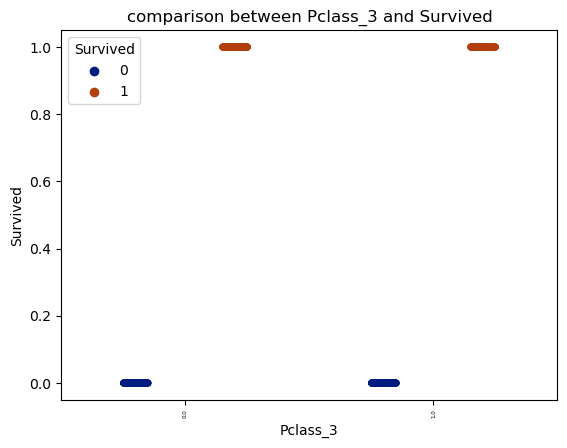

<Figure size 2800x200 with 0 Axes>

In [235]:
plt.title("comparison between Pclass_3 and Survived")
sns.stripplot(x= "Pclass_3", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
Strip plots are not able to show any relation about survivors and p_class columns

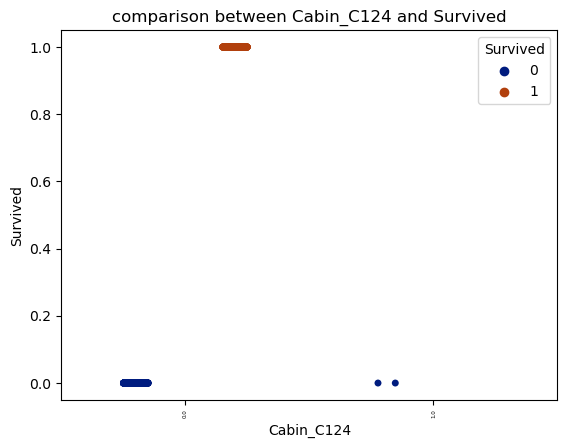

<Figure size 2800x200 with 0 Axes>

In [237]:
plt.title("comparison between Cabin_C124 and Survived")
sns.stripplot(x= "Cabin_C124", y= "Survived", data = titanic_data_encoded,hue='Survived', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

There are no conclusive statements that we can derive from strip plots from survivors and cabin data

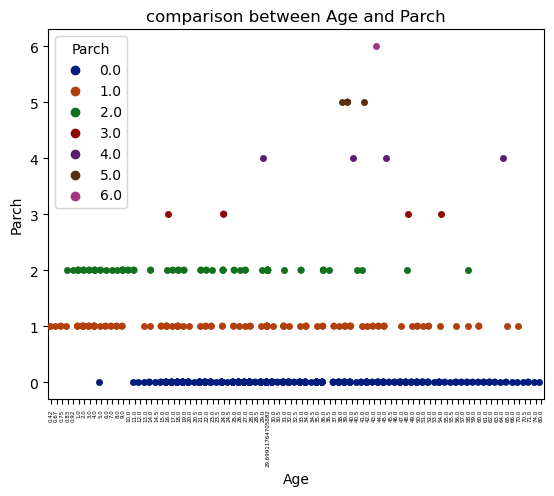

<Figure size 2800x200 with 0 Axes>

In [256]:
plt.title("comparison between Age and Parch")
sns.stripplot(x= "Age", y= "Parch", data = titanic_data_encoded,hue='Parch', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

There were maximum 1-2 parents and children on - board from age 42 months to 80 years.

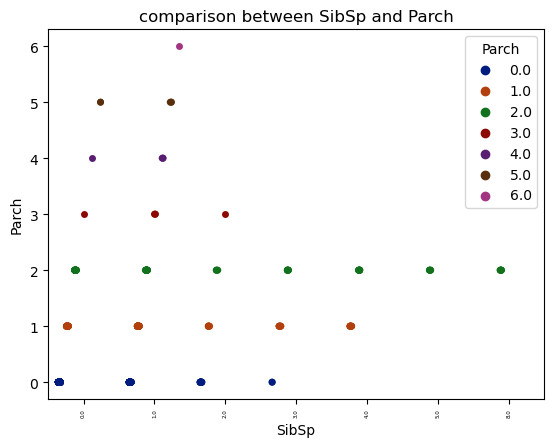

<Figure size 2800x200 with 0 Axes>

In [258]:
plt.title("comparison between SibSp and Parch")
sns.stripplot(x= "SibSp", y= "Parch", data = titanic_data_encoded,hue='Parch', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the sibilings had atleast 2 parents or children on board.

Now let's do some barplots to understand the relationship between variables better.

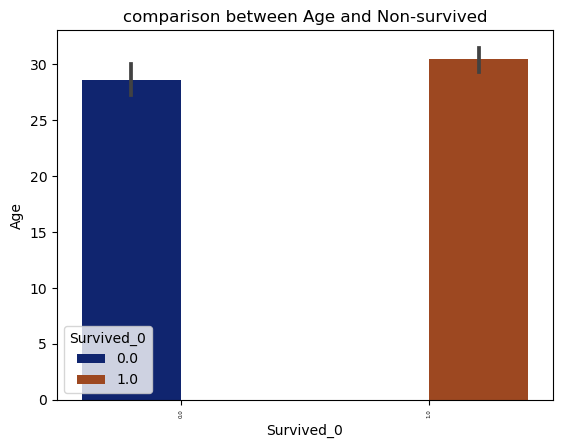

<Figure size 2800x200 with 0 Axes>

In [53]:
plt.title("comparison between Age and Non-survived")
sns.barplot(x= "Survived_0", y= "Age", data = titanic_data_encoded,hue='Survived_0', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

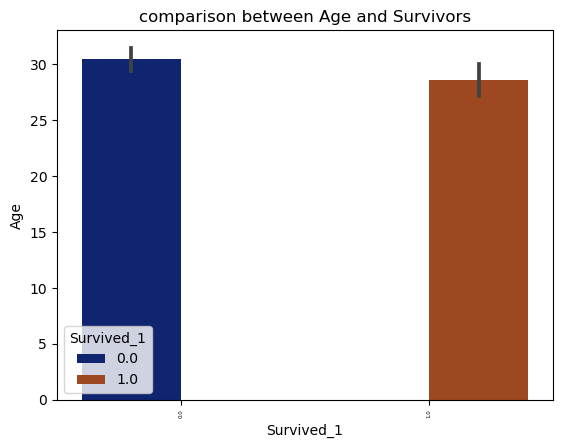

<Figure size 2800x200 with 0 Axes>

In [54]:
plt.title("comparison between Age and Survivors")
sns.barplot(x= "Survived_1", y= "Age", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Age 29 is the most common age of non-survivors

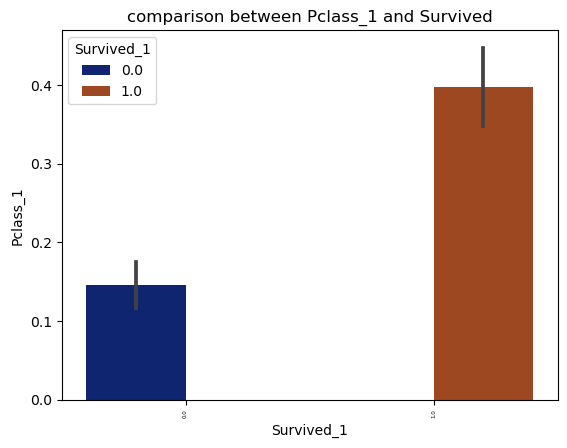

<Figure size 2800x200 with 0 Axes>

In [56]:
plt.title("comparison between Pclass_1 and Survived")
sns.barplot(x= "Survived_1", y= "Pclass_1", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

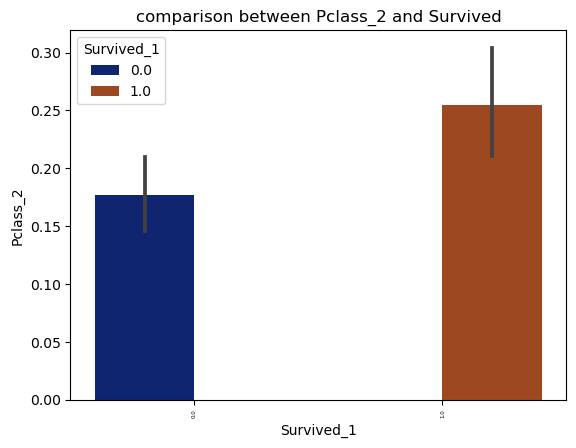

<Figure size 2800x200 with 0 Axes>

In [57]:
plt.title("comparison between Pclass_2 and Survived")
sns.barplot(x= "Survived_1", y= "Pclass_2", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

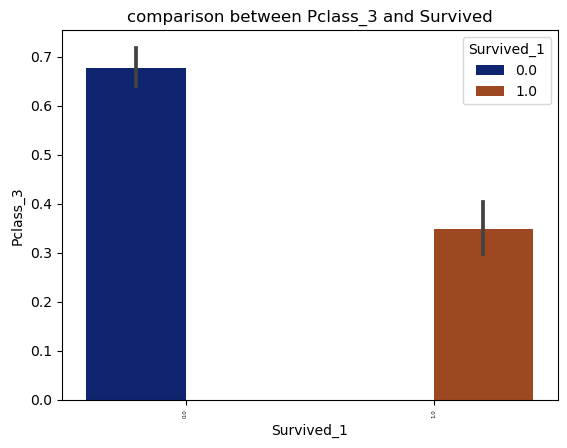

<Figure size 2800x200 with 0 Axes>

In [58]:
plt.title("comparison between Pclass_3 and Survived")
sns.barplot(x= "Survived_1", y= "Pclass_3", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

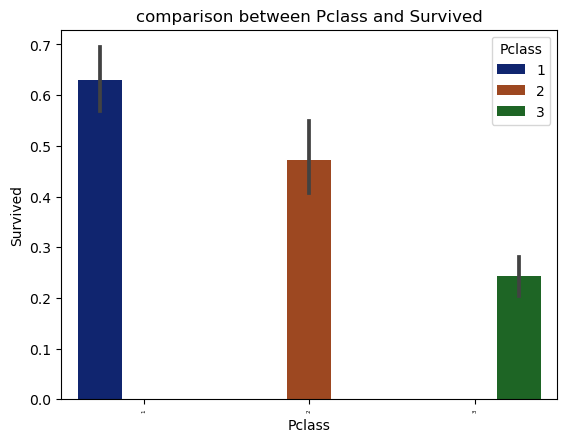

<Figure size 2800x200 with 0 Axes>

In [247]:
plt.title("comparison between Pclass and Survived")
sns.barplot(x= "Pclass", y= "Survived", data = titanic_data,hue='Pclass', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the non-survivors were from Pclass_3 and most of the survivors were from Pclass_1

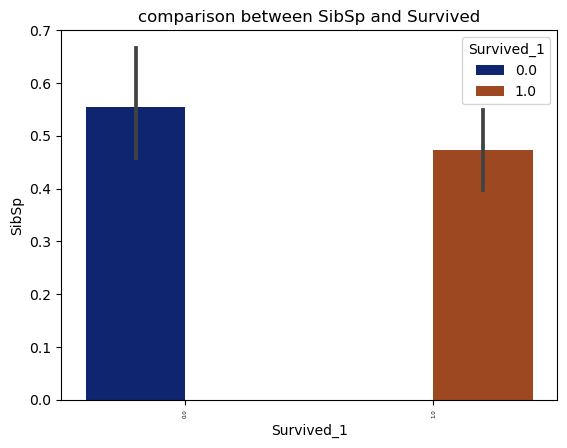

<Figure size 2800x200 with 0 Axes>

In [55]:
plt.title("comparison between SibSp and Survived")
sns.barplot(x= "Survived_1", y= "SibSp", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

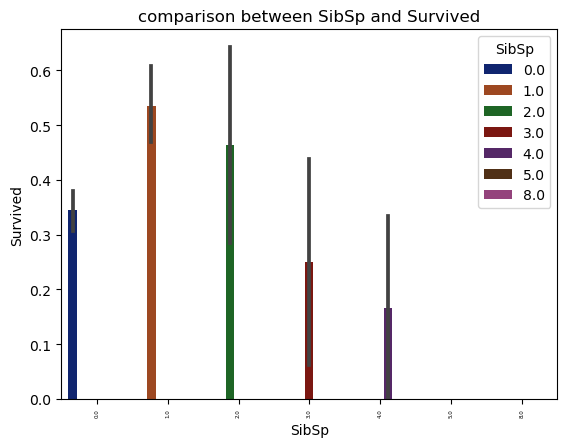

<Figure size 2800x200 with 0 Axes>

In [254]:
plt.title("comparison between SibSp and Survived")
sns.barplot(x= "SibSp", y= "Survived", data = titanic_data_encoded,hue='SibSp', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the survivors didn't have sibilings onboard. Most number of sibilings a passenger had was 1.

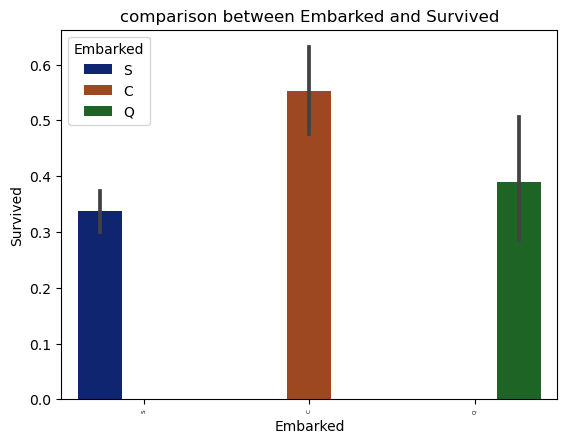

<Figure size 2800x200 with 0 Axes>

In [59]:
plt.title("comparison between Embarked and Survived")
sns.barplot(x= "Embarked", y= "Survived", data = titanic_data,hue='Embarked', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

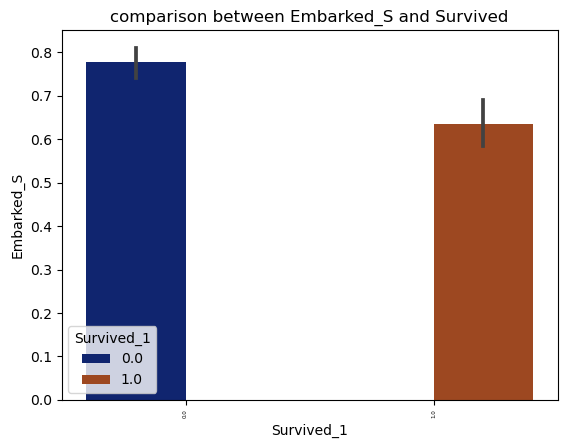

<Figure size 2800x200 with 0 Axes>

In [60]:
plt.title("comparison between Embarked_S and Survived")
sns.barplot(x= "Survived_1", y= "Embarked_S", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

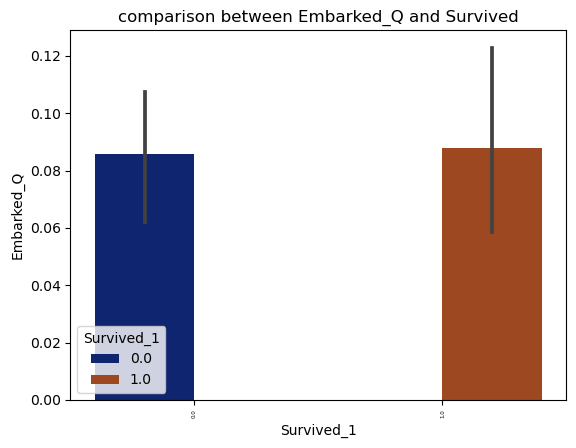

<Figure size 2800x200 with 0 Axes>

In [61]:
plt.title("comparison between Embarked_Q and Survived")
sns.barplot(x= "Survived_1", y= "Embarked_Q", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

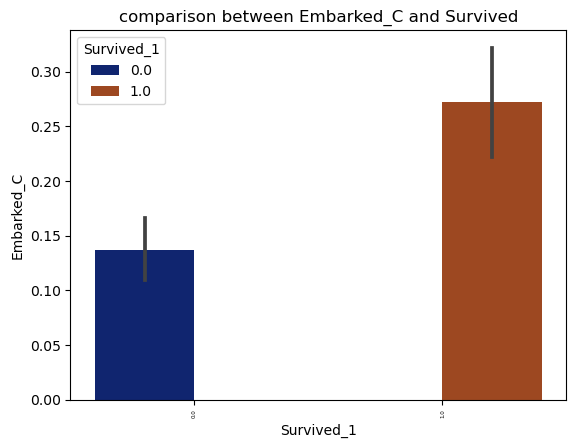

<Figure size 2800x200 with 0 Axes>

In [62]:
plt.title("comparison between Embarked_C and Survived")
sns.barplot(x= "Survived_1", y= "Embarked_C", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the survivors embarked from Cherbourg and most of the non-survivors embarked from Southampton

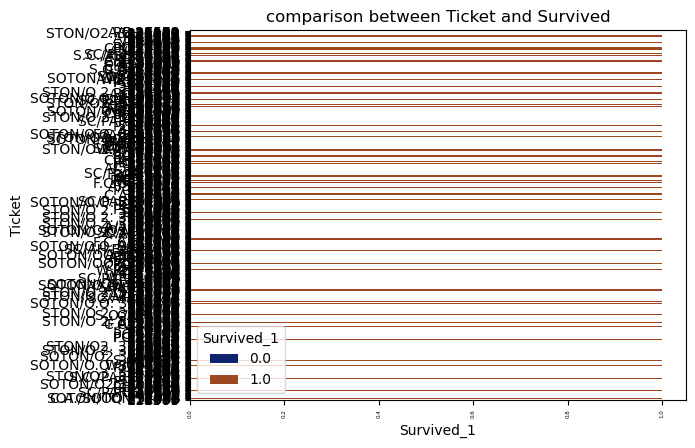

<Figure size 2800x200 with 0 Axes>

In [63]:
plt.title("comparison between Ticket and Survived")
sns.barplot(x= "Survived_1", y= "Ticket", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Not much info from tickets using the barplots

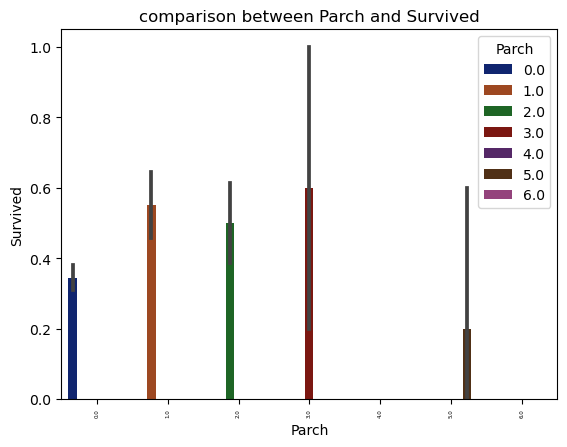

<Figure size 2800x200 with 0 Axes>

In [255]:
plt.title("comparison between Parch and Survived")
sns.barplot(x= "Parch", y= "Survived", data = titanic_data_encoded,hue='Parch', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

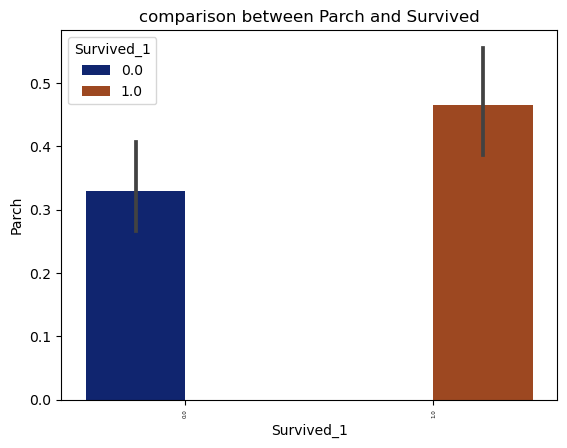

<Figure size 2800x200 with 0 Axes>

In [64]:
plt.title("comparison between Parch and Survived")
sns.barplot(x= "Survived_1", y= "Parch", data = titanic_data_encoded,hue='Survived_1', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

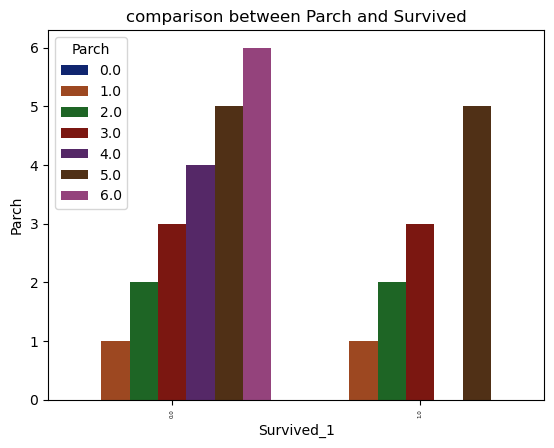

<Figure size 2800x200 with 0 Axes>

In [65]:
plt.title("comparison between Parch and Survived")
sns.barplot(x= "Survived_1", y= "Parch", data = titanic_data_encoded,hue='Parch', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Most of the survivors had 3-4 children/parents on board, whereaas as non-survivors had 2-3 children/parents onboard.

Now let's do multivariate analysis using pairplots

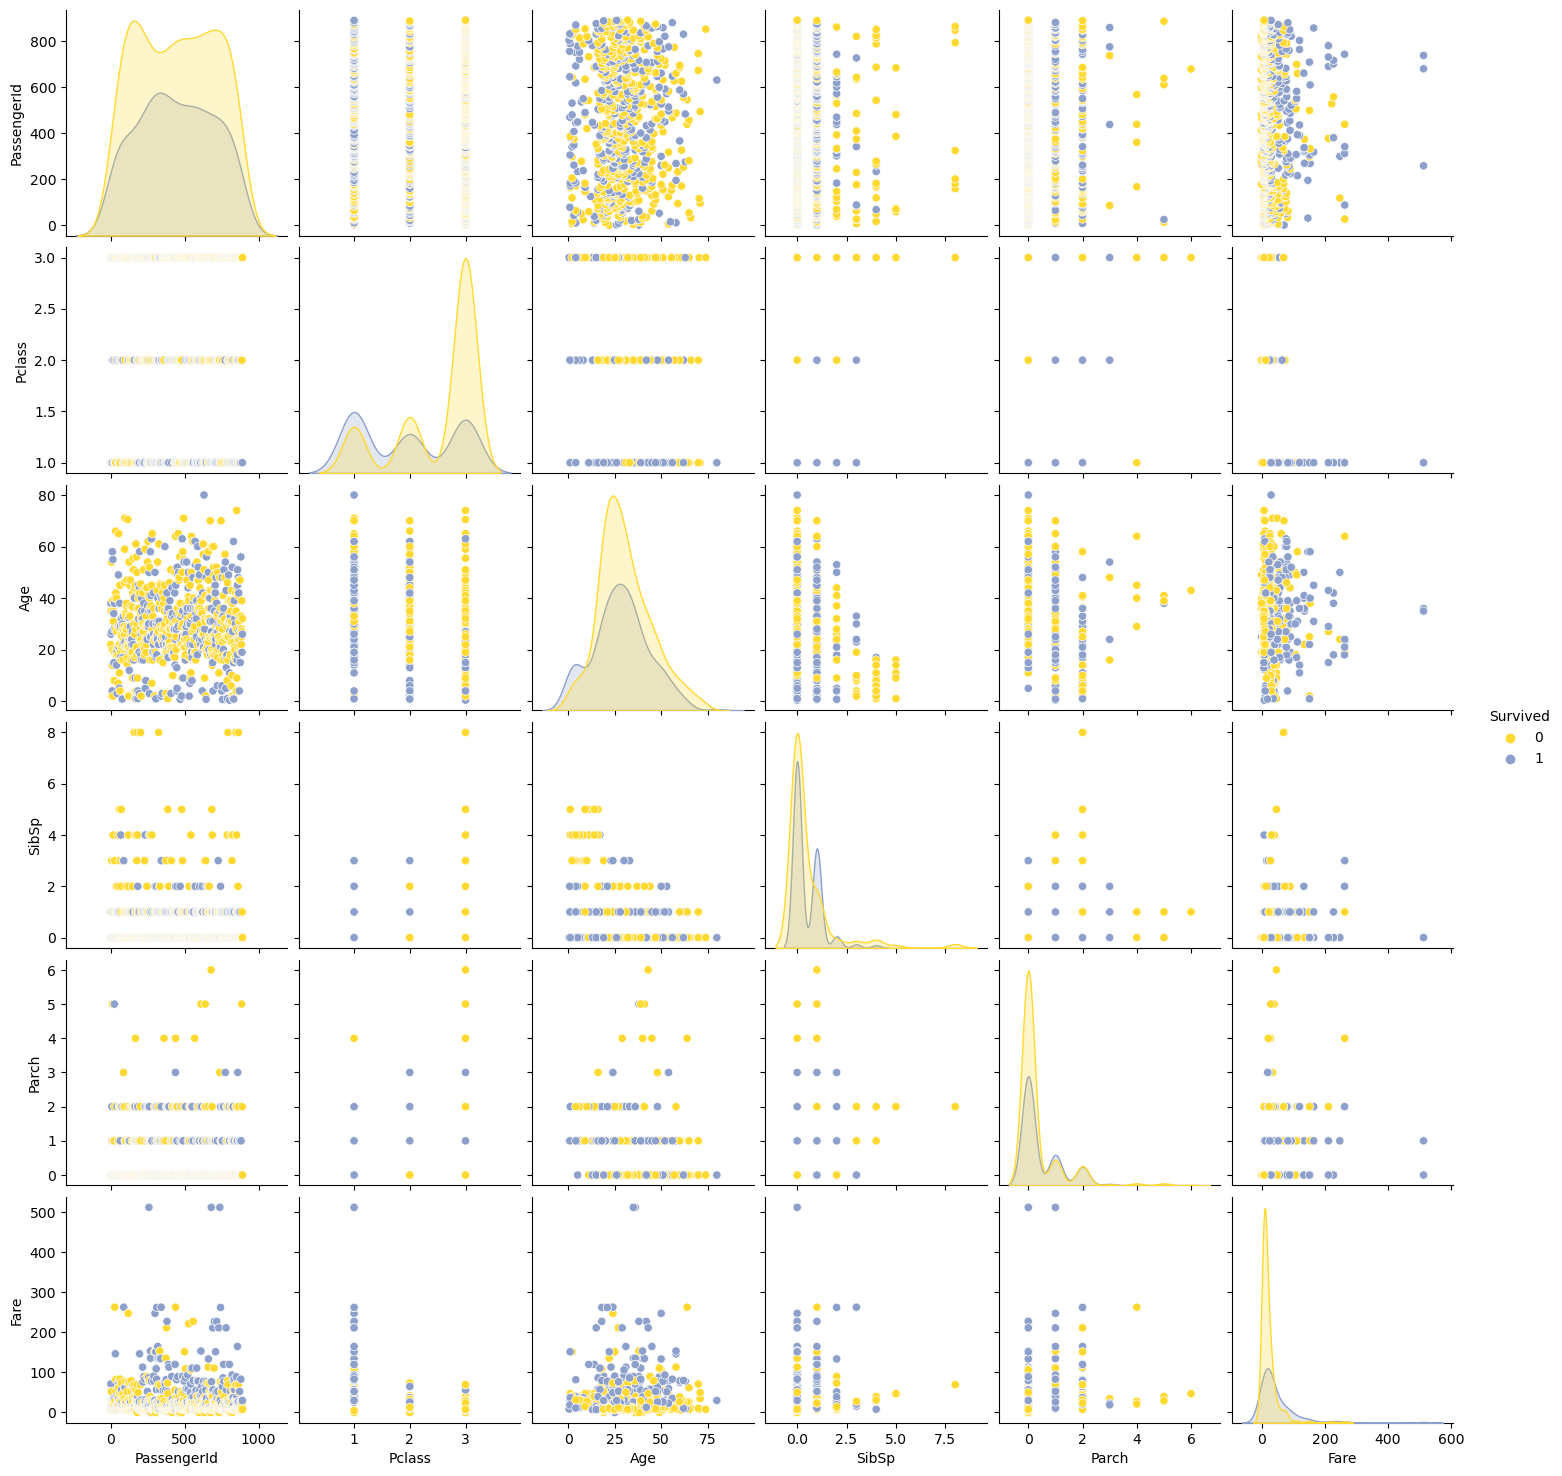

In [3]:
sns.pairplot(titanic_data, hue='Survived', palette='Set2_r')
plt.show()

Below are the finding from the above pairplots-
1) most of passengers were non-survivors
2) most of the non-survivors were from pclass3
3) most of the non-survivors had 2-3 sibilings
4) most of the non-survivors were the age of 28~29
5) most of the non-survivors had maximum of 2 parents or children on board
6) most of the non-survivors paid less than 50 british pounds for their tickets

Now let's do some catplots and understand the relationships between variables even better.

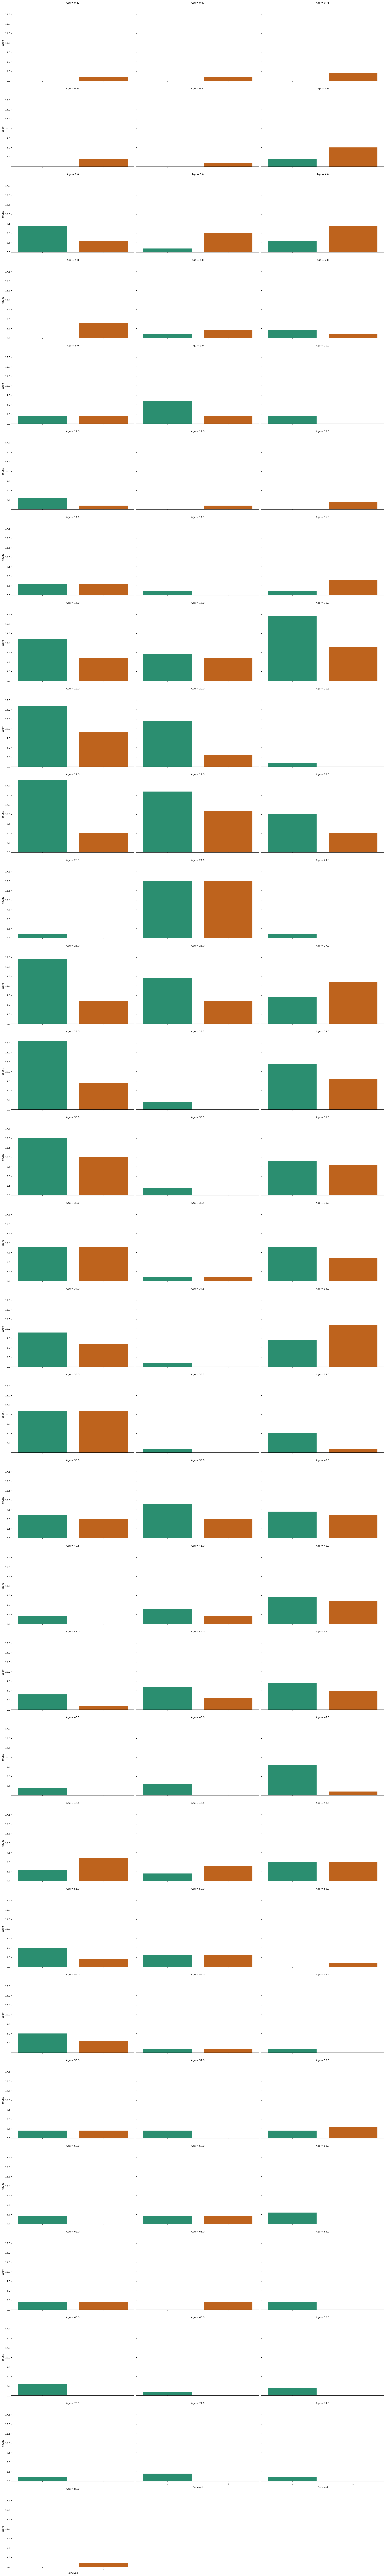

In [4]:
sns.catplot(x='Survived', col='Age', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

We can see the maximum concentrations of non-survivors between 20-30 age group

Let's check between the survvied and the parents or children on board

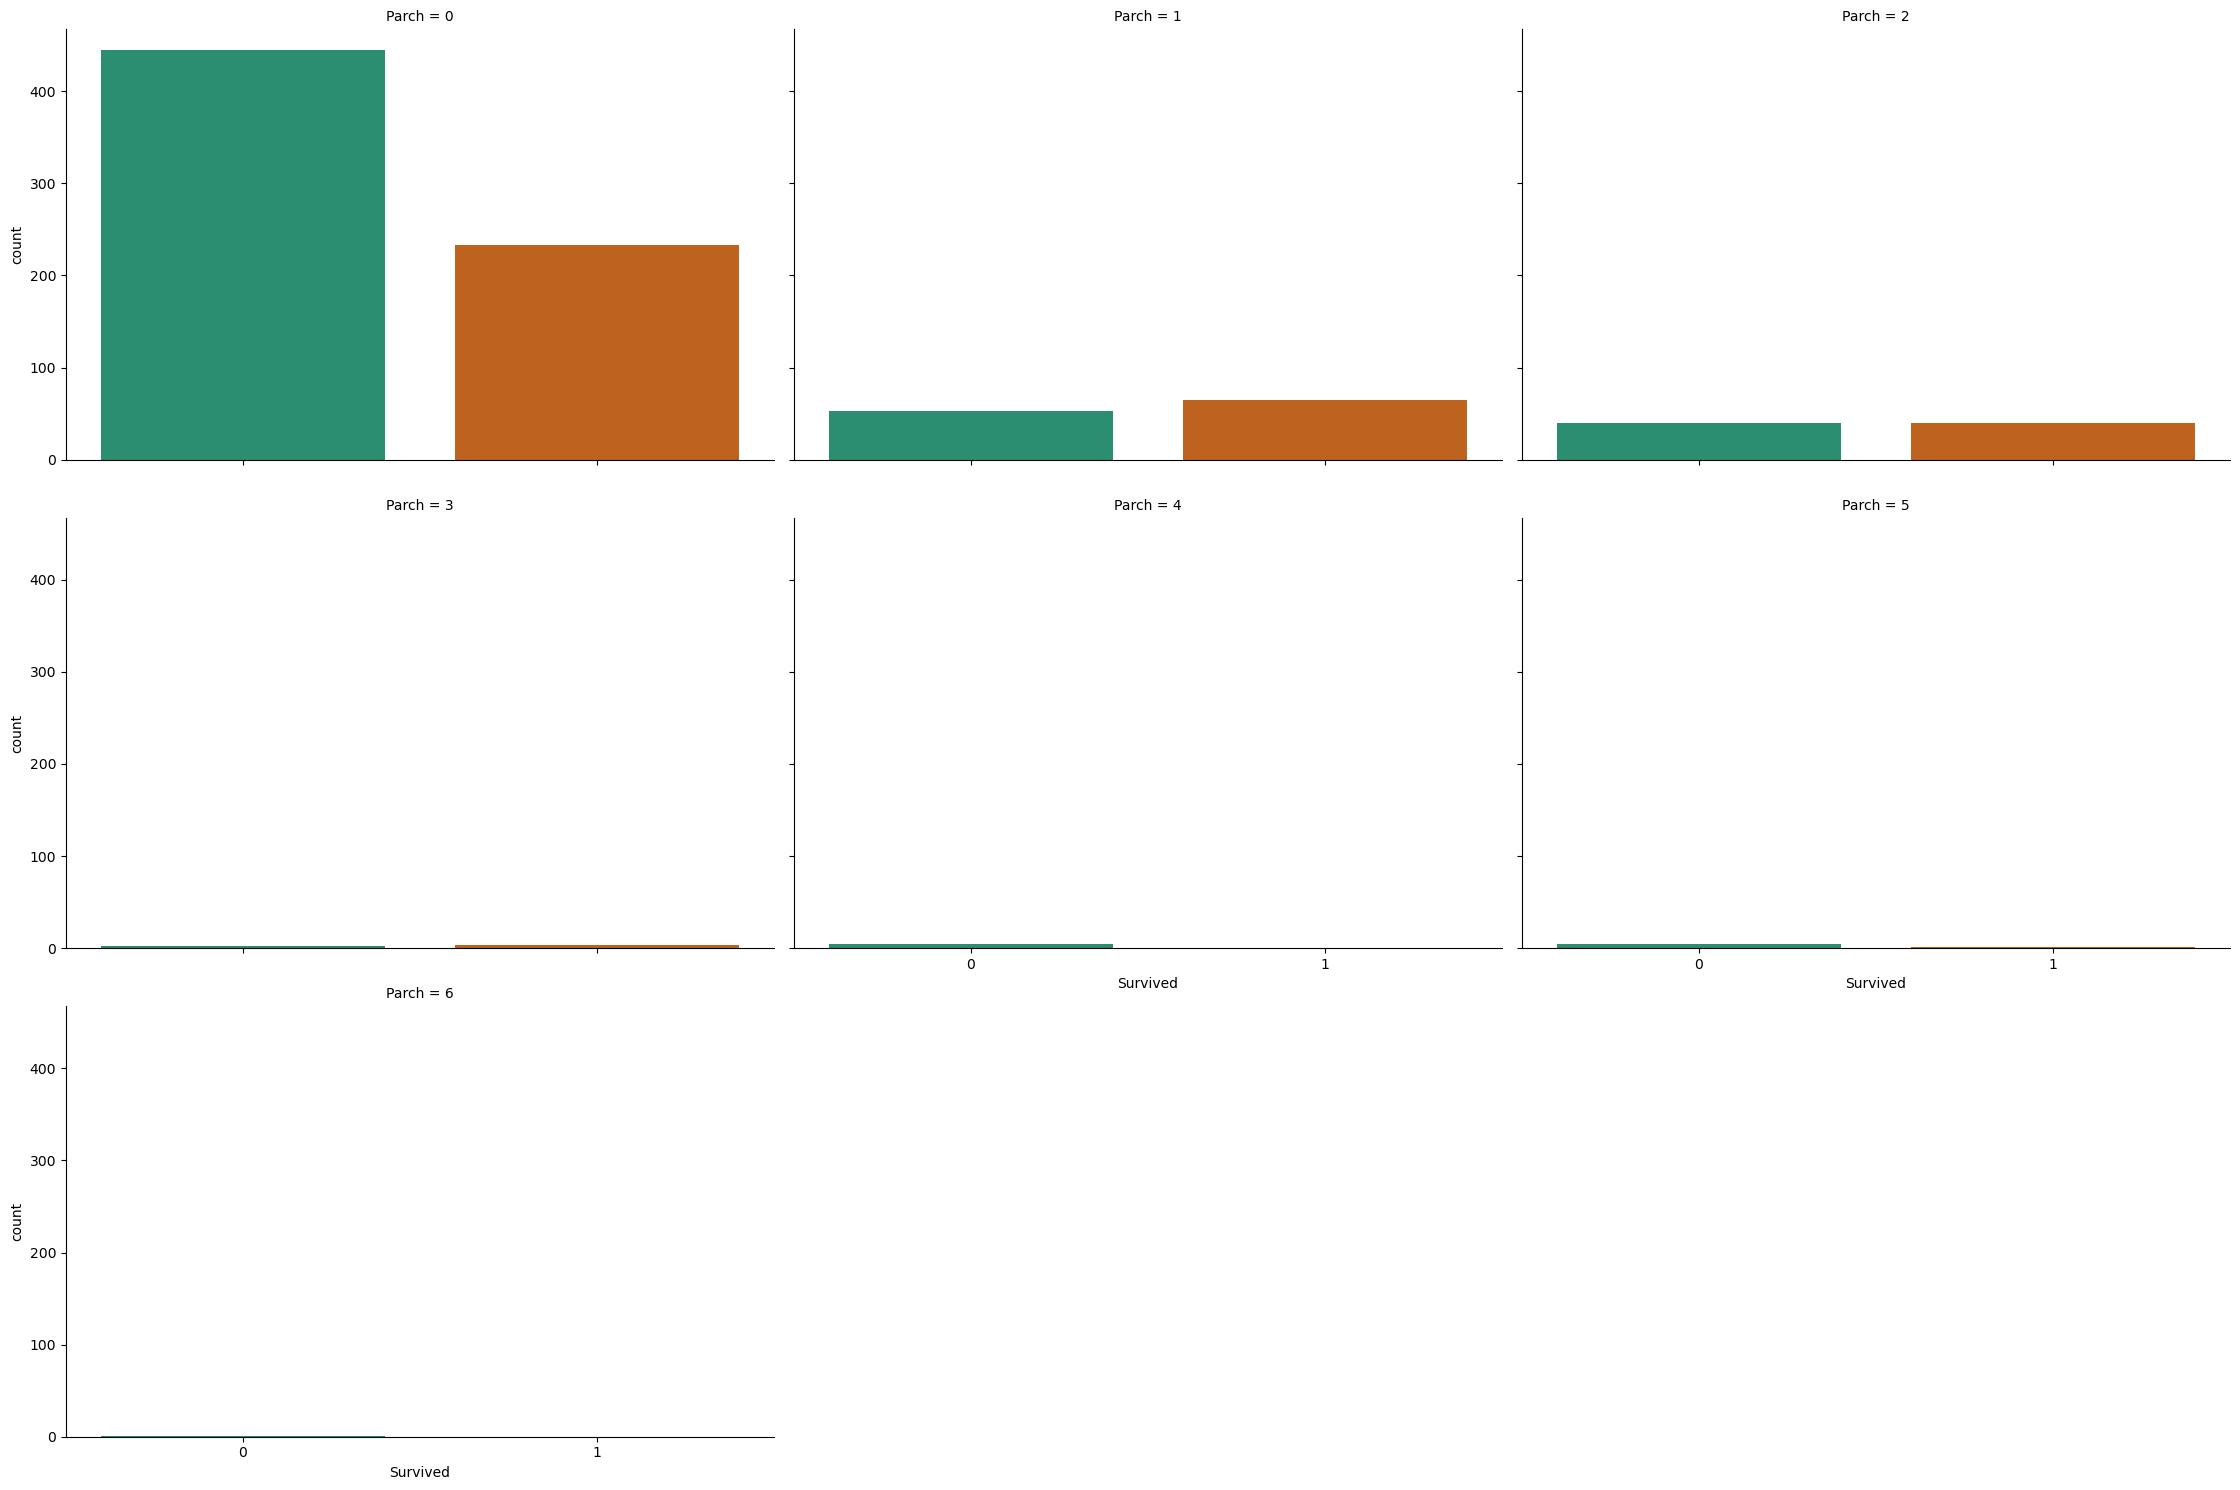

In [5]:
sns.catplot(x='Survived', col='Parch', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the survivors had no parents or children on board

Now let's check the relationship between sibilings and survivors on board. 

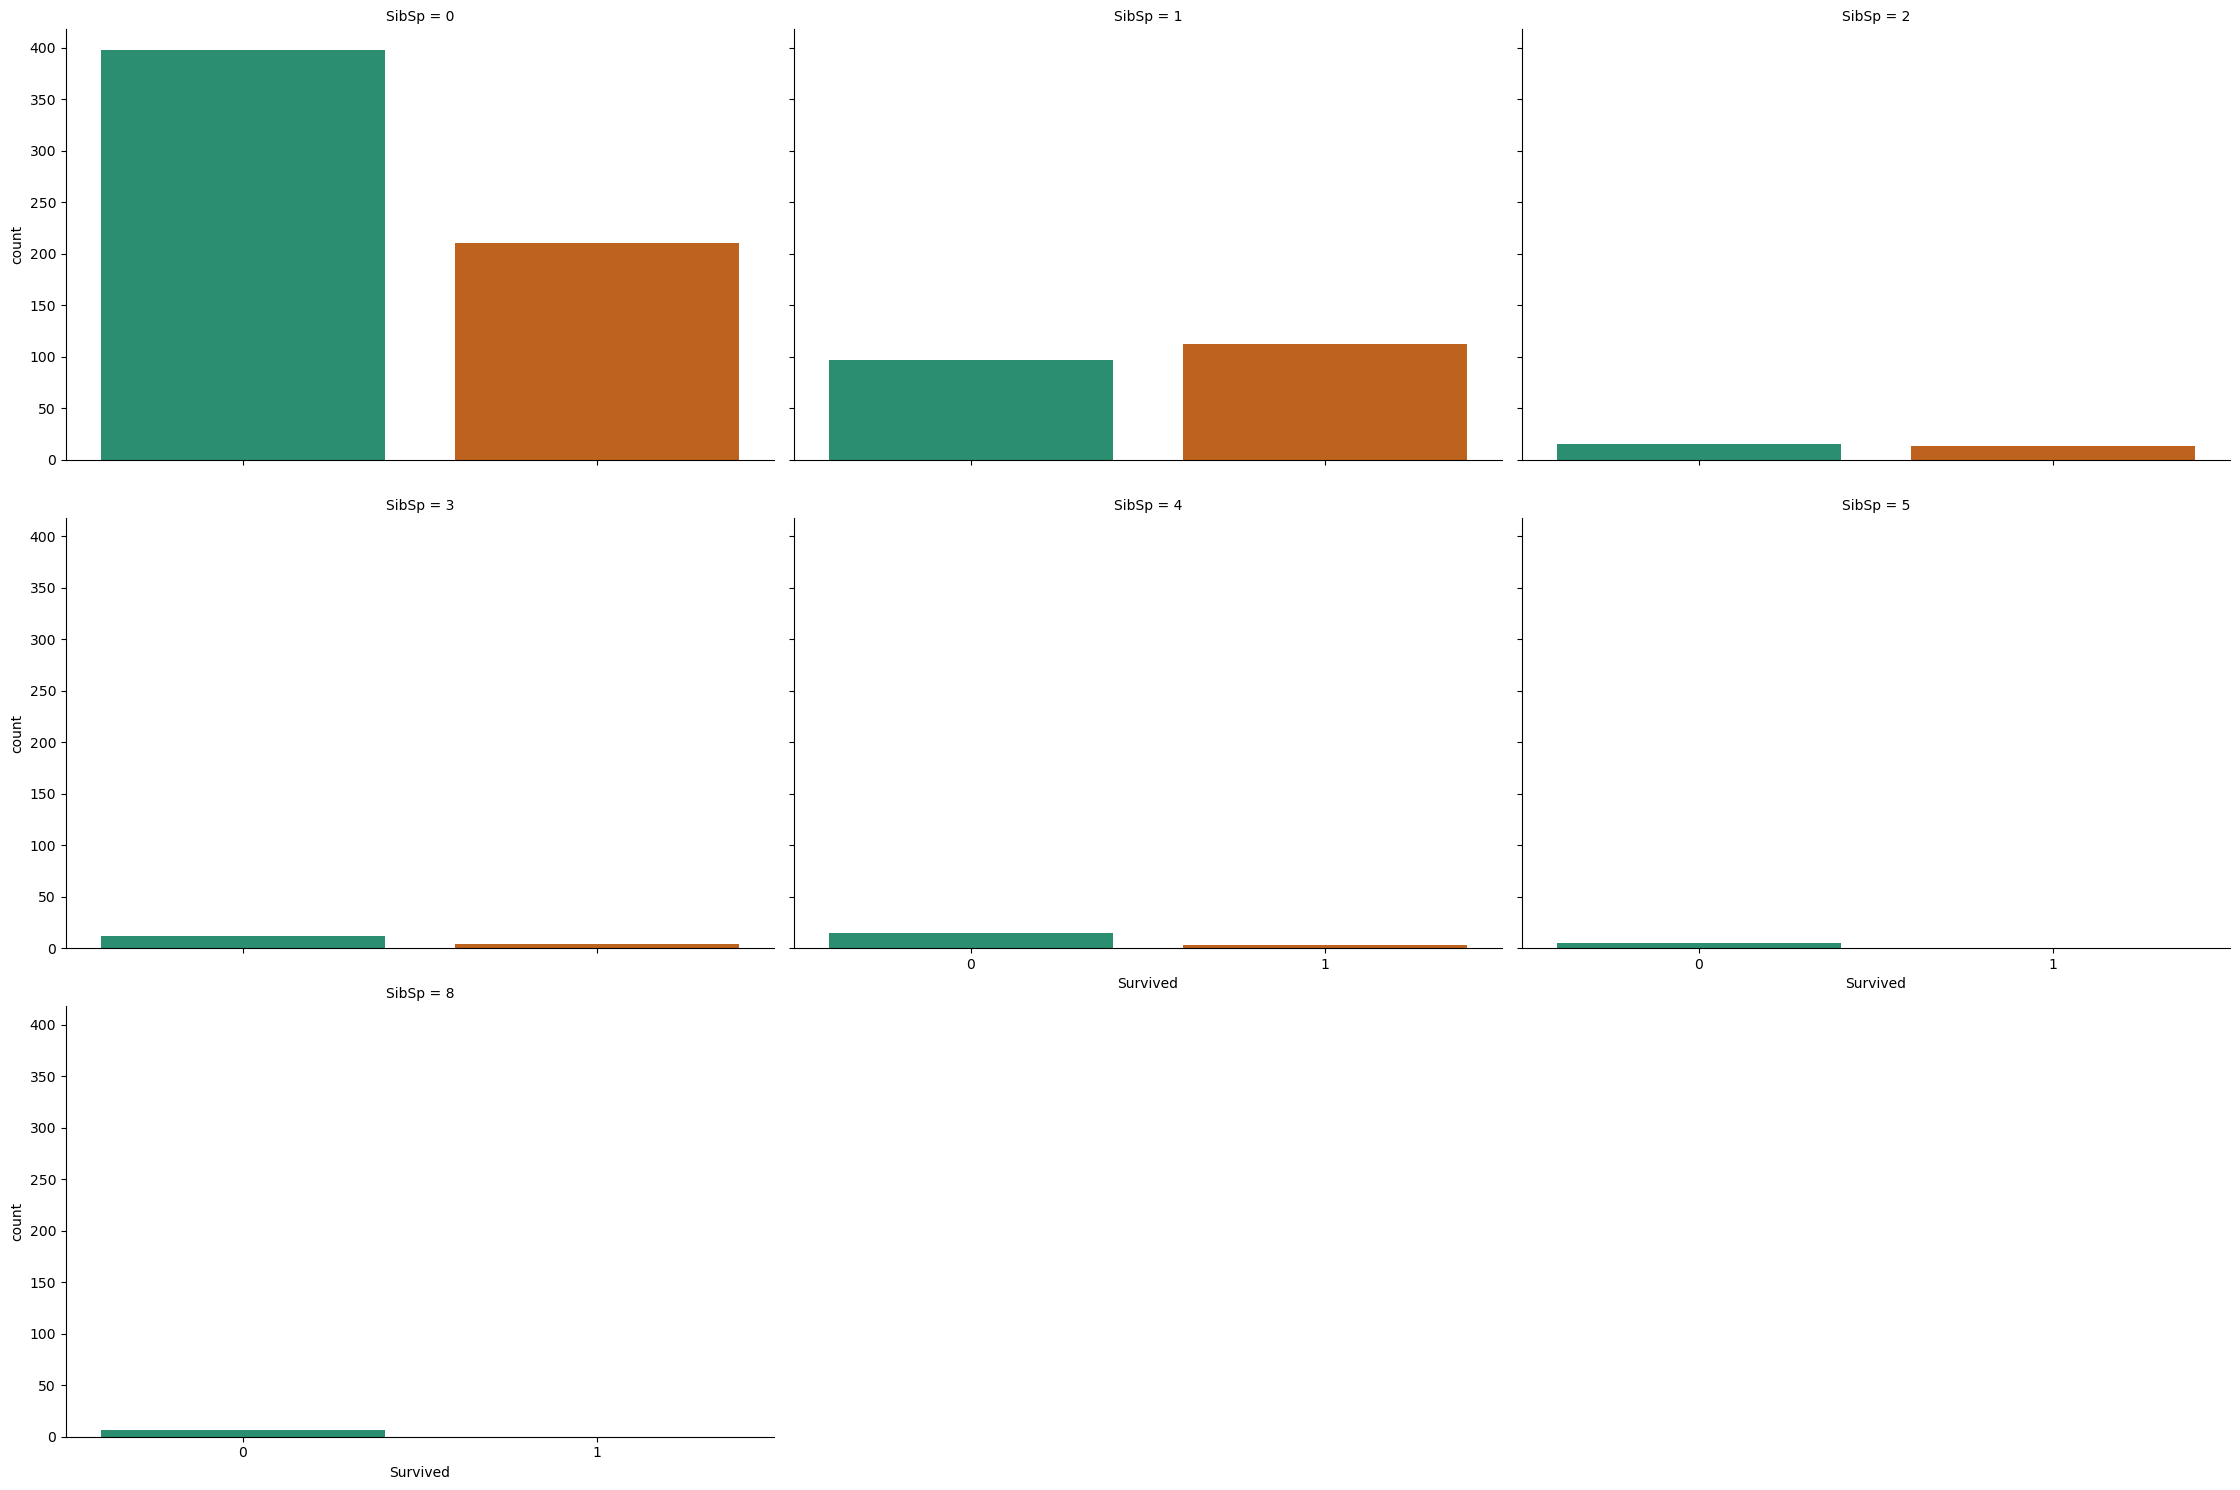

In [6]:
sns.catplot(x='Survived', col='SibSp', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the survivors had no sibilings on-board.

Now let's check between pclass and survivors

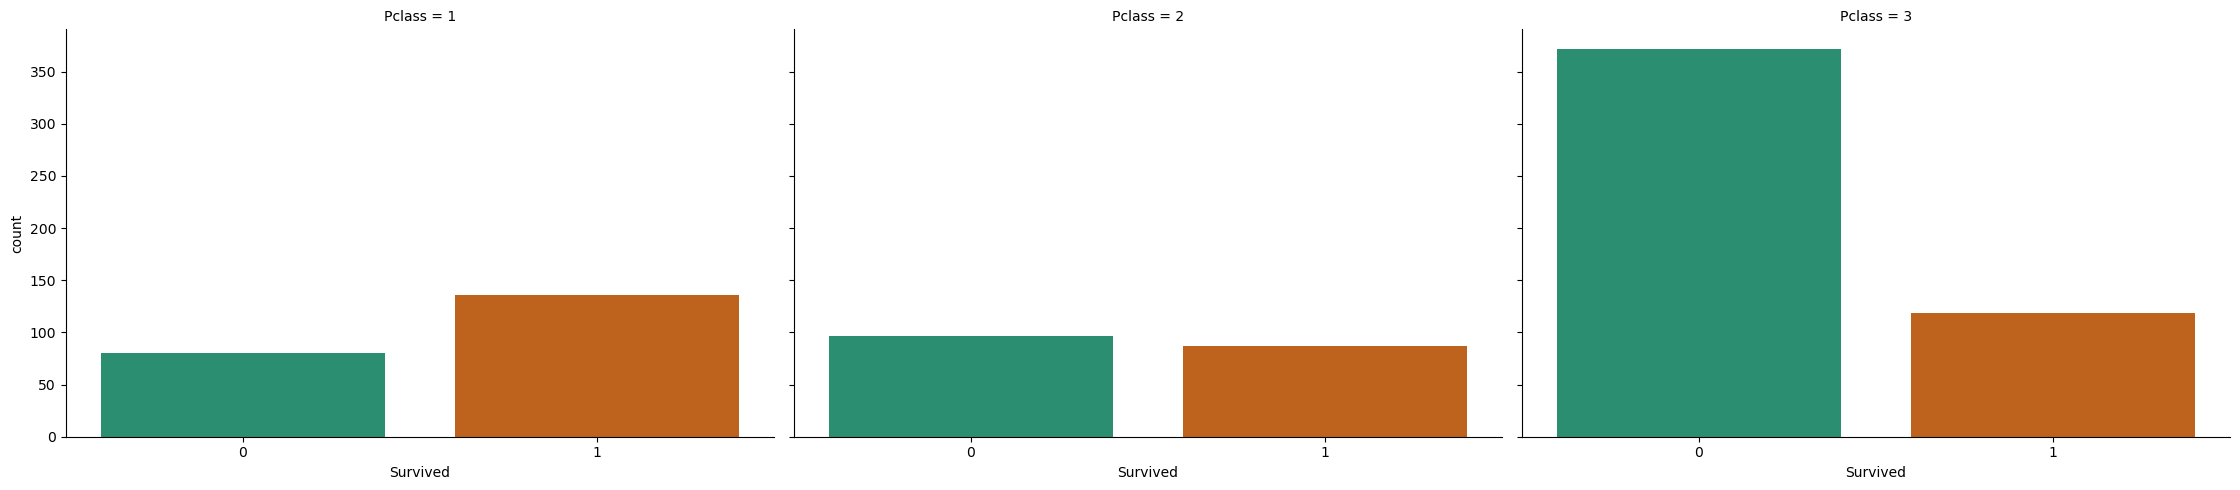

In [7]:
sns.catplot(x='Survived', col='Pclass', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the non-survivors from p_class 3

In [8]:
sns.catplot(x='Survived', col='Fare', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the non-survivors paid between 8-10 british pounds

Now let's check the relationship between sex and the survivors

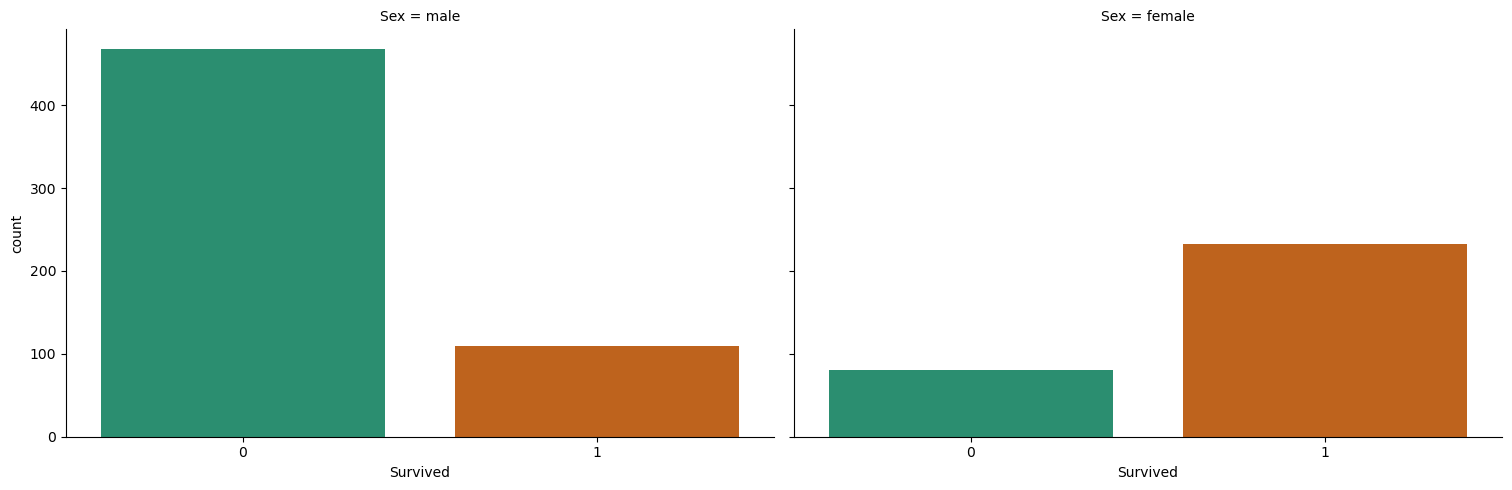

In [9]:
sns.catplot(x='Survived', col='Sex', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the non-surviors were males and most of the survivors were females.

Now let's check the relationship between embarked point and the survivors

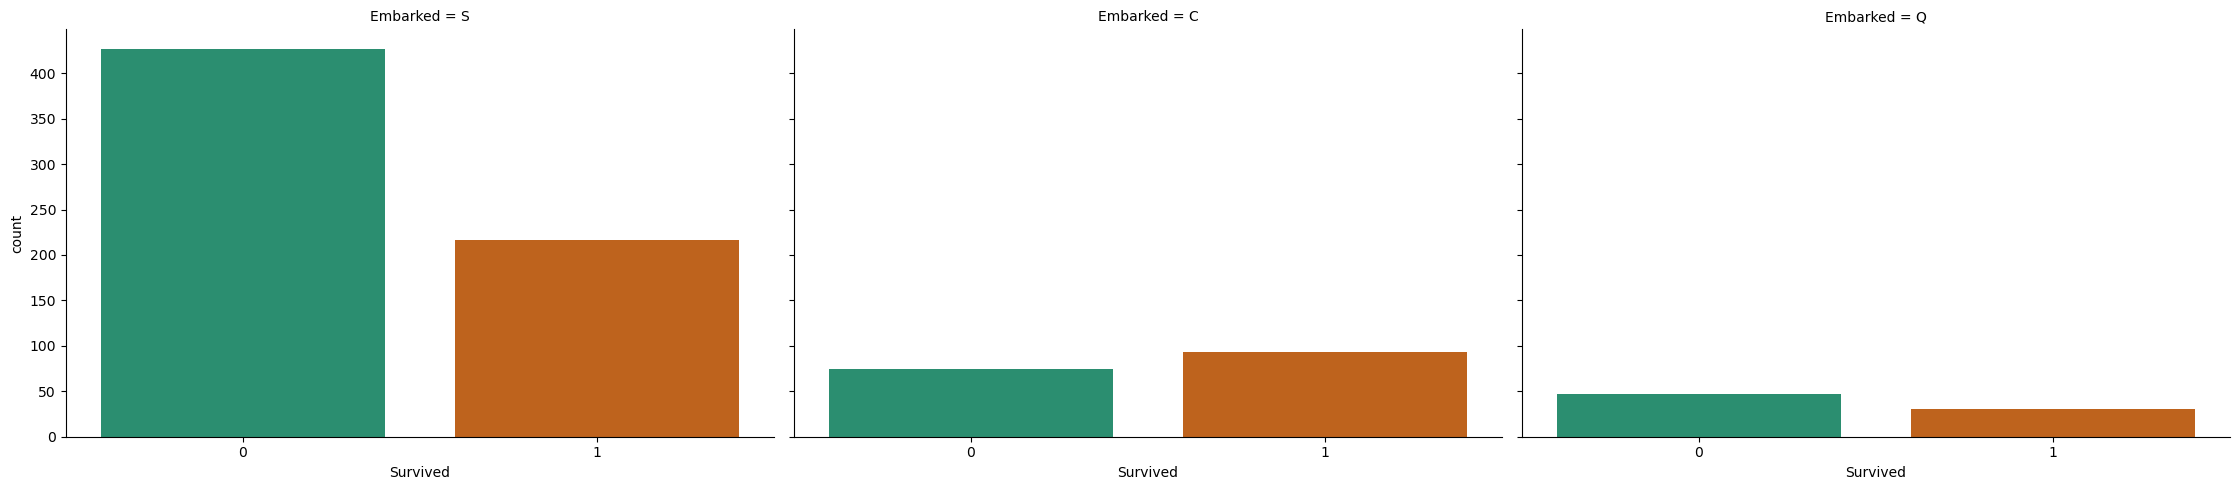

In [10]:
sns.catplot(x='Survived', col='Embarked', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the non-survivors embarked from Southampton and survivors from Cherbourg

Now let's check the relationship between cabins and survivors

In [11]:
sns.catplot(x='Survived', col='Cabin', data=titanic_data, kind="count", palette='Dark2', height=5, aspect=1.5, col_wrap=3)

Most of the survivors are from cabin A34 and non-survivors from Cabin T, Cabin B30

Now let's check for outliers using the boxplot graphs

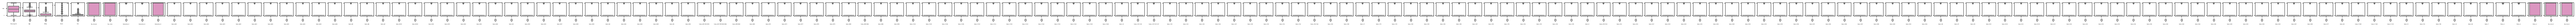

In [27]:
plt.figure(figsize=(135,135),facecolor = "white")
plotnumber=1
for col in titanicsurvivor_col:
    if plotnumber<=165:
        wc=plt.subplot(164,164,plotnumber)
        sns.boxplot(titanic_data_encoded[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 3)
        plt.yticks(rotation = 0, fontsize = 3)
    plotnumber+=1
plt.show()

We can deduce the following from the boxplots-
1) Age, SibSp, Parch, Fare, Embarked_C, Embarked_Q, and almost all of the cabins consists of outliers.
2) IQR of sex_male, sex_female and embarked_s is very high.
3) IQR of all p_class is also very high

Now let's get onto the prediction part of the project. Let's first check the skewness of the columns in the dataset we selected for our predictions

In [12]:
titanic_data_encoded.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.510245
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -0.997083
dtype: float64

Skewness of Embarked_C, Fare, Embarked_Q, SibSp, Fare and Parch is high and needs to be normalised using the cube root method(np.cbrt)

In [13]:
titanic_data_encoded['Embarked_C']=np.cbrt(titanic_data_encoded['Embarked_C'])
titanic_data_encoded['Fare']=np.cbrt(titanic_data_encoded['Fare'])
titanic_data_encoded['Embarked_Q']=np.cbrt(titanic_data_encoded['Embarked_Q'])


In [14]:
titanic_data_encoded['SibSp']=np.cbrt(titanic_data['SibSp'])
titanic_data_encoded['Fare']=np.cbrt(titanic_data['Fare'])
titanic_data_encoded['Parch']=np.cbrt(titanic_data['Parch'])

In [15]:
titanic_data_encoded.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.510245
SibSp         3.695352
Parch         2.749117
Fare          1.230382
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -0.997083
dtype: float64

Now the skewness has been tuned to normal levels

Now let's look at the skewness of survivors using a distribution plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_9148\697647515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data_encoded['Survived_1'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


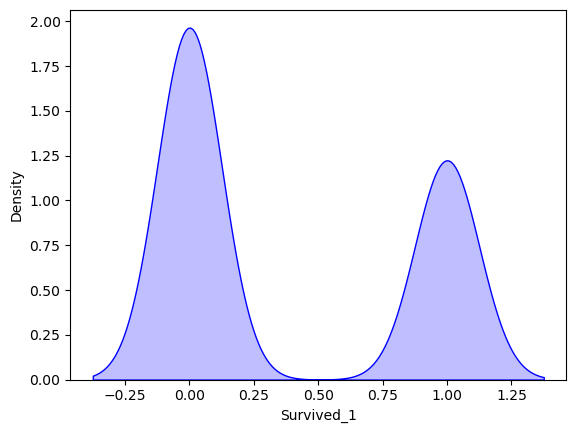

In [32]:
sns.distplot(titanic_data_encoded['Survived'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

We can see that the plot is skewed towards non-survivors which means there are low chances of survivals based on what's here in this plot

Let's use the ordinal encoding to finalise the continous nature of all our independent variables before we proceed to find the outliers using the z-score method.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in titanic_data_encoded.columns:
    if titanic_data_encoded[i].dtypes=='int64':
        titanic_data_encoded[i]=OE.fit_transform(titanic_data_encoded[i].values.reshape(-1,1))
titanic_data_encoded

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         0.0     3.0  22.0    1.0    0.0  1.935438         0.0       1.0   
1         1.0     1.0  38.0    1.0    0.0  4.146318         1.0       0.0   
2         1.0     3.0  26.0    0.0    0.0  1.993730         1.0       0.0   
3         1.0     1.0  35.0    1.0    0.0  3.758647         1.0       0.0   
4         0.0     3.0  35.0    0.0    0.0  2.004158         0.0       1.0   
..        ...     ...   ...    ...    ...       ...         ...       ...   
886       0.0     2.0  27.0    0.0    0.0  2.351335         0.0       1.0   
887       1.0     1.0  19.0    0.0    0.0  3.107233         1.0       0.0   
888       0.0     3.0  28.0    1.0    2.0  2.862294         1.0       0.0   
889       1.0     1.0  26.0    0.0    0.0  3.107233         0.0       1.0   
890       0.0     3.0  32.0    0.0    0.0  1.978946         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
0           0.0         0.0         1.0  
1           1.0         0.0         0.0  
2           0.0         0.0         1.0  
3           0.0         0.0         1.0  
4           0.0         0.0         1.0  
..          ...         ...         ...  
886         0.0         0.0         1.0  
887         0.0         0.0         1.0  
888         0.0         0.0         1.0  
889         1.0         0.0         0.0  
890         0.0         1.0         0.0  

[891 rows x 11 columns]

In [31]:
titanic_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


We can see that all the columns have been converted to float64 values and can be further confirmed by the below table

In [32]:
titanic_data_encoded.head(30)

Survived  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0        0.0     1.0  22.0    1.0    1.0  1.935438         0.0       1.0   
1        1.0     0.0  38.0    0.0    0.0  4.146318         1.0       0.0   
2        1.0     1.0  26.0    1.0    1.0  1.993730         1.0       0.0   
3        1.0     1.0  35.0    1.0    1.0  3.758647         1.0       0.0   
4        0.0     1.0  35.0    1.0    1.0  2.004158         0.0       1.0   
5        0.0     0.0  28.0    0.0    0.0  2.037485         0.0       1.0   
6        0.0     1.0  54.0    1.0    1.0  3.729218         0.0       1.0   
7        0.0     1.0   2.0    1.0    1.0  2.762205         0.0       1.0   
8        1.0     1.0  27.0    1.0    1.0  2.232928         1.0       0.0   
9        1.0     0.0  14.0    0.0    0.0  3.109675         1.0       0.0   
10       1.0     1.0   4.0    1.0    1.0  2.556067         1.0       0.0   
11       1.0     1.0  58.0    1.0    1.0  2.983240         1.0       0.0   
12       0.0     1.0  20.0    1.0    1.0  2.004158         0.0       1.0   
13       0.0     1.0  39.0    1.0    1.0  3.150642         0.0       1.0   
14       0.0     1.0  14.0    1.0    1.0  1.987775         1.0       0.0   
15       1.0     1.0  55.0    1.0    1.0  2.519842         1.0       0.0   
16       0.0     0.0   2.0    0.0    0.0  3.076725         0.0       1.0   
17       1.0     1.0  28.0    1.0    1.0  2.351335         0.0       1.0   
18       0.0     1.0  31.0    1.0    1.0  2.620741         1.0       0.0   
19       1.0     0.0  28.0    0.0    0.0  1.933211         1.0       0.0   
20       0.0     1.0  35.0    1.0    1.0  2.962496         0.0       1.0   
21       1.0     1.0  34.0    1.0    1.0  2.351335         0.0       1.0   
22       1.0     0.0  15.0    0.0    0.0  2.002430         1.0       0.0   
23       1.0     1.0  28.0    1.0    1.0  3.286569         0.0       1.0   
24       0.0     1.0   8.0    1.0    1.0  2.762205         1.0       0.0   
25       1.0     1.0  38.0    1.0    1.0  3.154416         1.0       0.0   
26       0.0     0.0  28.0    0.0    0.0  1.933211         0.0       1.0   
27       0.0     1.0  19.0    1.0    1.0  6.406959         0.0       1.0   
28       1.0     0.0  28.0    0.0    0.0  1.989882         1.0       0.0   
29       0.0     1.0  28.0    1.0    1.0  1.991279         0.0       1.0   

    Embarked_C  Embarked_Q  Embarked_S  
0          0.0         0.0         1.0  
1          1.0         0.0         0.0  
2          0.0         0.0         1.0  
3          0.0         0.0         1.0  
4          0.0         0.0         1.0  
5          0.0         1.0         0.0  
6          0.0         0.0         1.0  
7          0.0         0.0         1.0  
8          0.0         0.0         1.0  
9          1.0         0.0         0.0  
10         0.0         0.0         1.0  
11         0.0         0.0         1.0  
12         0.0         0.0         1.0  
13         0.0         0.0         1.0  
14         0.0         0.0         1.0  
15         0.0         0.0         1.0  
16         0.0         1.0         0.0  
17         0.0         0.0         1.0  
18         0.0         0.0         1.0  
19         1.0         0.0         0.0  
20         0.0         0.0         1.0  
21         0.0         0.0         1.0  
22         0.0         1.0         0.0  
23         0.0         0.0         1.0  
24         0.0         0.0         1.0  
25         0.0         0.0         1.0  
26         1.0         0.0         0.0  
27         0.0         0.0         1.0  
28         0.0         1.0         0.0  
29         0.0         0.0         1.0

Now let's check for correlation between different variables in the dataset we selected for predictions using the .corr method. We will be using heatmaps to get a better outlook between the variables.

In [33]:
correlation_encoded = titanic_data_encoded.corr()
correlation_encoded

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.155660 -0.064910 -0.155660 -0.155660  0.322398   
Pclass     -0.155660  1.000000 -0.014665  1.000000  1.000000 -0.154692   
Age        -0.064910 -0.014665  1.000000 -0.014665 -0.014665  0.112980   
SibSp      -0.155660  1.000000 -0.014665  1.000000  1.000000 -0.154692   
Parch      -0.155660  1.000000 -0.014665  1.000000  1.000000 -0.154692   
Fare        0.322398 -0.154692  0.112980 -0.154692 -0.154692  1.000000   
Sex_female  0.543351 -0.125722 -0.081163 -0.125722 -0.125722  0.251434   
Sex_male   -0.543351  0.125722  0.081163  0.125722  0.125722 -0.251434   
Embarked_C  0.168240 -0.778359  0.030248 -0.778359 -0.778359  0.277646   
Embarked_Q  0.003650 -0.496624 -0.031415 -0.496624 -0.496624 -0.151572   
Embarked_S -0.155660  1.000000 -0.014665  1.000000  1.000000 -0.154692   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.168240    0.003650   -0.155660  
Pclass       -0.125722  0.125722   -0.778359   -0.496624    1.000000  
Age          -0.081163  0.081163    0.030248   -0.031415   -0.014665  
SibSp        -0.125722  0.125722   -0.778359   -0.496624    1.000000  
Parch        -0.125722  0.125722   -0.778359   -0.496624    1.000000  
Fare          0.251434 -0.251434    0.277646   -0.151572   -0.154692  
Sex_female    1.000000 -1.000000    0.082853    0.074115   -0.125722  
Sex_male     -1.000000  1.000000   -0.082853   -0.074115    0.125722  
Embarked_C    0.082853 -0.082853    1.000000   -0.148258   -0.778359  
Embarked_Q    0.074115 -0.074115   -0.148258    1.000000   -0.496624  
Embarked_S   -0.125722  0.125722   -0.778359   -0.496624    1.000000

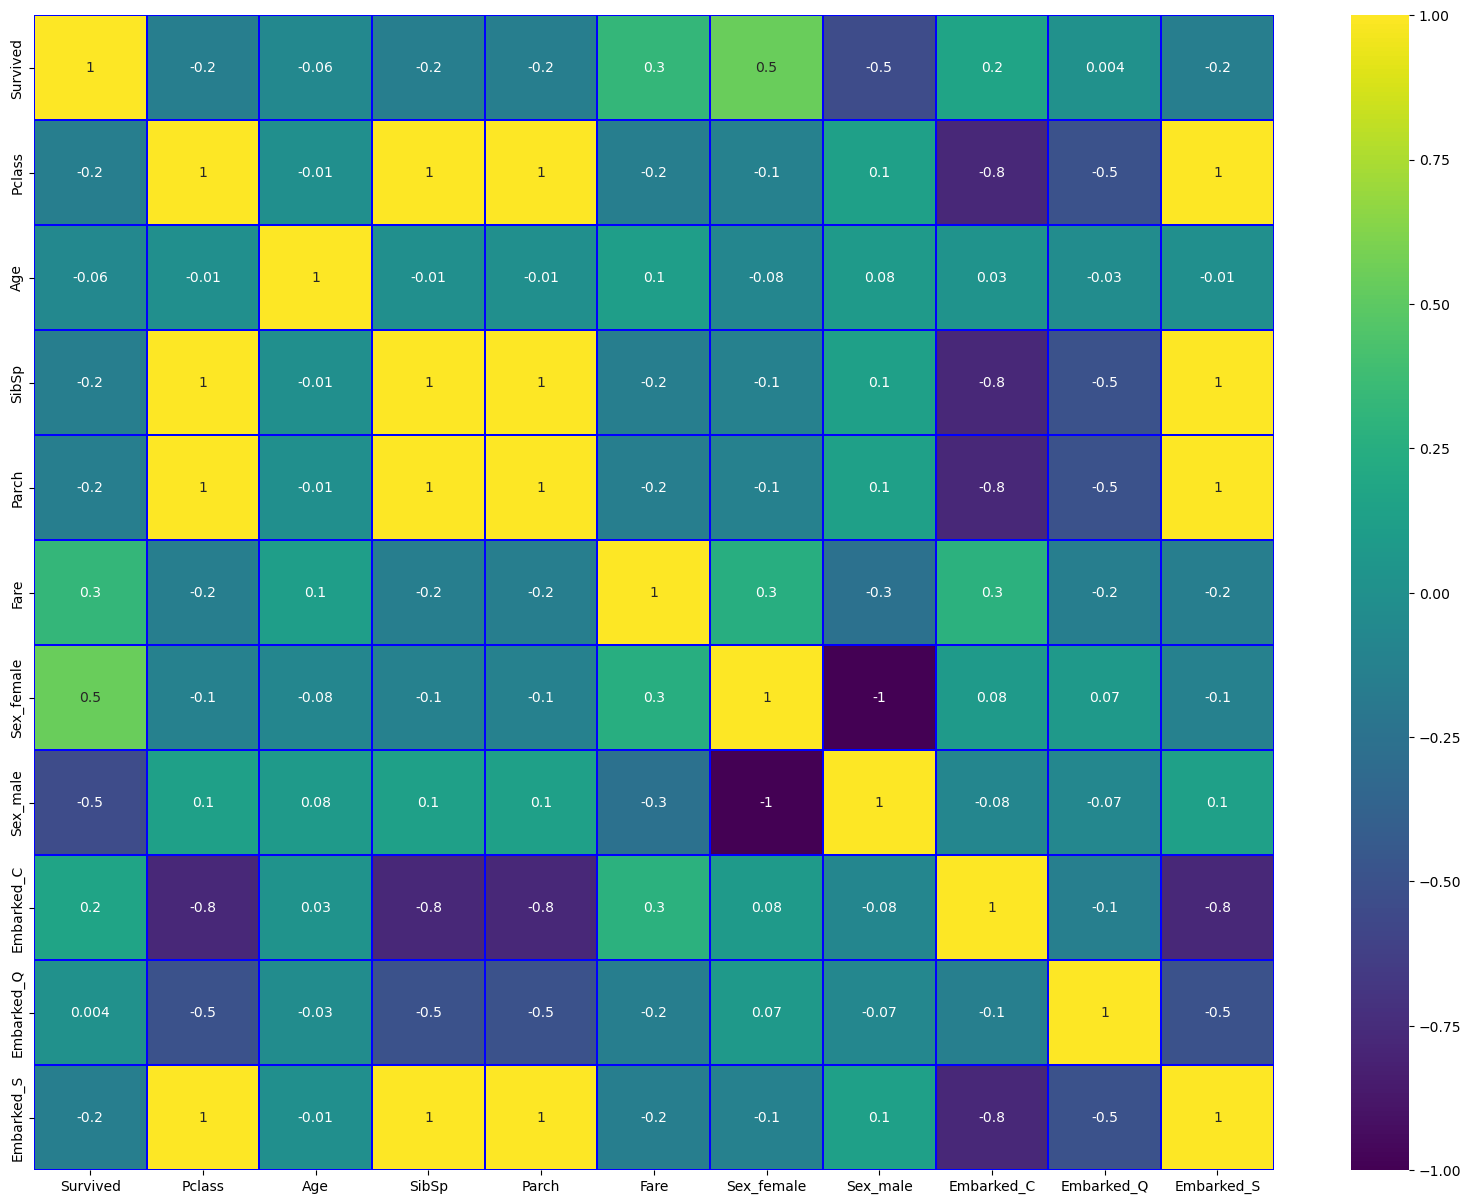

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(titanic_data_encoded.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

Below are the findings from the correlation table above-
1) SibSp, Parch, Pclass, AND eMBARKED_S have perfect positive correlation with emarked_s column whereas negative correlation with embarked_c and emabrked_q
2) Sex-male has negative correlation with the survived column and sex_female has positive corrlelation with survived column
3) Embarked S has negative correlation with survived column
4) Sex_male and Sex_female has positive correlation with the fare column
5) Fare has positive correlation with sex_female and embarked_c. it has negative correlation with embarked_s and emarked_q
6) Fare has positive correlation with the survived column and negative correlation with sibsp and parch column
7) P_class has negative correlation with embarked_c and embarked_q
8) p_class has negative correlation with the survived column
9) age has positive correlation with fare
10) SibSp and parch has negative correlation with embarked_c and emarked_q
11) parch and sibsp has perfect positive correlation with pclass

below is the heatmap of correlation between variables in the original dataset

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_1664\1414522918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")


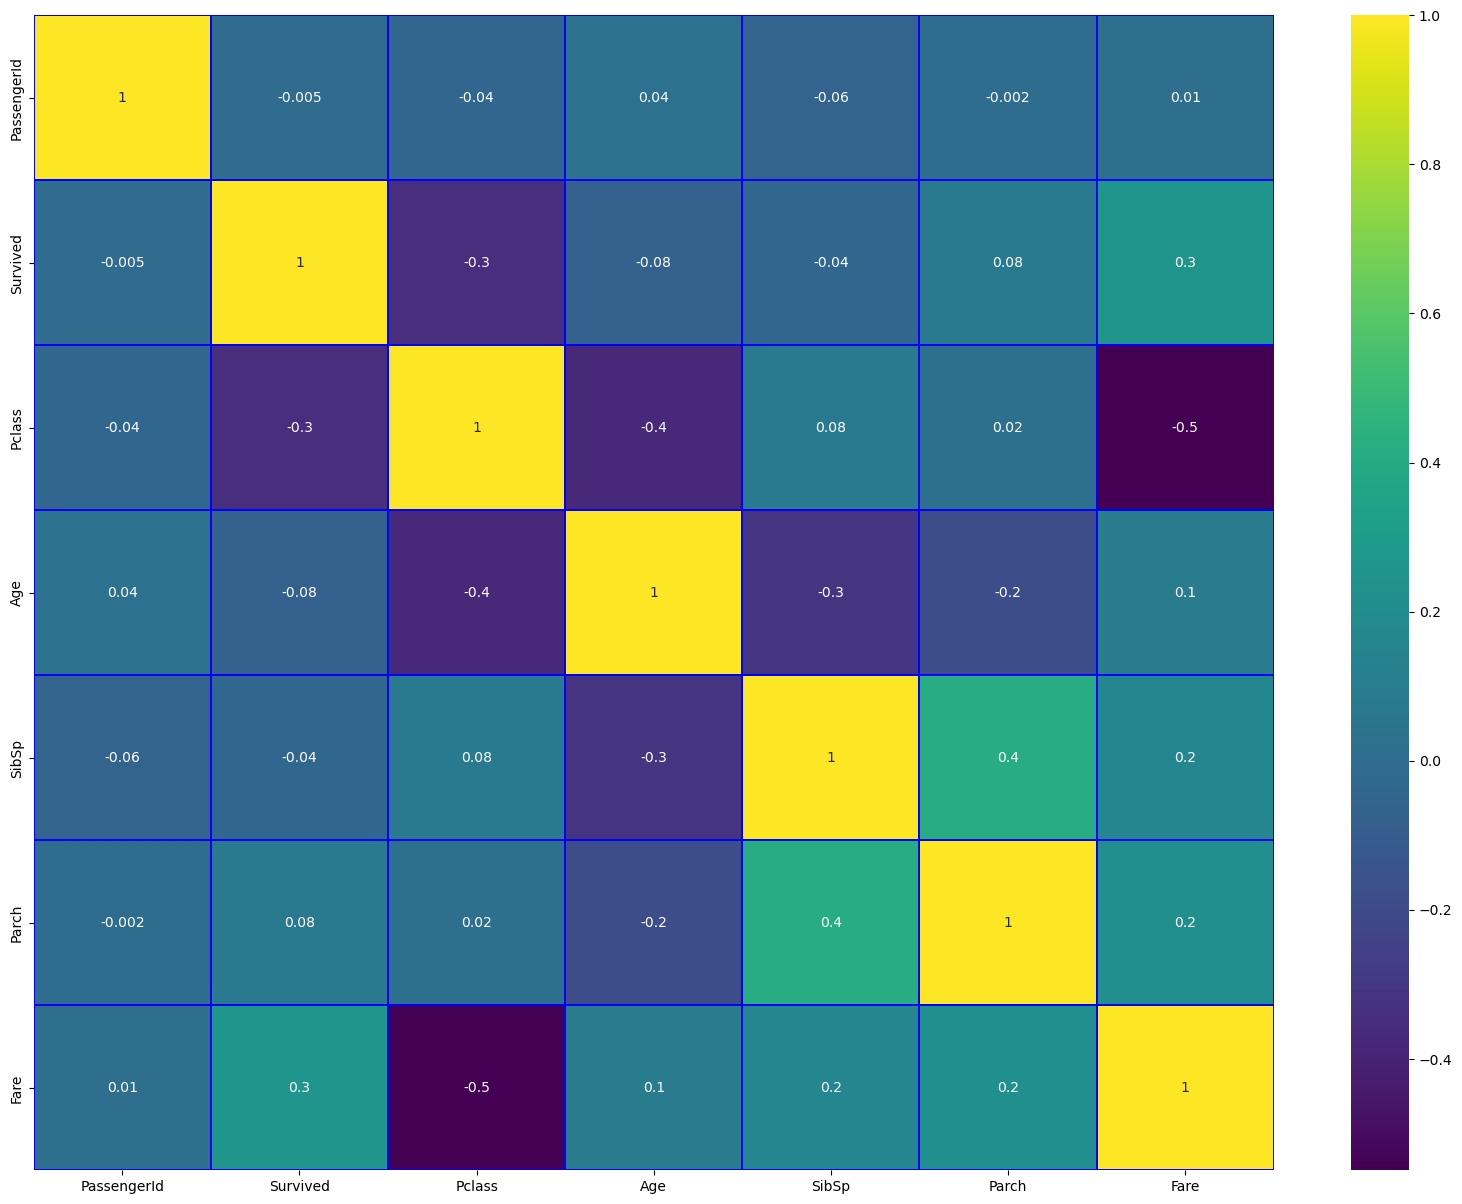

In [20]:
plt.figure(figsize = (20,15))
sns.heatmap(titanic_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

Now lets sort the correlation values based on our dependent variable survived and check for multicolinearity

In [35]:
correlation_encoded['Survived'].sort_values(ascending = False)

Survived      1.000000
Sex_female    0.543351
Fare          0.322398
Embarked_C    0.168240
Embarked_Q    0.003650
Age          -0.064910
Pclass       -0.155660
SibSp        -0.155660
Parch        -0.155660
Embarked_S   -0.155660
Sex_male     -0.543351
Name: Survived, dtype: float64

The above table is enough for us to move forward with the z-score method and variance inflation values, but you can take a look at correlation scores of our DATASET THAT WE USED FOR eda and visulation just for the information.

Now let's remove column with very low correlation and high curse of dimensionality which is the embarked _q and age columns

In [17]:
columns_with_low_corelation_and_high_curse_of_dimensionality = ['Embarked_Q','Age']
titanic_data_encoded = titanic_data_encoded.drop(columns=columns_with_low_corelation_and_high_curse_of_dimensionality)

Now let's check at our new dataset after eliminating the unrequired columns

In [18]:
titanic_data_encoded

Survived  Pclass  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         0.0     3.0    1.0    0.0  1.935438         0.0       1.0   
1         1.0     1.0    1.0    0.0  4.146318         1.0       0.0   
2         1.0     3.0    0.0    0.0  1.993730         1.0       0.0   
3         1.0     1.0    1.0    0.0  3.758647         1.0       0.0   
4         0.0     3.0    0.0    0.0  2.004158         0.0       1.0   
..        ...     ...    ...    ...       ...         ...       ...   
886       0.0     2.0    0.0    0.0  2.351335         0.0       1.0   
887       1.0     1.0    0.0    0.0  3.107233         1.0       0.0   
888       0.0     3.0    1.0    2.0  2.862294         1.0       0.0   
889       1.0     1.0    0.0    0.0  3.107233         0.0       1.0   
890       0.0     3.0    0.0    0.0  1.978946         0.0       1.0   

     Embarked_C  Embarked_S  
0           0.0         1.0  
1           1.0         0.0  
2           0.0         1.0  
3           0.0         1.0  
4           0.0         1.0  
..          ...         ...  
886         0.0         1.0  
887         0.0         1.0  
888         0.0         1.0  
889         1.0         0.0  
890         0.0         0.0  

[891 rows x 9 columns]

In [ ]:
Its time to do the scaling using the standatrd scaler for us to check the variance inflation scores

vif values are high for sex_male, and sex_female columns as default. Let's remove one of the columns to readjust the variance inflation scores

In [19]:
columns_with_low_corelation_and_high_VIF2 = ['Sex_male']
titanic_data_encoded = titanic_data_encoded.drop(columns=columns_with_low_corelation_and_high_VIF2)

In [20]:
x = titanic_data_encoded.drop("Survived", axis=1)
y = titanic_data_encoded["Survived"]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Pclass     SibSp     Parch      Fare  Sex_female  Embarked_C  \
0    0.827377  0.432793 -0.473674 -0.774708   -0.737695   -0.482043   
1   -1.566107  0.432793 -0.473674  1.287903    1.355574    2.074505   
2    0.827377 -0.474545 -0.473674 -0.720325    1.355574   -0.482043   
3   -1.566107  0.432793 -0.473674  0.926230    1.355574   -0.482043   
4    0.827377 -0.474545 -0.473674 -0.710596   -0.737695   -0.482043   
..        ...       ...       ...       ...         ...         ...   
886 -0.369365 -0.474545 -0.473674 -0.386703   -0.737695   -0.482043   
887 -1.566107 -0.474545 -0.473674  0.318502    1.355574   -0.482043   
888  0.827377  0.432793  2.008933  0.089990    1.355574   -0.482043   
889 -1.566107 -0.474545 -0.473674  0.318502   -0.737695    2.074505   
890  0.827377 -0.474545 -0.473674 -0.734118   -0.737695   -0.482043   

     Embarked_S  
0      0.619306  
1     -1.614710  
2      0.619306  
3      0.619306  
4      0.619306  
..          ...  
886    0.619306  
887    0.619306  
888    0.619306  
889   -1.614710  
890   -1.614710  

[891 rows x 7 columns]

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values    Features
0    2.193065      Pclass
1    1.385634       SibSp
2    1.386267       Parch
3    2.556900        Fare
4    1.128987  Sex_female
5    2.818519  Embarked_C
6    2.709105  Embarked_S

Now the vif values are corrected, we can move forward by data regularisation and balancing using the smote analysis. Let's check the survived column counts.

In [43]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

Now that it has been balanced let's check the new value counts

In [45]:
y1.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

Now let's use the z-score method on the selected features in order to remove the outliers present in the dataset

In [23]:
from scipy.stats import zscore
out_features=titanic_data_encoded[['Pclass','SibSp','Parch','Fare','Sex_female','Embarked_C','Embarked_S']]
z=np.abs(zscore(out_features))
z

Pclass     SibSp     Parch      Fare  Sex_female  Embarked_C  \
0    0.827377  0.432793  0.473674  0.774708    0.737695    0.482043   
1    1.566107  0.432793  0.473674  1.287903    1.355574    2.074505   
2    0.827377  0.474545  0.473674  0.720325    1.355574    0.482043   
3    1.566107  0.432793  0.473674  0.926230    1.355574    0.482043   
4    0.827377  0.474545  0.473674  0.710596    0.737695    0.482043   
..        ...       ...       ...       ...         ...         ...   
886  0.369365  0.474545  0.473674  0.386703    0.737695    0.482043   
887  1.566107  0.474545  0.473674  0.318502    1.355574    0.482043   
888  0.827377  0.432793  2.008933  0.089990    1.355574    0.482043   
889  1.566107  0.474545  0.473674  0.318502    0.737695    2.074505   
890  0.827377  0.474545  0.473674  0.734118    0.737695    0.482043   

     Embarked_S  
0      0.619306  
1      1.614710  
2      0.619306  
3      0.619306  
4      0.619306  
..          ...  
886    0.619306  
887    0.619306  
888    0.619306  
889    1.614710  
890    1.614710  

[891 rows x 7 columns]

Now let's check for the z-scores that have unusual values above 3.

In [24]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
        164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
        324, 341, 360, 380, 386, 437, 438, 438, 480, 527, 541, 542, 557,
        567, 610, 638, 678, 679, 683, 686, 700, 716, 736, 737, 742, 774,
        787, 792, 813, 824, 846, 850, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
        1, 1, 3, 3, 1, 3, 2, 3, 1, 2, 2, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 3,
        1, 1, 3, 3, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2], dtype=int64))

Now let's remove these outliers and check the new shape of our dataset.

In [25]:
titanic_data_encoded_new=titanic_data_encoded[(z<3).all(axis=1)]
titanic_data_encoded_new.shape

(831, 8)

In [ ]:
Now let's check the data loss that occured while we removed the outliers.

In [26]:
data_loss_percentage = ((titanic_data_encoded.shape[0] - titanic_data_encoded_new.shape[0]) / titanic_data_encoded.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 6.7340067340067336


The data loss is not too high. Now let's again balance the dataset before we check for the best accuracy score for the maximum random state for predefined values.

In [27]:
x = titanic_data_encoded_new.drop("Survived", axis=1)
y = titanic_data_encoded_new["Survived"]

In [28]:
y.value_counts()

0.0    507
1.0    324
Name: Survived, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [30]:
y1.value_counts()

0.0    507
1.0    507
Name: Survived, dtype: int64

Now let's use the balanced dataset to find the best accuracy score at the max random state

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=i)
      RFC = RandomForestClassifier()
      RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best accuracy score",maxaccuracy,"at the following random state",maxrandomstate)

the best accuracy score 0.8032786885245902 at the following random state 199


Now let's train the model for identifying the best classifier among the classifiers= RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, Support vector classifier and logistic regression. 

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=maxrandomstate)

Let's import the packages and libraries for performing the multiple models and selecting the best one for hyper tuning

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [36]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8
[[119  26]
 [ 35 125]]
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       145
         1.0       0.83      0.78      0.80       160

    accuracy                           0.80       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.80      0.80      0.80       305



In [37]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
predLogReg=LogReg.predict(x_test)
print(accuracy_score(y_test, predLogReg))
print(confusion_matrix(y_test,predLogReg))
print(classification_report(y_test,predLogReg))

0.7704918032786885
[[118  27]
 [ 43 117]]
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77       145
         1.0       0.81      0.73      0.77       160

    accuracy                           0.77       305
   macro avg       0.77      0.77      0.77       305
weighted avg       0.77      0.77      0.77       305



In [38]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(x_train,y_train)
predGradBoos=GradBoos.predict(x_test)
print(accuracy_score(y_test, predGradBoos))
print(confusion_matrix(y_test,predGradBoos))
print(classification_report(y_test,predGradBoos))

0.819672131147541
[[123  22]
 [ 33 127]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       145
         1.0       0.85      0.79      0.82       160

    accuracy                           0.82       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.82      0.82      0.82       305



In [39]:
BagClass = BaggingClassifier()
BagClass.fit(x_train,y_train)
predBagClass=BagClass.predict(x_test)
print(accuracy_score(y_test, predBagClass))
print(confusion_matrix(y_test,predBagClass))
print(classification_report(y_test,predBagClass))

0.8327868852459016
[[123  22]
 [ 29 131]]
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       145
         1.0       0.86      0.82      0.84       160

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305



In [40]:
Extrees = ExtraTreesClassifier()
Extrees.fit(x_train,y_train)
predExtrees=Extrees.predict(x_test)
print(accuracy_score(y_test, predExtrees))
print(confusion_matrix(y_test,predExtrees))
print(classification_report(y_test,predExtrees))

0.8065573770491803
[[121  24]
 [ 35 125]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       145
         1.0       0.84      0.78      0.81       160

    accuracy                           0.81       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.81      0.81      0.81       305



In [41]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.7868852459016393
[[129  16]
 [ 49 111]]
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       145
         1.0       0.87      0.69      0.77       160

    accuracy                           0.79       305
   macro avg       0.80      0.79      0.79       305
weighted avg       0.80      0.79      0.79       305



In [42]:
AdaBoos = AdaBoostClassifier()
AdaBoos.fit(x_train,y_train)
Adapred=AdaBoos.predict(x_test)
print(accuracy_score(y_test, Adapred))
print(confusion_matrix(y_test,Adapred))
print(classification_report(y_test,Adapred))

0.8163934426229508
[[121  24]
 [ 32 128]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       145
         1.0       0.84      0.80      0.82       160

    accuracy                           0.82       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.82      0.82      0.82       305



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
LogRegmodel = LogisticRegression()
LogRegmodel.fit(x_train, y_train)
true_values = y_test
predicted_values = LogRegmodel.predict(x_test)

In [44]:
predicted_values

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1.

In [45]:
from sklearn.metrics import r2_score
predicted_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0]
true_values = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
r2 = r2_score(true_values, predicted_values)
print("R2 Score:", r2)

R2 Score: -0.09375


In [46]:
X = x
y = y
classifier = ExtraTreesClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.77245509 0.77108434 0.8313253  0.78915663 0.80722892]
Mean Score: 0.7942500541086502
Standard Deviation: 0.02271844493146875


In [47]:
X = x
y = y
classifier = BaggingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.71257485 0.79518072 0.85542169 0.80722892 0.81927711]
Mean Score: 0.7979366568068682
Standard Deviation: 0.047202802458035736


In [48]:
X = x
y = y
classifier = GradientBoostingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.75449102 0.81927711 0.8373494  0.77710843 0.80120482]
Mean Score: 0.7978861554000434
Standard Deviation: 0.02946450595706505


In [49]:
X = x
y = y
classifier = RandomForestClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.74850299 0.77108434 0.8253012  0.79518072 0.81927711]
Mean Score: 0.7918692735011905
Standard Deviation: 0.028956853806940602


In [50]:
X = x
y = y
classifier = LogisticRegression()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.01764706 0.13541667 0.0897182  0.0897182  0.14028941]
Mean Score: 0.094557908845183
Standard Deviation: 0.04409746699808037


In [51]:
from sklearn.svm import SVC
X = x
y = y
classifier = SVC()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.81437126 0.80120482 0.80120482 0.79518072 0.79518072]
Mean Score: 0.8014284683644759
Standard Deviation: 0.007009771394791954


In [52]:
X = x
y = y
classifier = AdaBoostClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.74850299 0.77710843 0.78915663 0.80120482 0.77710843]
Mean Score: 0.7786162614529977
Standard Deviation: 0.01750827350056787


The best model is random forest classifier since the least difference between the model's accuracy and cross-validation accuracy is contained by the model - 0.0082. Now let's selct the model for hyper tuning using the parameters criterion':['gini','entropy'],'random_state':[10,50,1000], 'max_depth':[None,10,20,30], 'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]} and find the best parameters.

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],'random_state':[10,50,1000], 'max_depth':[None,10,20,30], 'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]}

In [57]:
GSCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [58]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [59]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

Now that we got the best parameters, lets apply them using the selected model and get our final prediction

In [60]:
Selected_model = RandomForestClassifier(criterion='gini',max_depth=10, n_estimators=300,n_jobs=-2,random_state= 10)
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(accuracy*100)

77.60000000000001


We have 78 percent accuracy to predict if a random passenger will survive the tianic sinking or not.

Now ;et's use ROC-AUC curve to see how well can our model cover the dataset using the elbow curve. 

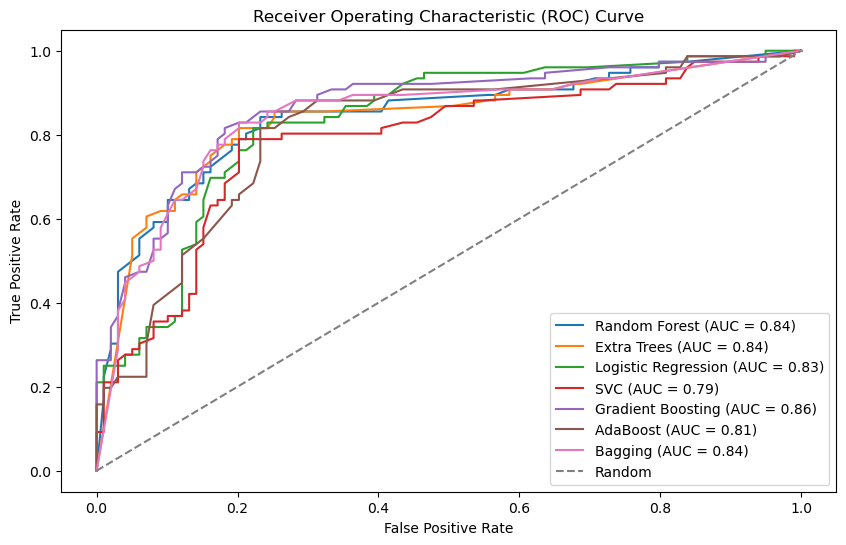

Random Forest: ROC AUC = 0.84
Extra Trees: ROC AUC = 0.84
Logistic Regression: ROC AUC = 0.83
SVC: ROC AUC = 0.79
Gradient Boosting: ROC AUC = 0.86
AdaBoost: ROC AUC = 0.81
Bagging: ROC AUC = 0.84


In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC(probability=True)),  
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier())
]


roc_auc_scores = {}


plt.figure(figsize=(10, 6))
for classifiername, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred_probability = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    roc_auc_scores[classifiername] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{classifiername} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


for name, roc_auc in roc_auc_scores.items():
    print(f'{name}: ROC AUC = {roc_auc:.2f}')

Now let's save the selected model

In [87]:
import joblib
joblib.dump(Selected_model,"Titanic_Data_Analysis.pkl")

['Titanic_Data_Analysis.pkl']

Let's check the predictions of our selected model applied on our original dataset

In [88]:
model = joblib.load("Titanic_Data_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0.])

Now let's compare the predicted values and the original values.

In [89]:
finaldata = np.array(y_test)
titanicsurvivor = pd.DataFrame()
titanicsurvivor["ourprediction"] = prediction
titanicsurvivor["originalvalues"] = finaldata
titanicsurvivor

ourprediction  originalvalues
0              0.0             0.0
1              1.0             1.0
2              1.0             1.0
3              0.0             0.0
4              0.0             1.0
..             ...             ...
170            0.0             0.0
171            1.0             1.0
172            1.0             1.0
173            0.0             1.0
174            0.0             0.0

[175 rows x 2 columns]

End of Project